---
**Importing Libraries:**
* To get started we will use Python for data pre-processing .
* Import python libraries as necessary to get started for data load and later import other libraries as needed
---

In [1]:
#Import all necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


---
# Dataset Load
---

**Dataset:**

* **train_data.csv** - training data with multiple statement dates per customer_ID
* **train_labels.csv** - target label for each customer_ID


---

---
Considering large number of rows around 5.5 million in **train_data.csv** dataset, using nrows option to load first 200000 rows from dataset file for Model building.

---

Load train_data.csv dataset file using nrows=200000

In [2]:
# Loading dataset train_data.csv
df = pd.read_csv('../input/amex-default-prediction/train_data.csv', nrows=200000)

In [3]:
# get shape of dataframe
print('Shape of dataset is:', df.shape)

Shape of dataset is: (200000, 190)


In [4]:
# print summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 289.9+ MB


**Observations:**

* There are total 190 variables in train_data.csv dataset
    * There are 185 variables(Columns) as dtype float64, 1 variable(Column) as dtype int64 and 4 variables(Columns) as dtype object

---
Need to load **train_labels.csv** for customer_ID with target label as 1 for Default and 0 for Not Default

---

In [5]:
# Loading dataset train_labels.csv
df_label = pd.read_csv('../input/amex-default-prediction/train_labels.csv')

In [6]:
# get shape of dataframe
print('Shape of dataset is:', df_label.shape)

Shape of dataset is: (458913, 2)


In [7]:
# print summary of dataframe
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458913 entries, 0 to 458912
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_ID  458913 non-null  object
 1   target       458913 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


**Observations:**

* There are total 458,913 entries for target label with customer_ID
* There is variable (column) customer_ID which has dtype as object and variable (column) target which has dtype as int64

---
Need to merge train_labels dataset with train_data dataset for target label.

---

In [8]:
# Merge of train_df_sample and train_label_df dataframe using key as customer_ID
df = pd.merge(df, df_label, how="inner", on=["customer_ID"])

In [9]:
# print summary of merged dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Columns: 191 entries, customer_ID to target
dtypes: float64(185), int64(2), object(4)
memory usage: 293.0+ MB


In [10]:
#display first 10 rows using head
df.head(10)

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   
5  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-08-04  0.945964   
6  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-09-18  0.940705   
7  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-10-08  0.914767   
8  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-11-20  0.950845   
9  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-12-04  0.868580   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  ...  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709  ...   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714  ...   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423  ...   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531  ...   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312  ...   
5  0.001746  0.007863  1.005006  0.004220  0.110946  0.009857  0.009866  ...   
6  0.002183  0.018859  1.008024  0.004509  0.103329  0.006603  0.000783  ...   
7  0.003029  0.014324  1.000242  0.000263  0.108115  0.009527  0.007836  ...   
8  0.009896  0.016888  1.003995  0.001789  0.102792  0.002519  0.009817  ...   
9  0.001082  0.001930  1.007504  0.001772  0.100470  0.004626  0.006073  ...   

   D_137  D_138     D_139     D_140     D_141  D_142     D_143     D_144  \
0    NaN    NaN  0.002427  0.003706  0.003818    NaN  0.000569  0.000610   
1    NaN    NaN  0.003954  0.003167  0.005032    NaN  0.009576  0.005492   
2    NaN    NaN  0.003269  0.007329  0.000427    NaN  0.003429  0.006986   
3    NaN    NaN  0.006117  0.004516  0.003200    NaN  0.008419  0.006527   
4    NaN    NaN  0.003671  0.004946  0.008889    NaN  0.001670  0.008126   
5    NaN    NaN  0.001924  0.008598  0.004529    NaN  0.000674  0.002223   
6    NaN    NaN  0.001336  0.004361  0.009387    NaN  0.007727  0.007661   
7    NaN    NaN  0.002397  0.008452  0.005553    NaN  0.001831  0.009616   
8    NaN    NaN  0.009742  0.003968  0.007945    NaN  0.008722  0.004369   
9    NaN    NaN  0.003611  0.009607  0.007266    NaN  0.008763  0.004753   

      D_145  target  
0  0.002674       0  
1  0.009217       0  
2  0.002603       0  
3  0.009600       0  
4  0.009827       0  
5  0.002884       0  
6  0.002225       0  
7  0.007385       0  
8  0.000995       0  
9  0.009068       0  

[10 rows x 191 columns]

In [11]:
#check if any duplicate row
df.loc[df.duplicated()]

Empty DataFrame
Columns: [customer_ID, S_2, P_2, D_39, B_1, B_2, R_1, S_3, D_41, B_3, D_42, D_43, D_44, B_4, D_45, B_5, R_2, D_46, D_47, D_48, D_49, B_6, B_7, B_8, D_50, D_51, B_9, R_3, D_52, P_3, B_10, D_53, S_5, B_11, S_6, D_54, R_4, S_7, B_12, S_8, D_55, D_56, B_13, R_5, D_58, S_9, B_14, D_59, D_60, D_61, B_15, S_11, D_62, D_63, D_64, D_65, B_16, B_17, B_18, B_19, D_66, B_20, D_68, S_12, R_6, S_13, B_21, D_69, B_22, D_70, D_71, D_72, S_15, B_23, D_73, P_4, D_74, D_75, D_76, B_24, R_7, D_77, B_25, B_26, D_78, D_79, R_8, R_9, S_16, D_80, R_10, R_11, B_27, D_81, D_82, S_17, R_12, B_28, R_13, D_83, ...]
Index: []

[0 rows x 191 columns]

In [12]:
df.duplicated().sum()

0

There is no duplicate observation in train data we selected.

In [13]:
# Check for missing value
df.isna().sum()

customer_ID         0
S_2                 0
P_2              1542
D_39                0
B_1                 0
                ...  
D_142          165644
D_143            3503
D_144            1433
D_145            3503
target              0
Length: 191, dtype: int64

In [14]:
null=round((df.isna().sum()/df.shape[0]*100),2).sort_values(ascending=False).astype(str)+('%')
null=null.to_frame().rename(columns={0:'Missing %'})
null.head(30)

Missing %
D_87     99.94%
D_88     99.87%
D_108    99.47%
D_111    99.38%
D_110    99.38%
B_39     99.34%
D_73      98.9%
B_42     98.72%
D_138    96.41%
D_137    96.41%
D_134    96.41%
D_135    96.41%
D_136    96.41%
R_9      94.05%
B_29     93.07%
D_106    89.85%
D_132    89.82%
D_49     89.77%
R_26     88.99%
D_66     88.91%
D_76     88.83%
D_42      85.4%
D_142    82.82%
D_53      73.7%
D_82     73.34%
D_50     56.77%
B_17     56.23%
D_105    54.53%
D_56     54.44%
S_9       53.3%

30 features have more than 50 % of missing values

---
# Data Preprocessing

---

---
**Handle Variable with Missing Value**

---

---
Drop Variables with Missing Value (>=50%) in train dataset

---

In [15]:
#drop variables with missing values >=50% in the train dataframe
i=0
for col in df.columns:
    if (df[col].isnull().sum()/len(df[col])*100) >=50:
        print("Dropping column", col)
        df.drop(labels=col,axis=1,inplace=True)
        i=i+1
        
print("Total number of columns dropped in train dataframe", i)

Dropping column D_42
Dropping column D_49
Dropping column D_50
Dropping column D_53
Dropping column D_56
Dropping column S_9
Dropping column B_17
Dropping column D_66
Dropping column D_73
Dropping column D_76
Dropping column R_9
Dropping column D_82
Dropping column B_29
Dropping column D_87
Dropping column D_88
Dropping column D_105
Dropping column D_106
Dropping column R_26
Dropping column D_108
Dropping column D_110
Dropping column D_111
Dropping column B_39
Dropping column B_42
Dropping column D_132
Dropping column D_134
Dropping column D_135
Dropping column D_136
Dropping column D_137
Dropping column D_138
Dropping column D_142
Total number of columns dropped in train dataframe 30


In [16]:
df.shape

(200000, 161)

In [17]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [18]:
df.isna().sum()

customer_ID        0
S_2                0
P_2             1542
D_39               0
B_1                0
B_2               72
R_1                0
S_3            37665
D_41              72
B_3               72
D_43           60058
D_44            9929
B_4                0
D_45              72
B_5                0
R_2                0
D_46           43895
D_47               0
D_48           26011
B_6                7
B_7                0
B_8              848
D_51               0
B_9                0
R_3                0
D_52            1009
P_3            10887
B_10               0
S_5                0
B_11               0
S_6                0
D_54              72
R_4                0
S_7            37665
B_12               0
S_8                0
D_55            6524
B_13            1784
R_5                0
D_58               0
B_14               0
D_59            3767
D_60               0
D_61           21443
B_15             206
S_11               0
D_62           27433
D_63         

In [19]:
df.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  D_43  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709   NaN   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714   NaN   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423   NaN   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531   NaN   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312   NaN   

       D_44       B_4      D_45       B_5       R_2      D_46      D_47  \
0  0.000630  0.080986  0.708906  0.170600  0.006204  0.358587  0.525351   
1  0.002526  0.069419  0.712795  0.113239  0.006206  0.353630  0.521311   
2  0.007605  0.068839  0.720884  0.060492  0.003259  0.334650  0.524568   
3  0.006406  0.055630  0.723997  0.166782  0.009918  0.323271  0.530929   
4  0.007731  0.038862  0.720619  0.143630  0.006667  0.231009  0.529305   

       D_48       B_6       B_7       B_8      D_51       B_9       R_3  \
0  0.255736  0.063902  0.059416  0.006466  1.335856  0.008207  0.001423   
1  0.223329  0.065261  0.057744  0.001614  1.339794  0.008373  0.001984   
2  0.189424  0.066982  0.056647  0.005126  1.337179  0.009355  0.007426   
3  0.135586  0.083720  0.049253  0.001418  1.339909  0.006782  0.003515   
4       NaN  0.075900  0.048918  0.001199  1.341735  0.000519  0.001362   

       D_52       P_3      B_10       S_5      B_11       S_6      D_54  \
0  0.207334  0.736463  0.096219  0.023381  0.002768  0.008322  1.001519   
1  0.202778  0.720886  0.099804  0.030599  0.002749  0.002482  1.009033   
2  0.206629  0.738044  0.134073  0.048367  0.010077  0.000530  1.009184   
3  0.208214  0.741813  0.134437  0.030063  0.009667  0.000783  1.007456   
4  0.205468  0.691986  0.121518  0.054221  0.009484  0.006698  1.003738   

        R_4       S_7      B_12       S_8      D_55      B_13       R_5  \
0  0.008298  0.161345  0.148266  0.922998  0.354596  0.118075  0.001882   
1  0.005136  0.140951  0.143530  0.919414  0.326757  0.118737  0.001610   
2  0.006961  0.112229  0.137014  1.001977  0.304124  0.114534  0.006328   
3  0.008706  0.102838  0.129017  0.704016  0.275055  0.120740  0.004980   
4  0.003846  0.094311  0.129539  0.917133  0.231110  0.095178  0.001653   

       D_58      B_14      D_59      D_60      D_61      B_15      S_11  \
0  0.158612  0.018385  0.063646  0.199617  0.308233  0.016361  0.401619   
1  0.148459  0.013035  0.065501  0.151387  0.265026  0.017688  0.406326   
2  0.139504  0.056653  0.070607  0.305883  0.212165  0.063955  0.406768   
3  0.138100  0.012498  0.065926  0.273553  0.204300  0.022732  0.405175   
4  0.126443  0.027897  0.063697  0.233103  0.175655  0.031171  0.487460   

       D_62 D_63 D_64      D_65      B_16      B_18      B_19      B_20  D_68  \
0  0.091071   CR    O  0.007126  0.007665  0.652984  0.008520  0.004730   6.0   
1  0.086805   CR    O  0.002413  0.007148  0.647093  0.002238  0.003879   6.0   
2  0.094001   CR    O  0.001878  0.003636  0.645819  0.000408  0.004578   6.0   
3  0.094854   CR    O  0.005899  0.005896  0.654358  0.005897  0.005207   6.0   
4  0.093915   CR    O  0.009479  0.001714  0.650112  0.007773  0.005851   6.0   

       S_12       R_6      S_13      B_21      D_69      B_22      D_70  \
0  0.272008  0.008363  0.515222  0.002644  0.009013  0.004808  0.008342   
1  0.188970  0.004030  0.509048  0.004193  0.007842  0.001283  0.006524   
2  0.495308  0.006838  0.679257  0.001337  0.006025  0.009393  0.002615   
3  0.508670  0.008183  0.515282  0.008716  

Missing value treatment

In [20]:
#mode imputation on categorical columns
for col in list(df.select_dtypes(['category','object']).columns):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [21]:
 df[col].dtypes

dtype('O')

In [22]:
for col in list(df.select_dtypes(['category']).columns):
    df[col] = df[col].astype('Int64')

In [23]:
for col in list(df.select_dtypes(['float64','int32','int64']).columns):

    df[col].fillna(np.mean(~df[col].isnull()), inplace=True)
    #df[col] = df[col].astype(np.float64)

In [24]:
 df[col].dtypes

dtype('int64')

In [25]:
df.reset_index(inplace=True, drop=True)

In [26]:
df.isna().sum()

customer_ID    0
S_2            0
P_2            0
D_39           0
B_1            0
B_2            0
R_1            0
S_3            0
D_41           0
B_3            0
D_43           0
D_44           0
B_4            0
D_45           0
B_5            0
R_2            0
D_46           0
D_47           0
D_48           0
B_6            0
B_7            0
B_8            0
D_51           0
B_9            0
R_3            0
D_52           0
P_3            0
B_10           0
S_5            0
B_11           0
S_6            0
D_54           0
R_4            0
S_7            0
B_12           0
S_8            0
D_55           0
B_13           0
R_5            0
D_58           0
B_14           0
D_59           0
D_60           0
D_61           0
B_15           0
S_11           0
D_62           0
D_63           0
D_64           0
D_65           0
B_16           0
B_18           0
B_19           0
B_20           0
D_68           0
S_12           0
R_6            0
S_13           0
B_21          

In [27]:
df.head()

customer_ID         S_2       P_2  \
0  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-03-09  0.938469   
1  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-04-07  0.936665   
2  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-05-28  0.954180   
3  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-06-13  0.960384   
4  0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...  2017-07-16  0.947248   

       D_39       B_1       B_2       R_1       S_3      D_41       B_3  \
0  0.001733  0.008724  1.006838  0.009228  0.124035  0.008771  0.004709   
1  0.005775  0.004923  1.000653  0.006151  0.126750  0.000798  0.002714   
2  0.091505  0.021655  1.009672  0.006815  0.123977  0.007598  0.009423   
3  0.002455  0.013683  1.002700  0.001373  0.117169  0.000685  0.005531   
4  0.002483  0.015193  1.000727  0.007605  0.117325  0.004653  0.009312   

      D_43      D_44       B_4      D_45       B_5       R_2      D_46  \
0  0.69971  0.000630  0.080986  0.708906  0.170600  0.006204  0.358587   
1  0.69971  0.002526  0.069419  0.712795  0.113239  0.006206  0.353630   
2  0.69971  0.007605  0.068839  0.720884  0.060492  0.003259  0.334650   
3  0.69971  0.006406  0.055630  0.723997  0.166782  0.009918  0.323271   
4  0.69971  0.007731  0.038862  0.720619  0.143630  0.006667  0.231009   

       D_47      D_48       B_6       B_7       B_8      D_51       B_9  \
0  0.525351  0.255736  0.063902  0.059416  0.006466  1.335856  0.008207   
1  0.521311  0.223329  0.065261  0.057744  0.001614  1.339794  0.008373   
2  0.524568  0.189424  0.066982  0.056647  0.005126  1.337179  0.009355   
3  0.530929  0.135586  0.083720  0.049253  0.001418  1.339909  0.006782   
4  0.529305  0.869945  0.075900  0.048918  0.001199  1.341735  0.000519   

        R_3      D_52       P_3      B_10       S_5      B_11       S_6  \
0  0.001423  0.207334  0.736463  0.096219  0.023381  0.002768  0.008322   
1  0.001984  0.202778  0.720886  0.099804  0.030599  0.002749  0.002482   
2  0.007426  0.206629  0.738044  0.134073  0.048367  0.010077  0.000530   
3  0.003515  0.208214  0.741813  0.134437  0.030063  0.009667  0.000783   
4  0.001362  0.205468  0.691986  0.121518  0.054221  0.009484  0.006698   

       D_54       R_4       S_7      B_12       S_8      D_55      B_13  \
0  1.001519  0.008298  0.161345  0.148266  0.922998  0.354596  0.118075   
1  1.009033  0.005136  0.140951  0.143530  0.919414  0.326757  0.118737   
2  1.009184  0.006961  0.112229  0.137014  1.001977  0.304124  0.114534   
3  1.007456  0.008706  0.102838  0.129017  0.704016  0.275055  0.120740   
4  1.003738  0.003846  0.094311  0.129539  0.917133  0.231110  0.095178   

        R_5      D_58      B_14      D_59      D_60      D_61      B_15  \
0  0.001882  0.158612  0.018385  0.063646  0.199617  0.308233  0.016361   
1  0.001610  0.148459  0.013035  0.065501  0.151387  0.265026  0.017688   
2  0.006328  0.139504  0.056653  0.070607  0.305883  0.212165  0.063955   
3  0.004980  0.138100  0.012498  0.065926  0.273553  0.204300  0.022732   
4  0.001653  0.126443  0.027897  0.063697  0.233103  0.175655  0.031171   

       S_11      D_62 D_63 D_64      D_65      B_16      B_18      B_19  \
0  0.401619  0.091071   CR    O  0.007126  0.007665  0.652984  0.008520   
1  0.406326  0.086805   CR    O  0.002413  0.007148  0.647093  0.002238   
2  0.406768  0.094001   CR    O  0.001878  0.003636  0.645819  0.000408   
3  0.405175  0.094854   CR    O  0.005899  0.005896  0.654358  0.005897   
4  0.487460  0.093915   CR    O  0.009479  0.001714  0.650112  0.007773   

       B_20  D_68      S_12       R_6      S_13      B_21      D_69      B_22  \
0  0.004730   6.0  0.272008  0.008363  0.515222  0.002644  0.009013  0.004808   
1  0.003879   6.0  0.188970  0.004030  0.509048  0.004193  0.007842  0.001283   
2  0.004578   6.0  0.495308  0.006838  0.679257  0.001337  0.006025  0.009393   
3  0.005207   6.0  0.508670  0.008183  0.515282  0.008716  0.005271  0.004554   
4  0.005851   6.

In [28]:
#Type conversion
df['S_2'] = pd.to_datetime(df['S_2'],format='%Y/%m/%d')

In [29]:
df.dtypes

customer_ID            object
S_2            datetime64[ns]
P_2                   float64
D_39                  float64
B_1                   float64
B_2                   float64
R_1                   float64
S_3                   float64
D_41                  float64
B_3                   float64
D_43                  float64
D_44                  float64
B_4                   float64
D_45                  float64
B_5                   float64
R_2                   float64
D_46                  float64
D_47                  float64
D_48                  float64
B_6                   float64
B_7                   float64
B_8                   float64
D_51                  float64
B_9                   float64
R_3                   float64
D_52                  float64
P_3                   float64
B_10                  float64
S_5                   float64
B_11                  float64
S_6                   float64
D_54                  float64
R_4                   float64
S_7       

Text(0.5, 1.0, 'Distribution plot for Target')

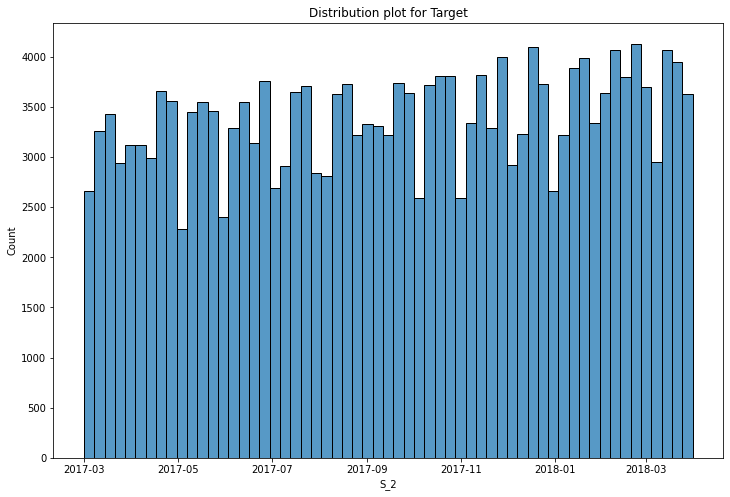

In [67]:
#Distribution of target variables
plt.figure(figsize=(12,8))
sns.histplot(df['target'],x=df['S_2'],)#,y=df['S_2'])
plt.title('Distribution plot for Target')

In [59]:
target_class = pd.DataFrame({'count': df.target.value_counts(),'percentage': df['target'].value_counts() / df.shape[0] * 100})
target_class

count  percentage
0  149321     74.6605
1   50679     25.3395

About 25% of customers in the training data have defaulted.

# Plotting Categorical features

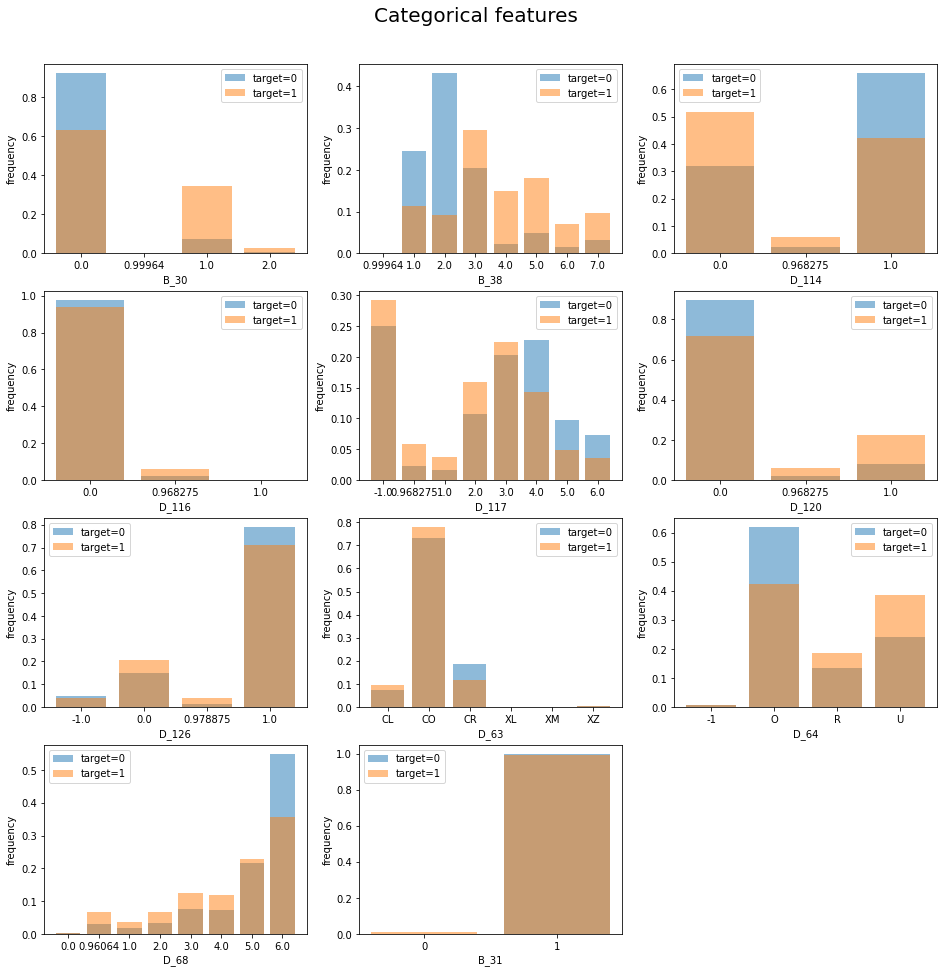

In [31]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_68','B_31']
plt.figure(figsize=(16, 16))
for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i+1)
    temp = pd.DataFrame(df[f][df.target == 0].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=0')
    temp = pd.DataFrame(df[f][df.target == 1].value_counts(dropna=False, normalize=True).sort_index().rename('count'))
    temp.index.name = 'value'
    temp.reset_index(inplace=True)
    plt.bar(temp.index, temp['count'], alpha=0.5, label='target=1')
    plt.xlabel(f)
    plt.ylabel('frequency')
    plt.legend()
    plt.xticks(temp.index, temp.value)
plt.suptitle('Categorical features', fontsize=20, y=0.93)
plt.show()
del temp

The distributions for target=0 and target=1 differ. This means that every feature gives some information about the target.

In [32]:
# Encode labels in columns 'D_63' and 'D_64'.
df['D_63']= label_encoder.fit_transform(df['D_63'])
df['D_64']= label_encoder.fit_transform(df['D_64'])  

147


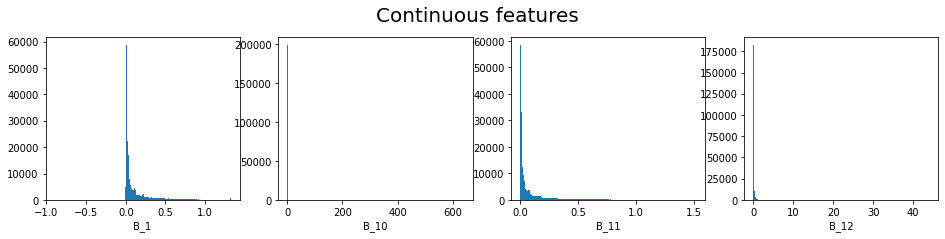

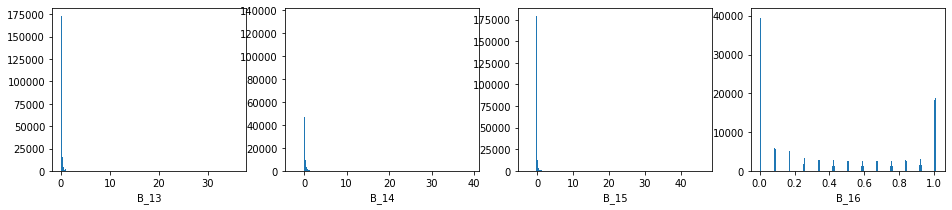

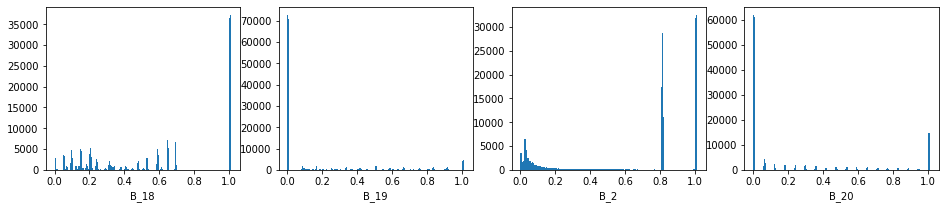

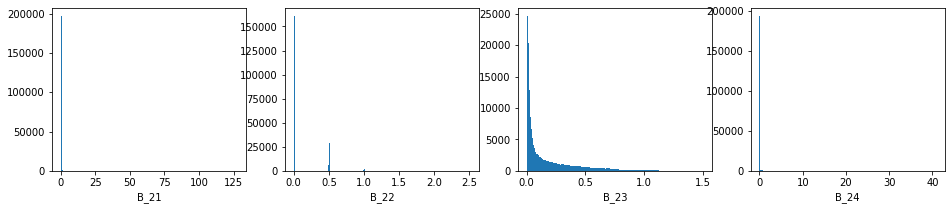

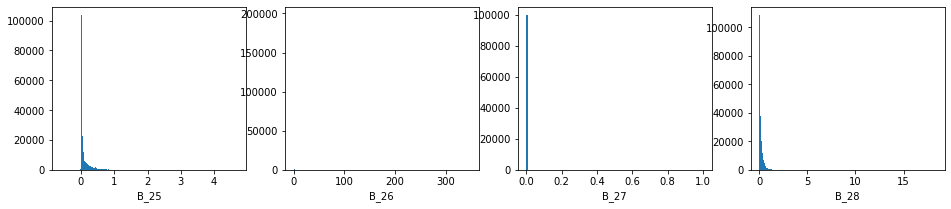

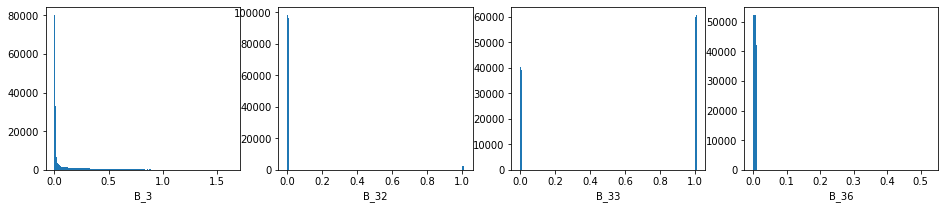

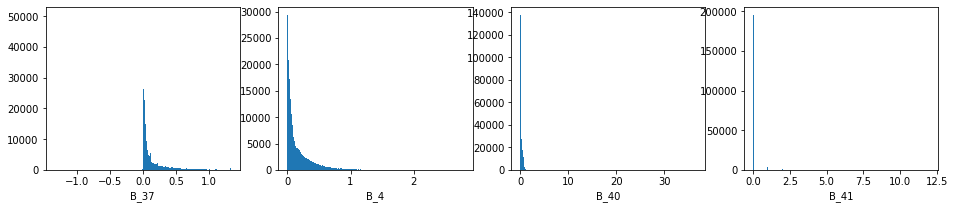

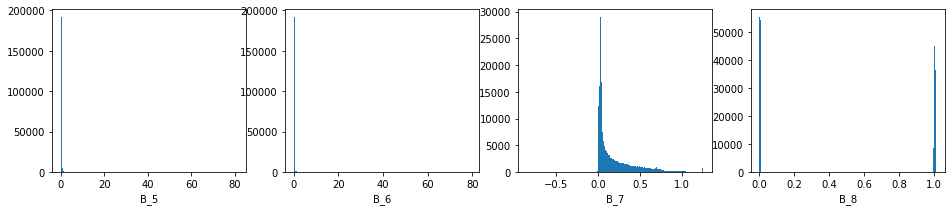

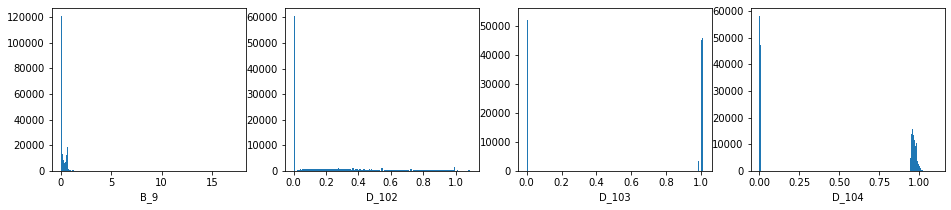

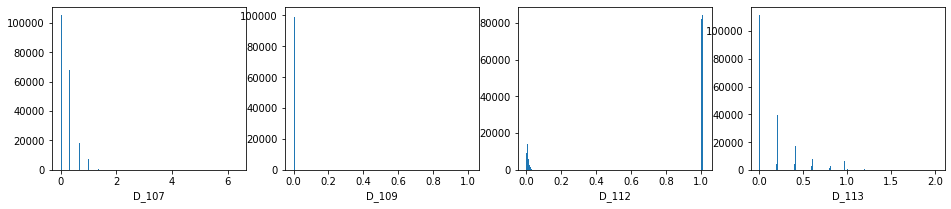

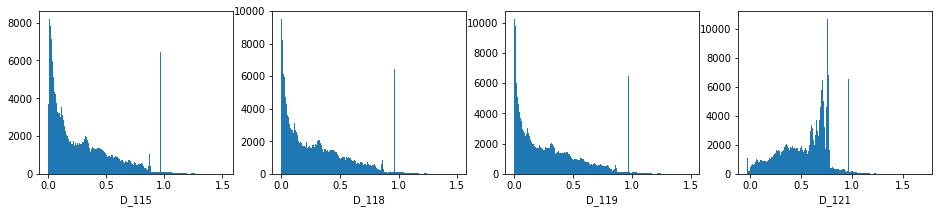

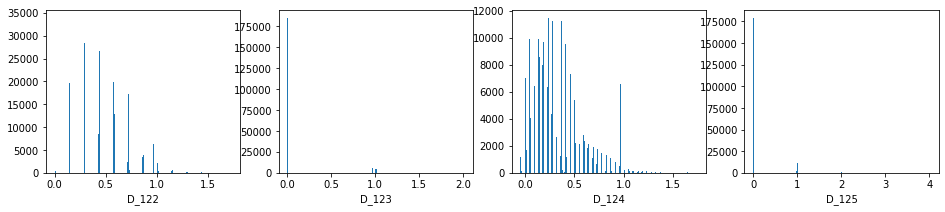

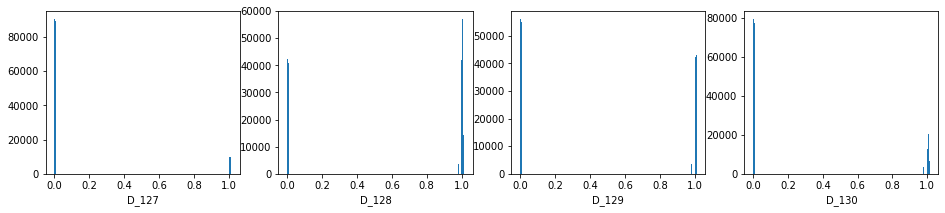

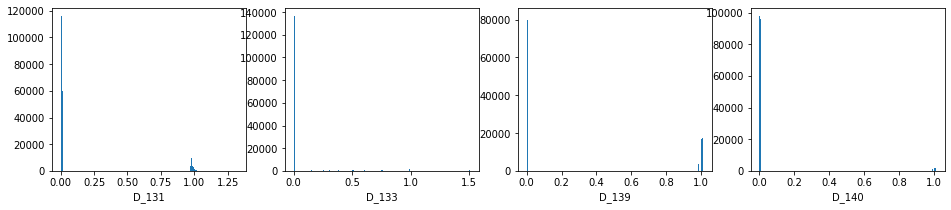

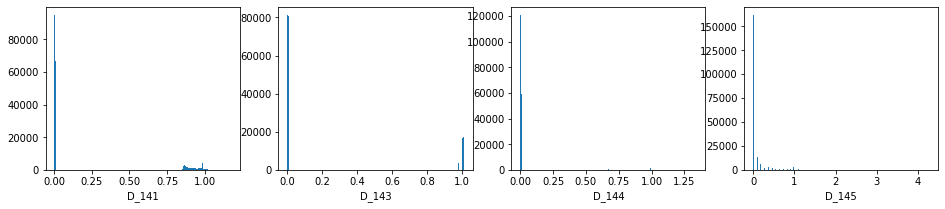

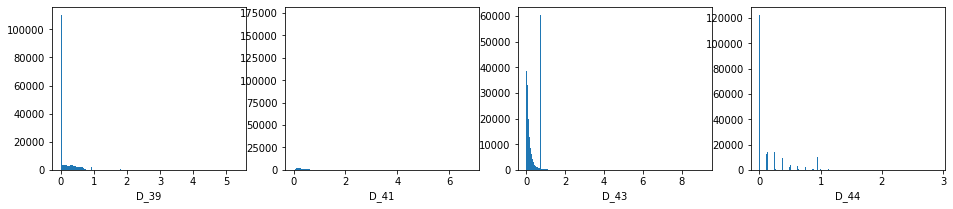

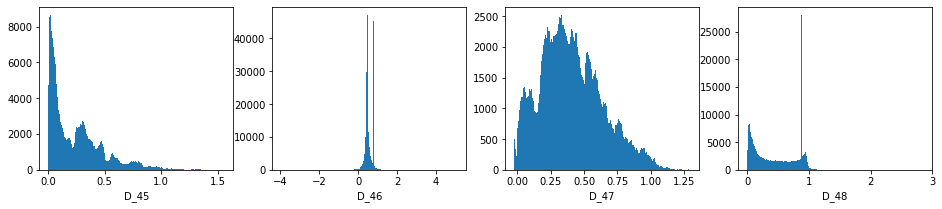

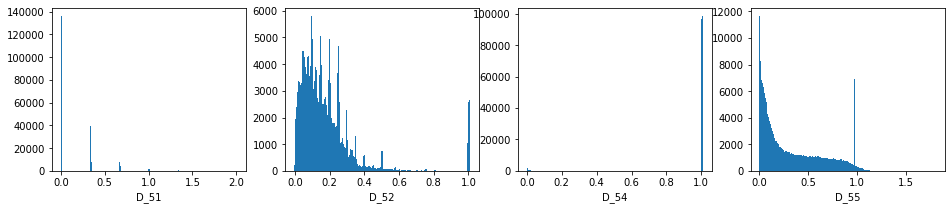

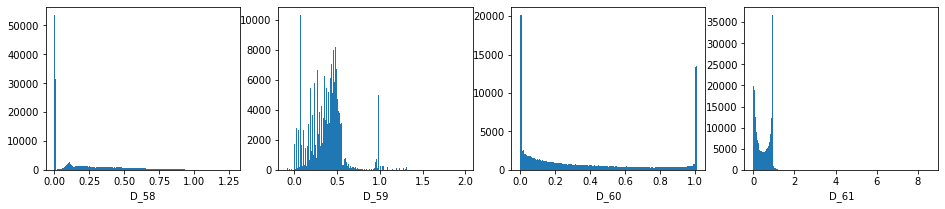

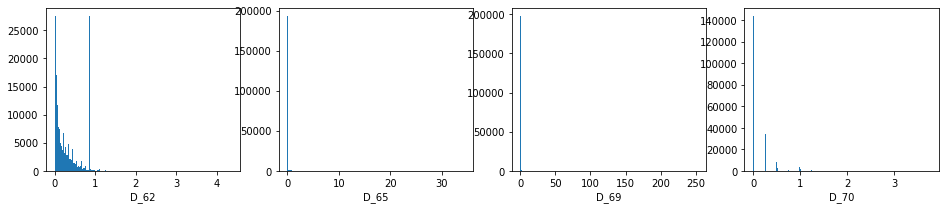

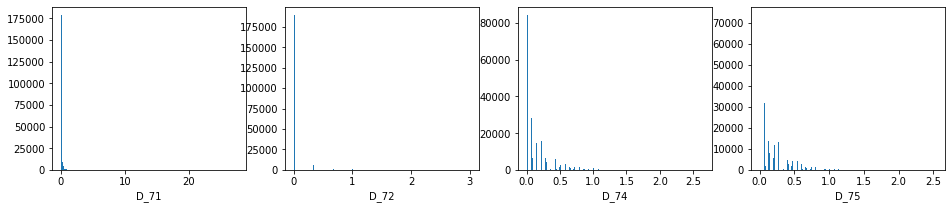

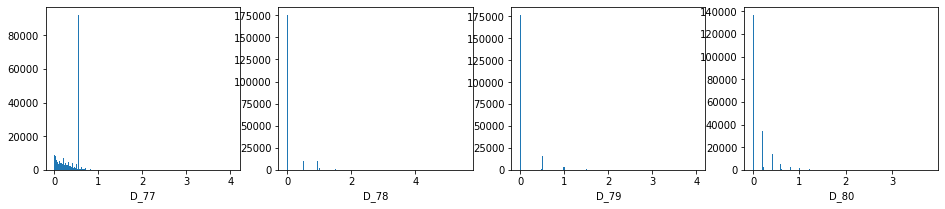

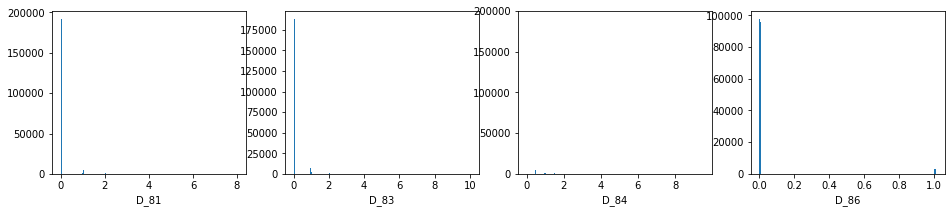

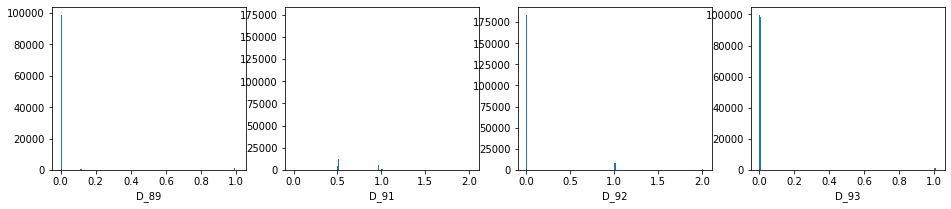

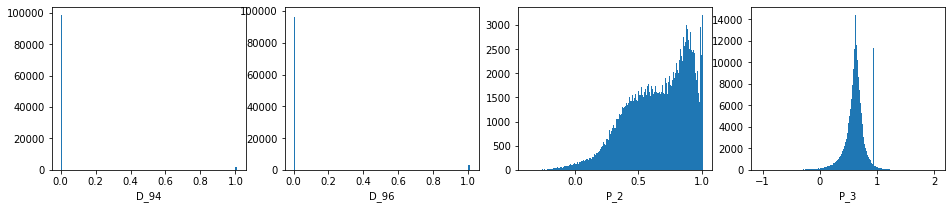

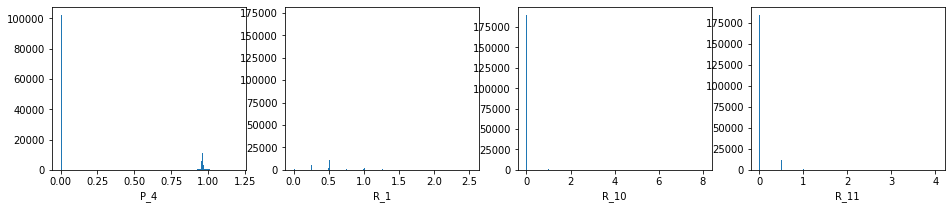

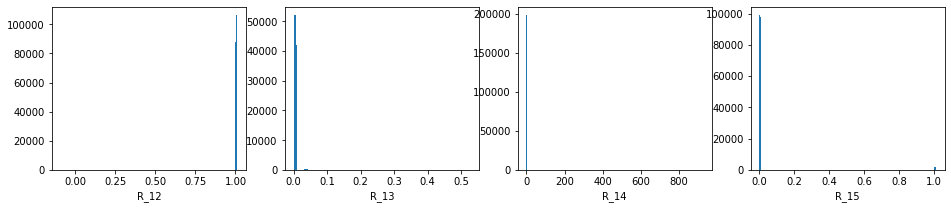

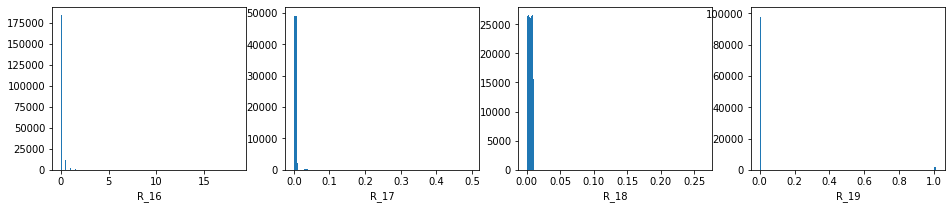

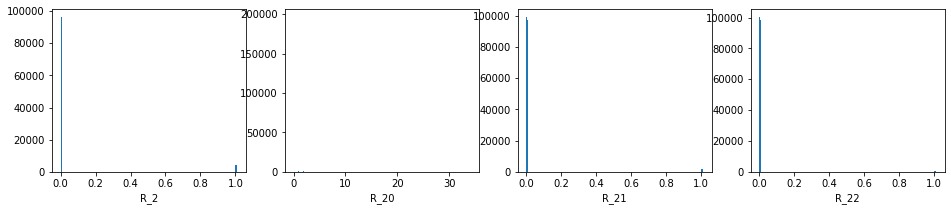

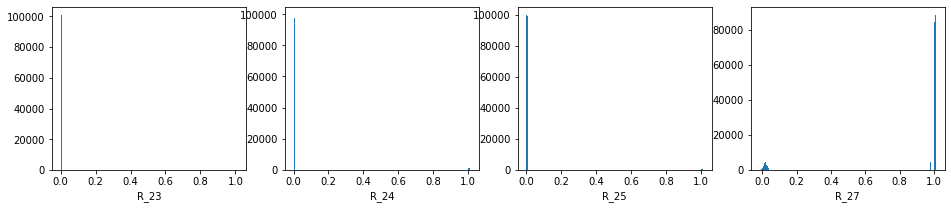

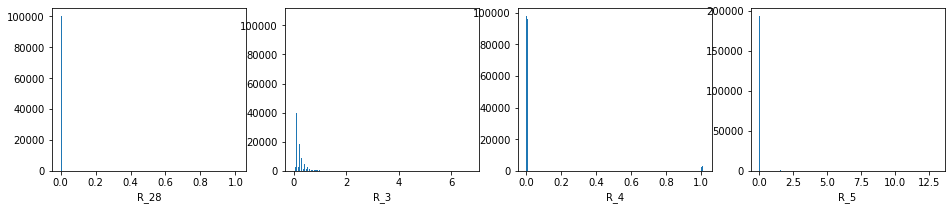

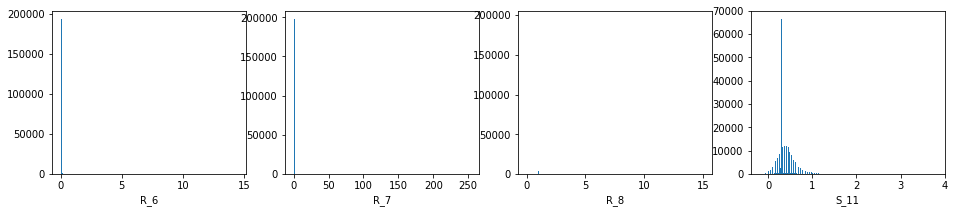

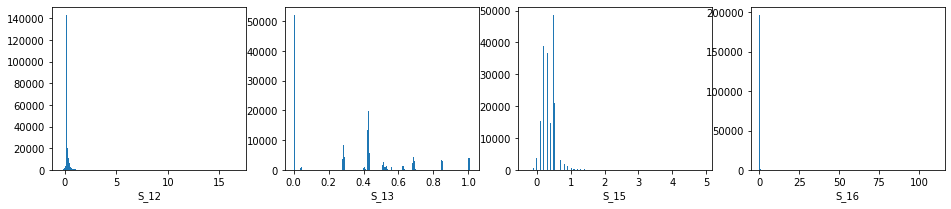

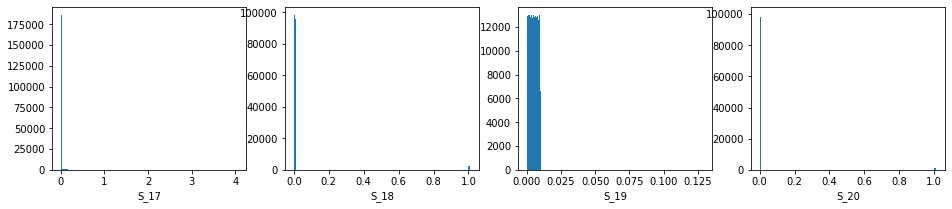

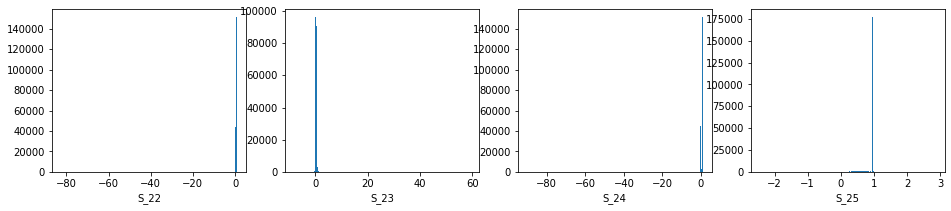

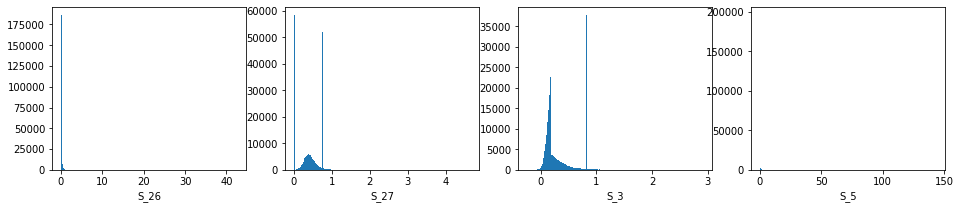

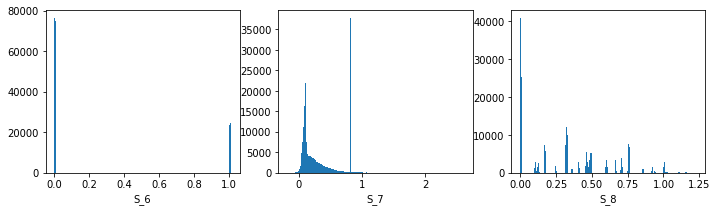

In [33]:
cont_features = sorted([f for f in df.columns if f not in cat_features + ['customer_ID', 'target', 'S_2']])
print(len(cont_features))
# print(cont_features)
ncols = 4
for i, f in enumerate(cont_features):
    if i % ncols == 0: 
        if i > 0: plt.show()
        plt.figure(figsize=(16, 3))
        if i == 0: plt.suptitle('Continuous features', fontsize=20, y=1.02)
    plt.subplot(1, ncols, i % ncols + 1)
    plt.hist(df[f], bins=200)
    plt.xlabel(f)
plt.show()

Histograms with white space at the left or right end can indicate that the data contain outliers.

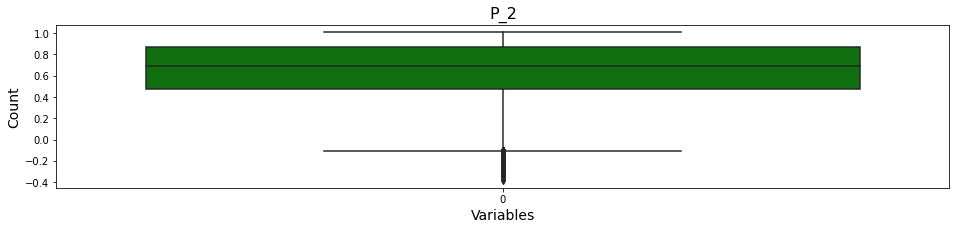

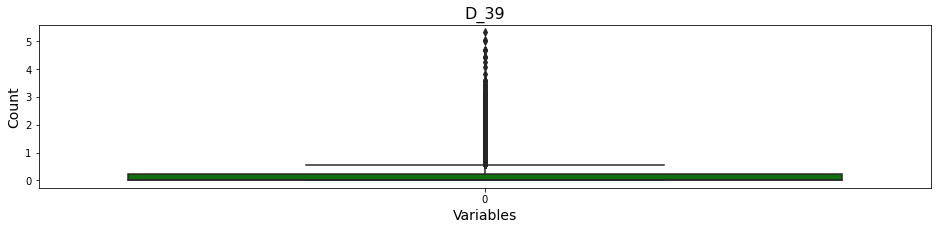

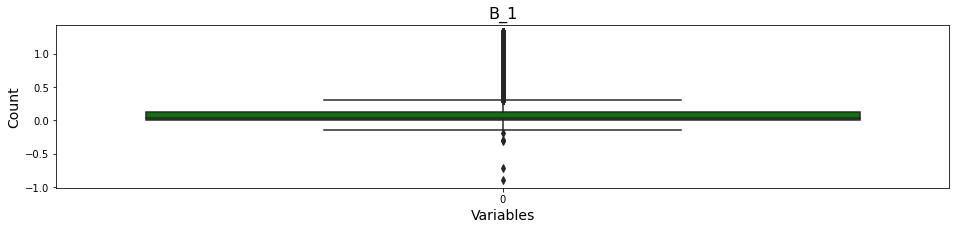

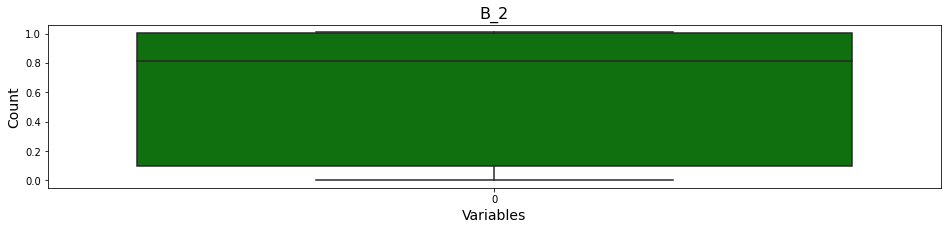

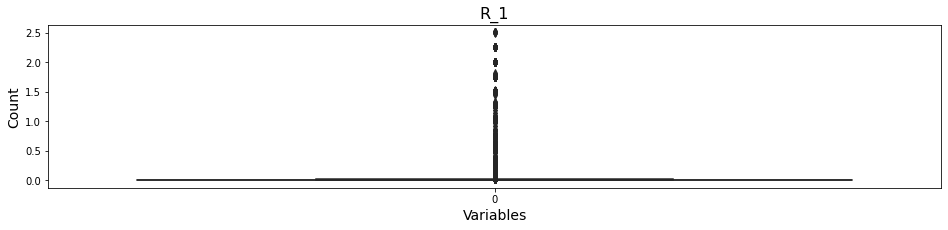

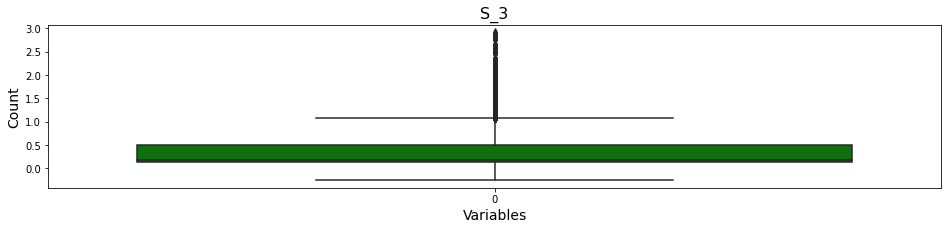

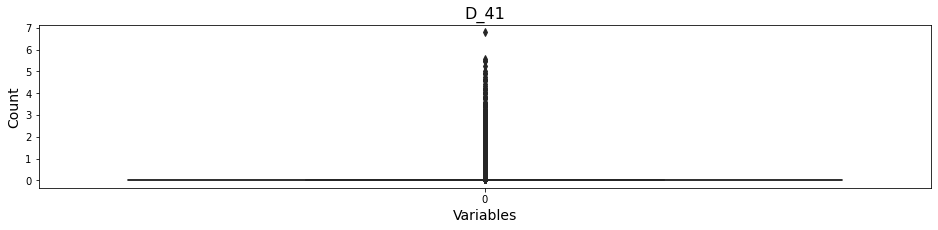

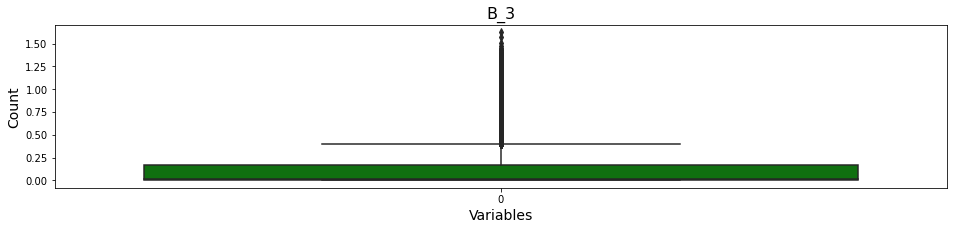

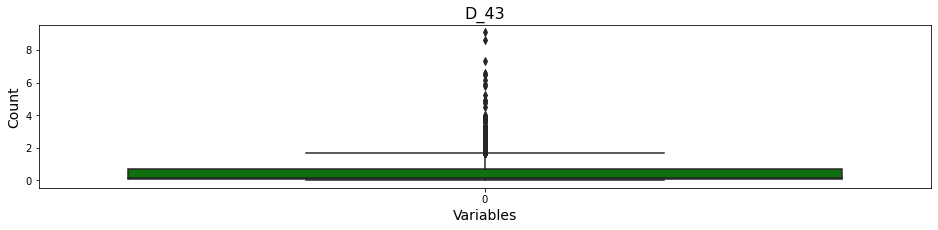

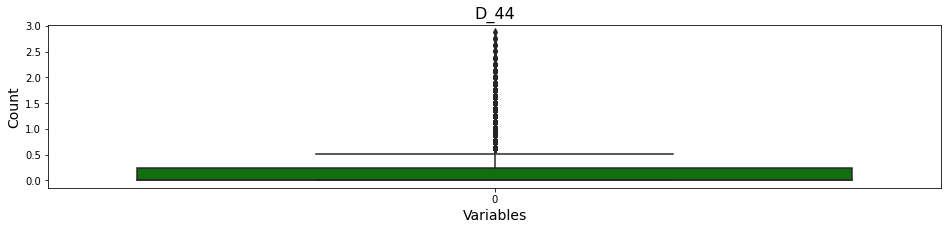

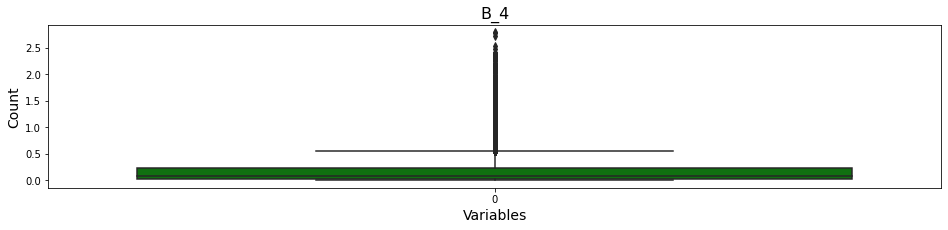

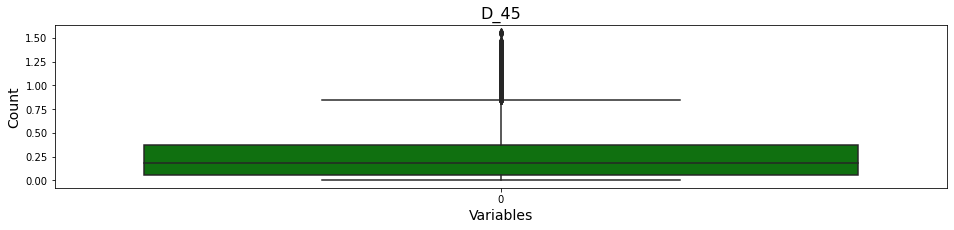

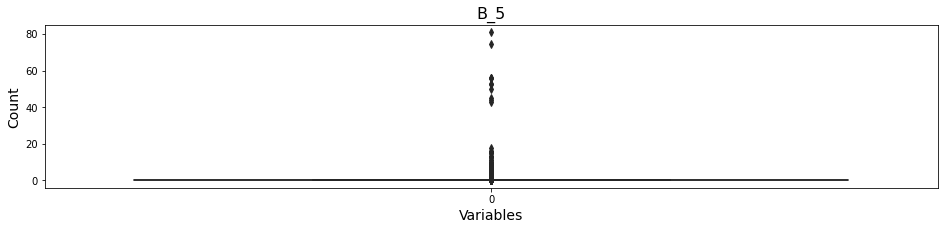

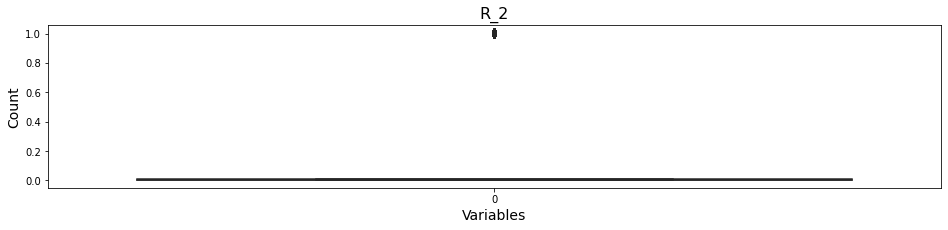

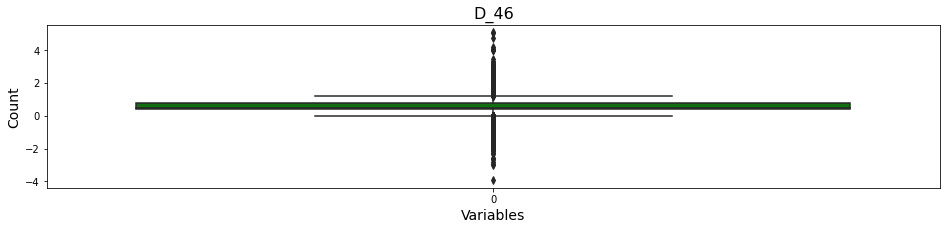

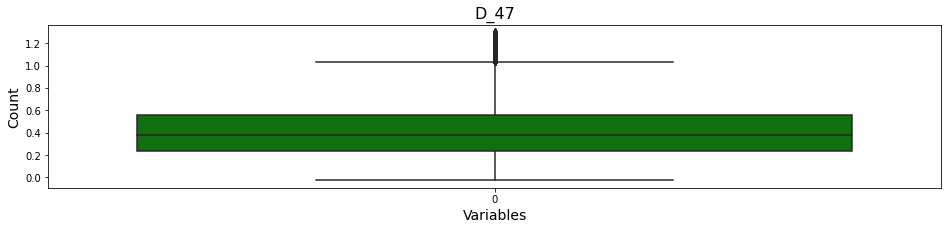

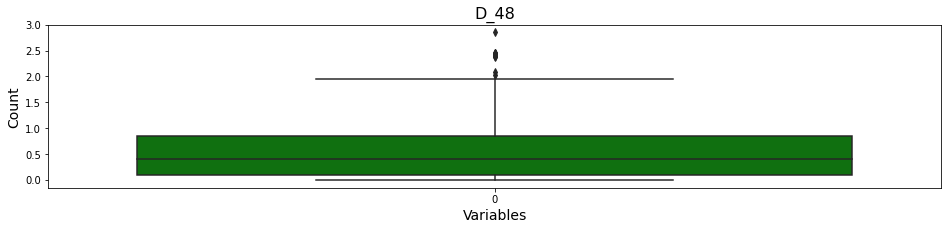

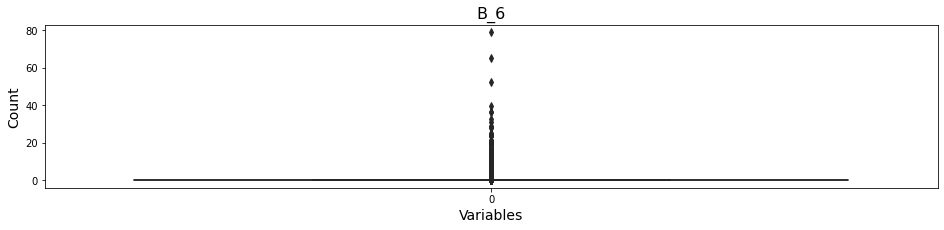

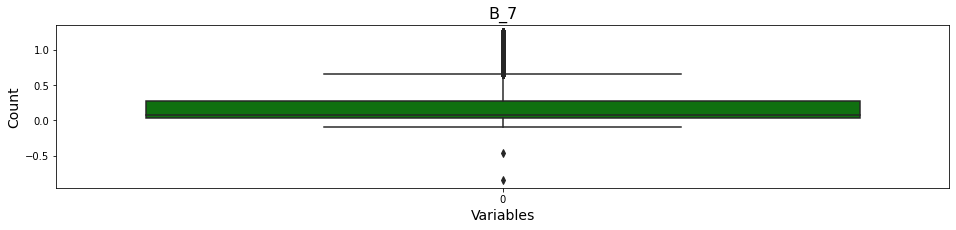

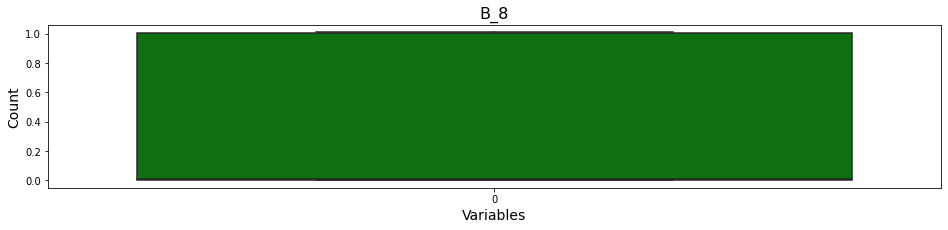

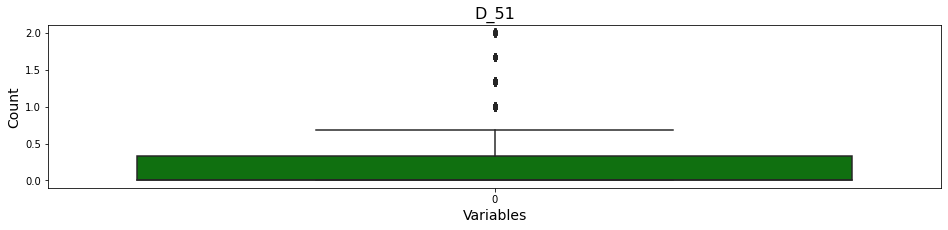

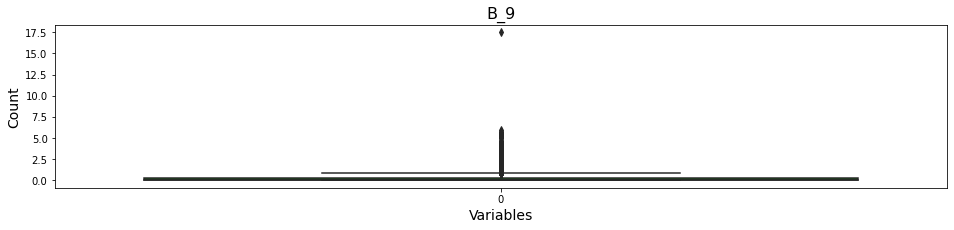

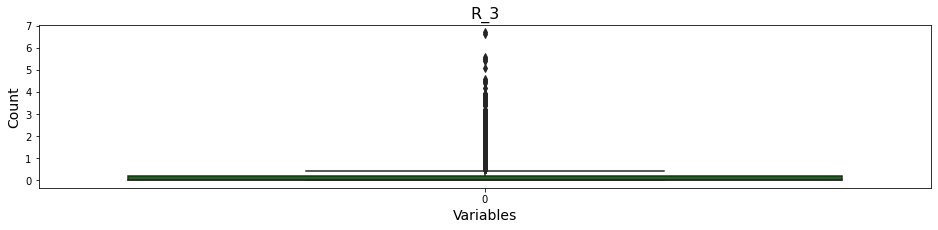

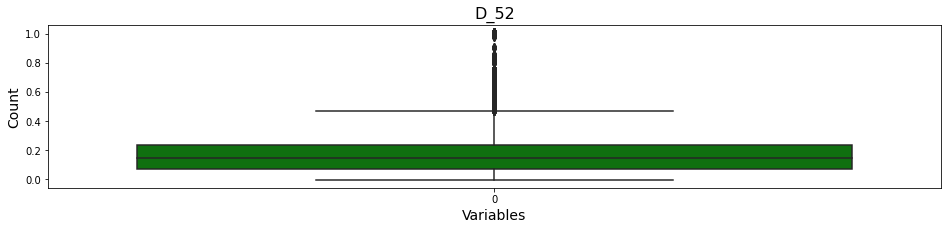

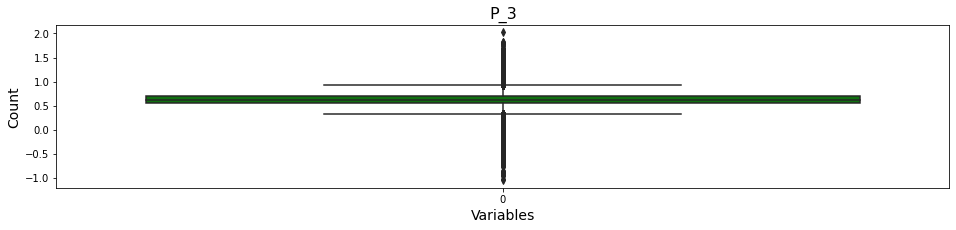

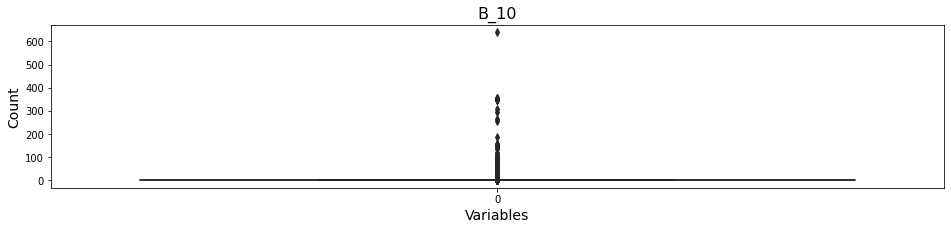

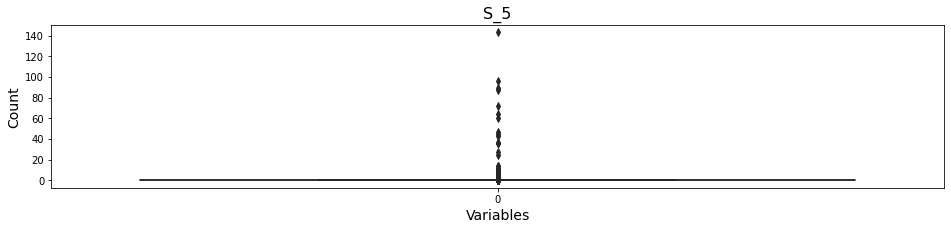

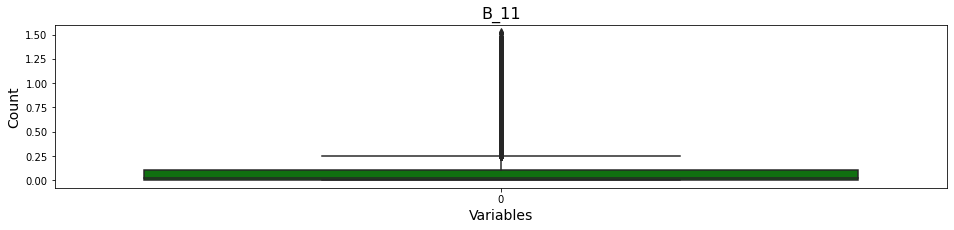

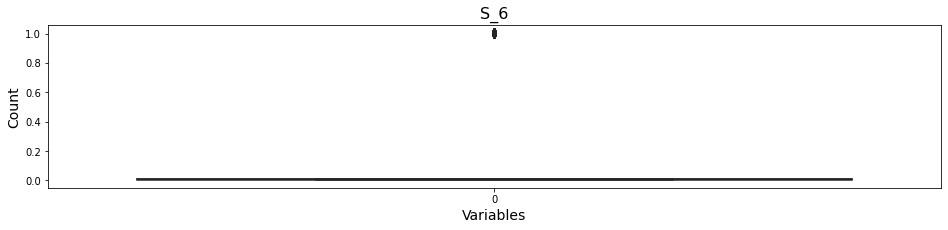

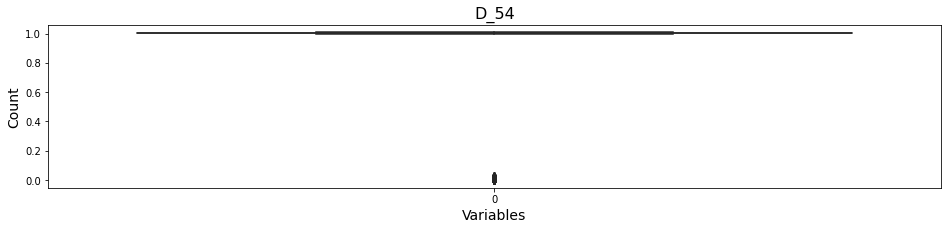

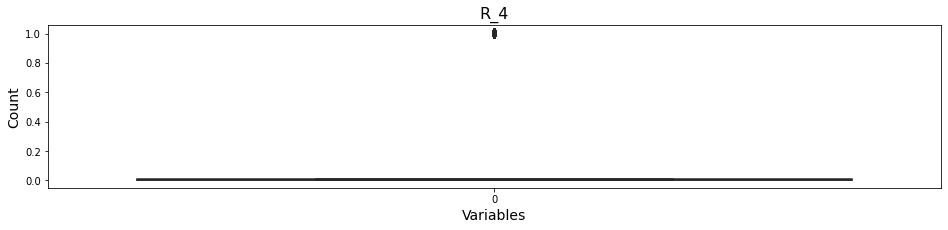

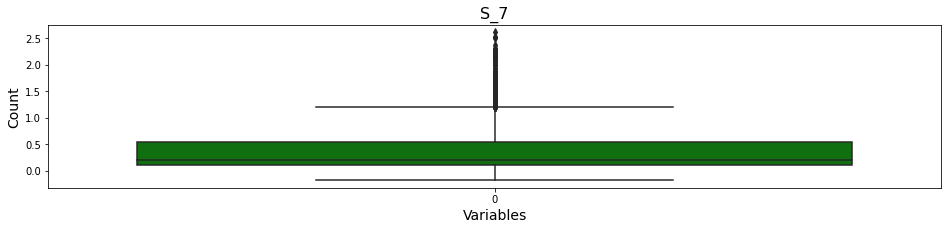

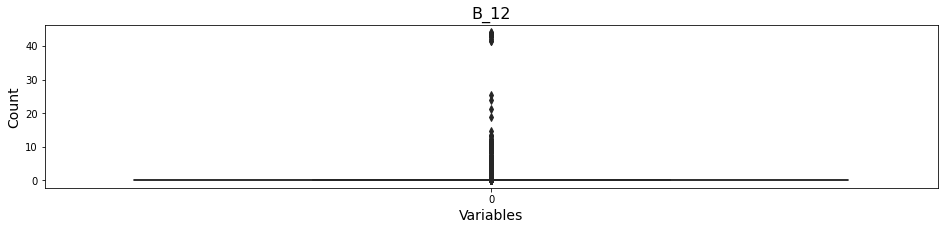

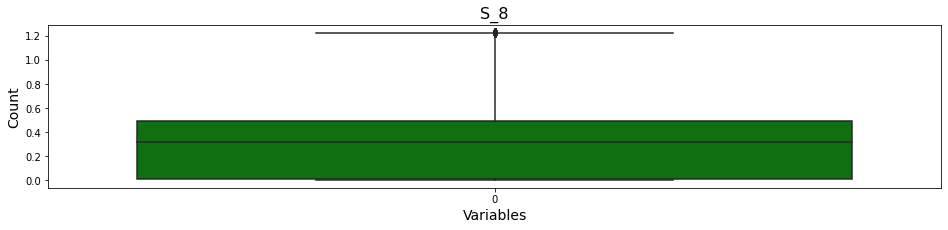

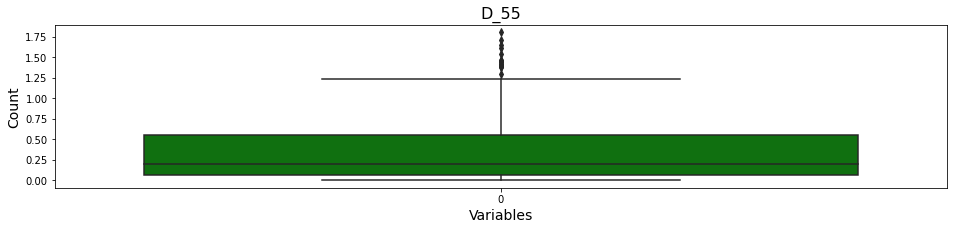

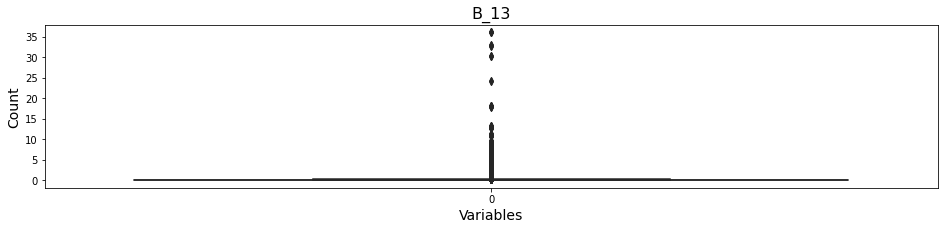

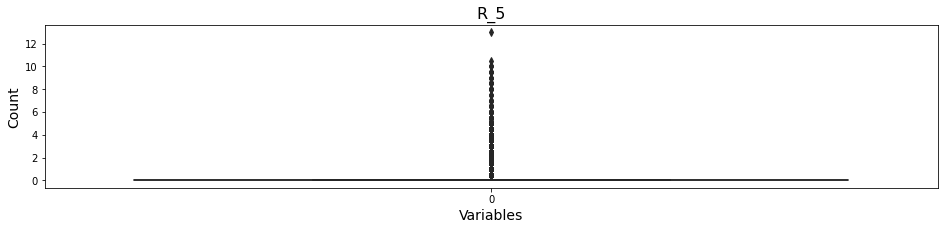

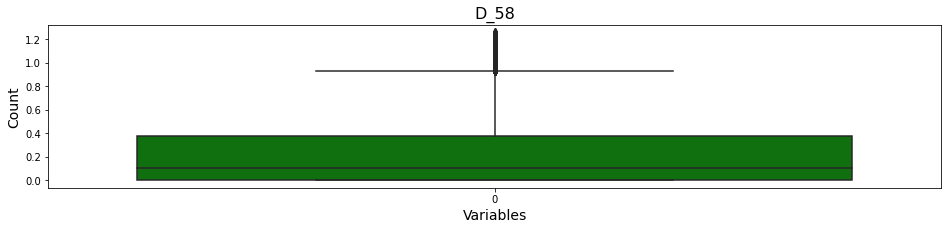

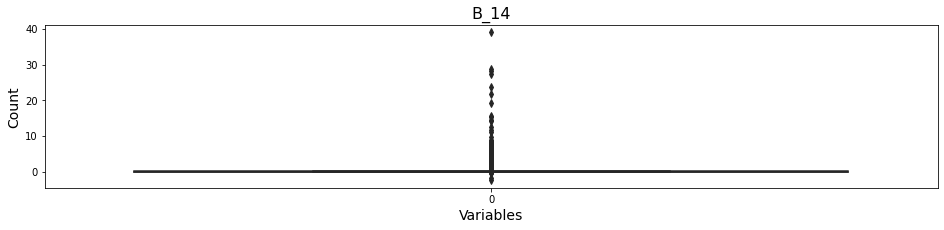

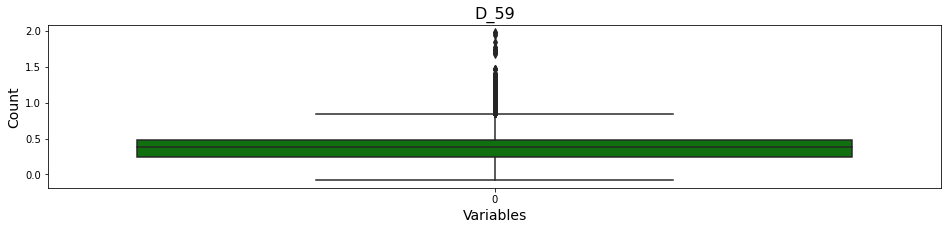

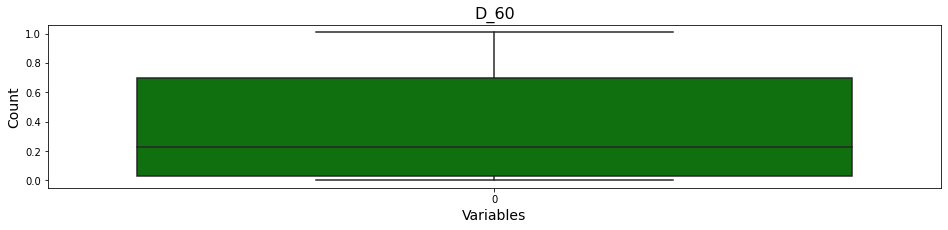

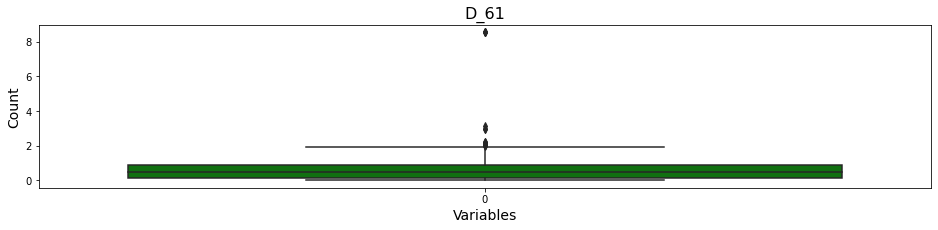

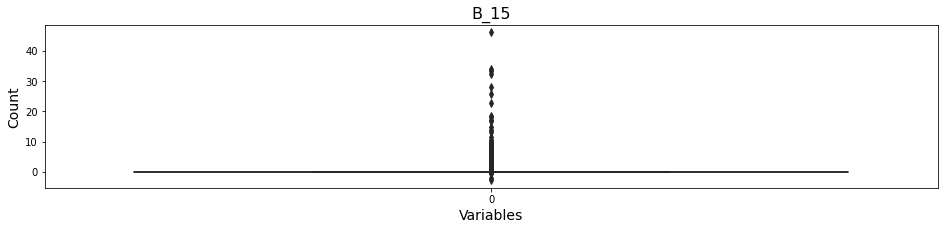

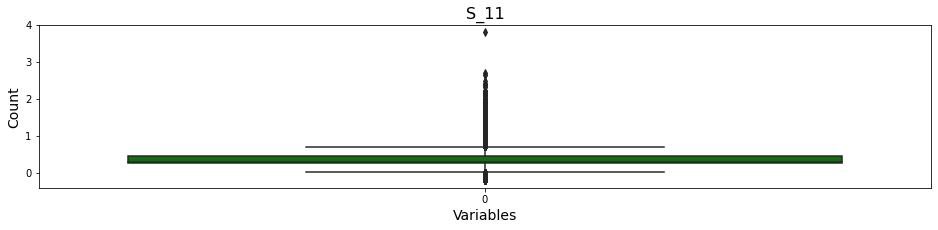

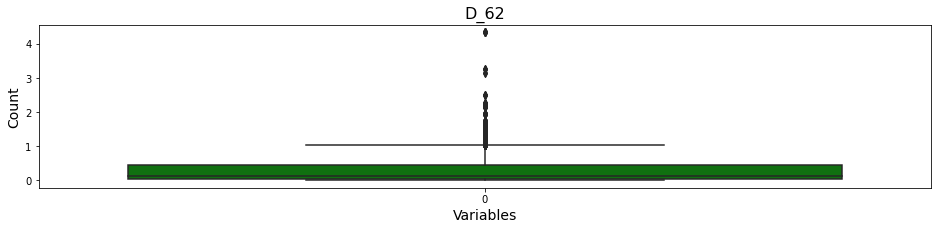

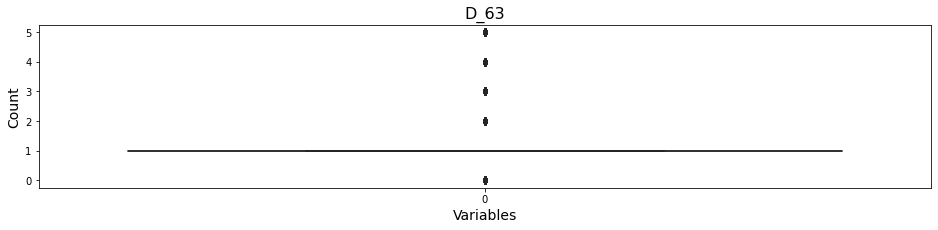

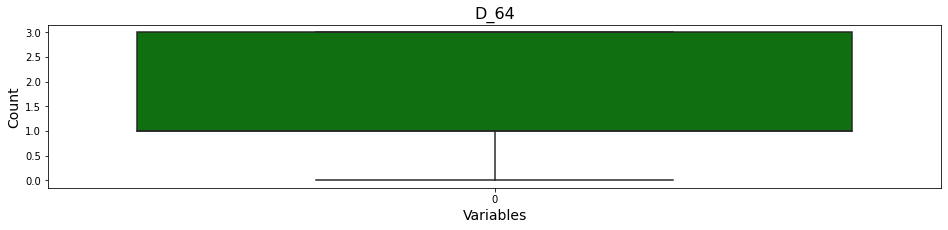

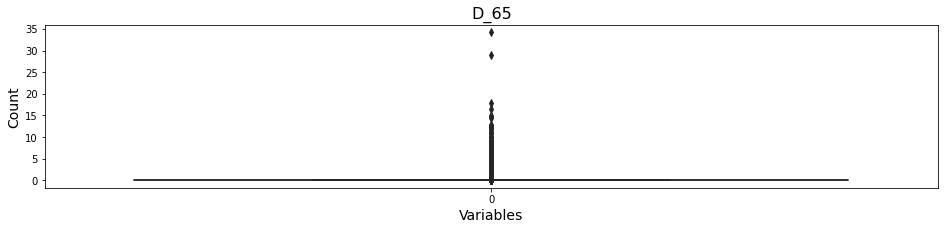

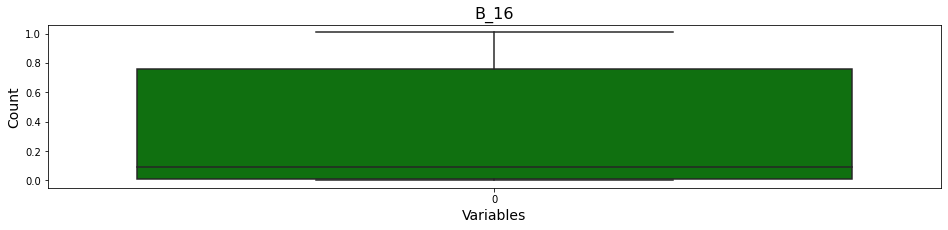

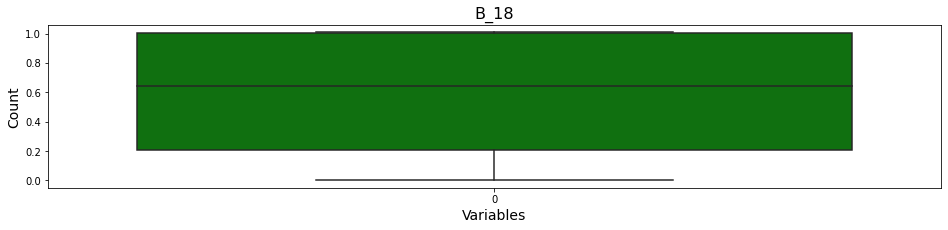

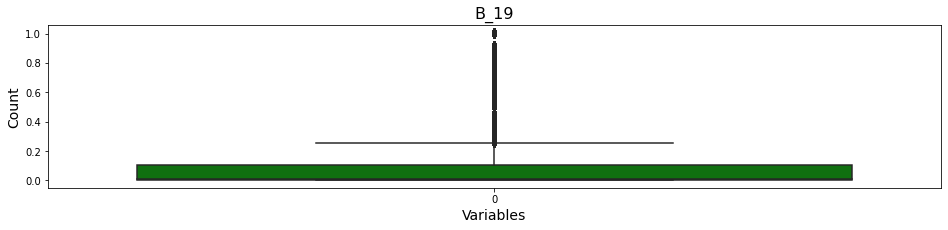

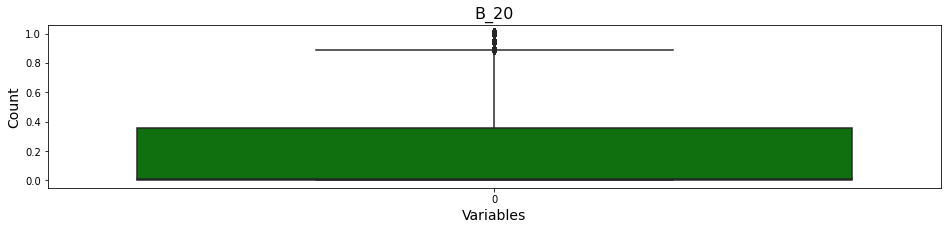

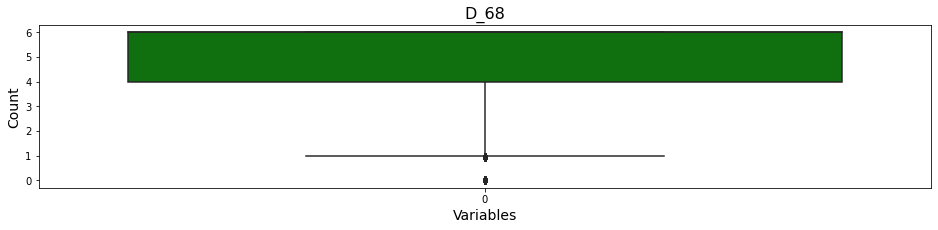

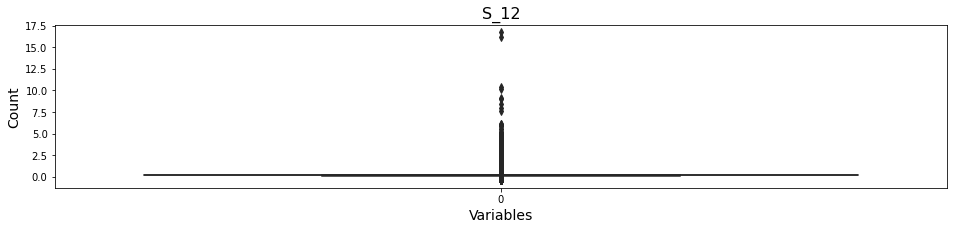

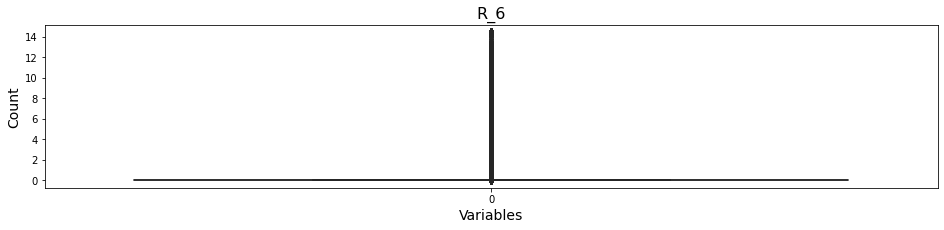

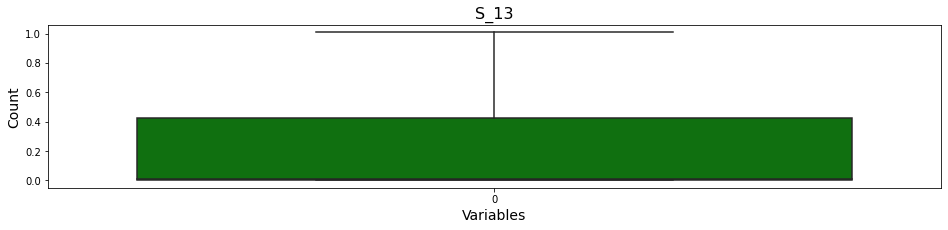

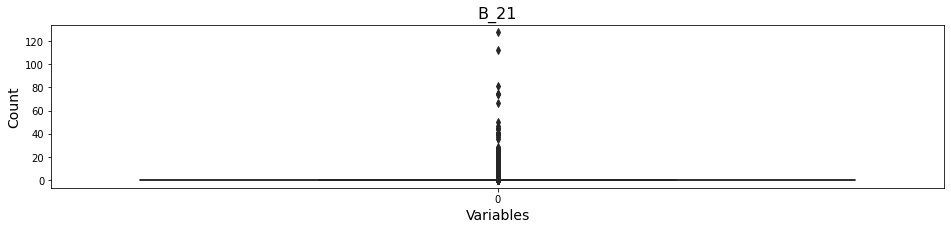

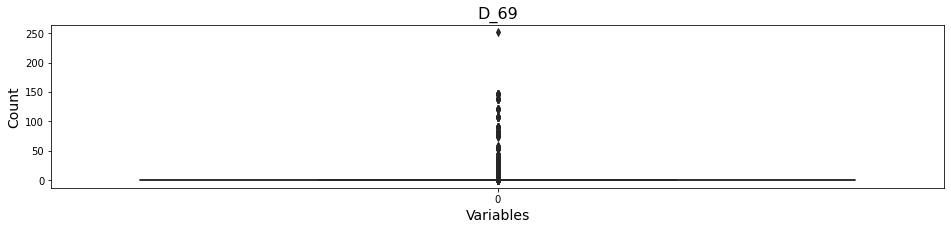

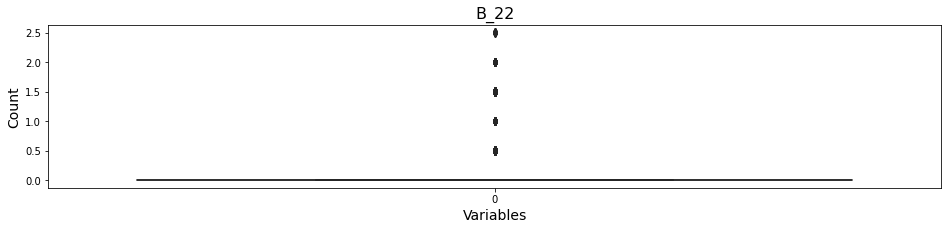

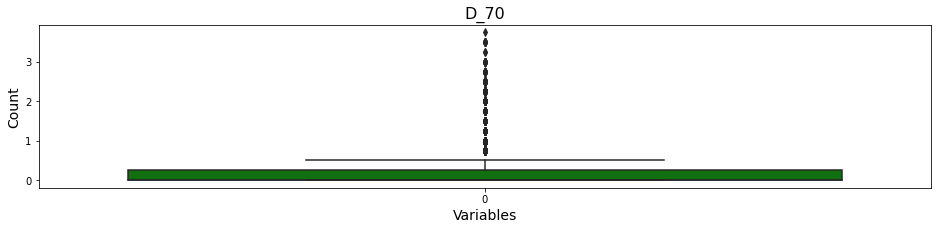

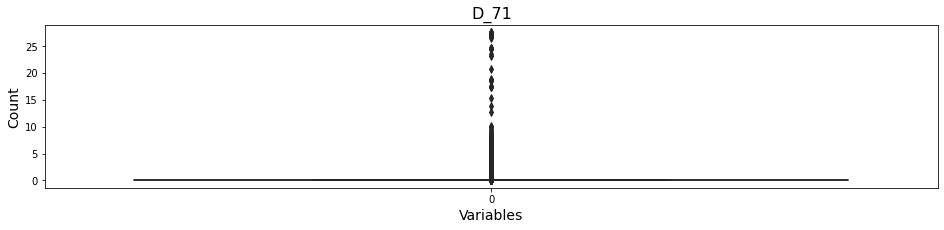

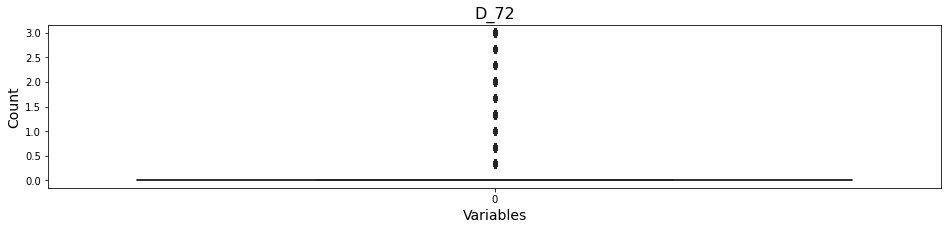

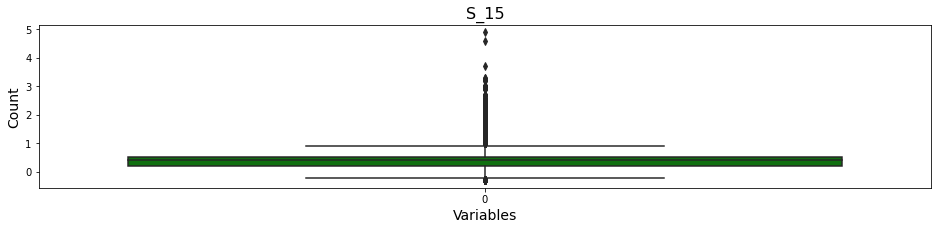

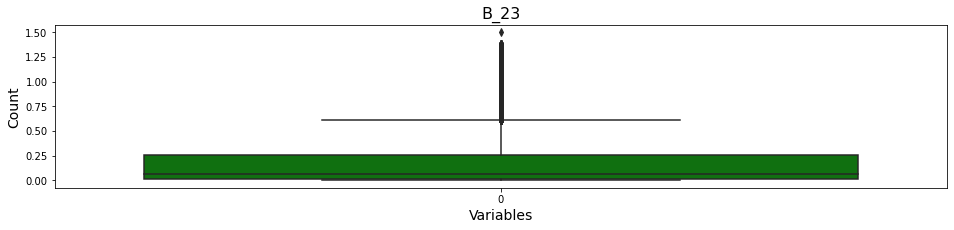

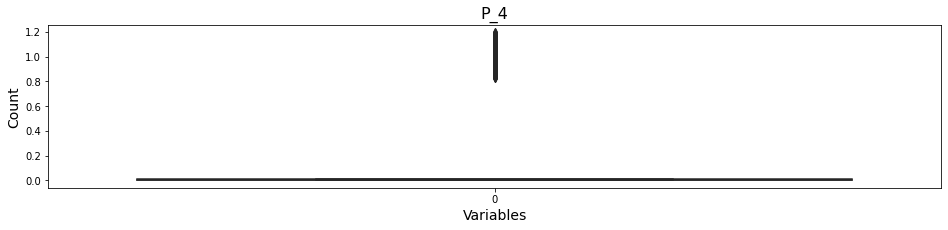

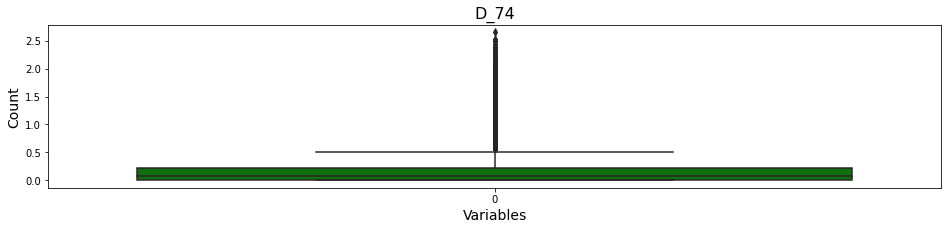

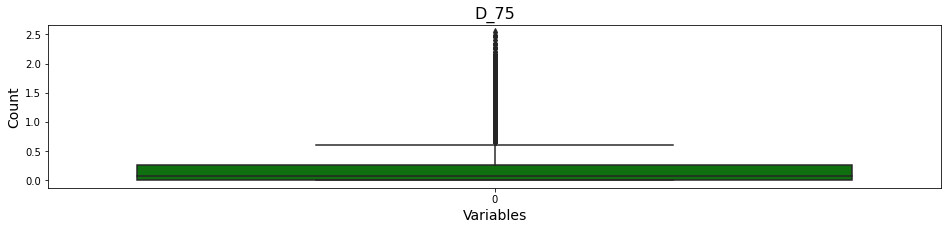

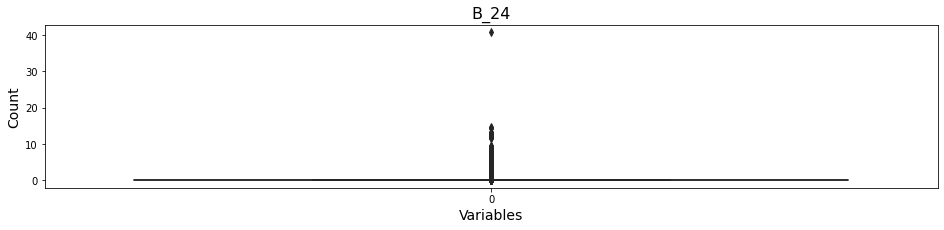

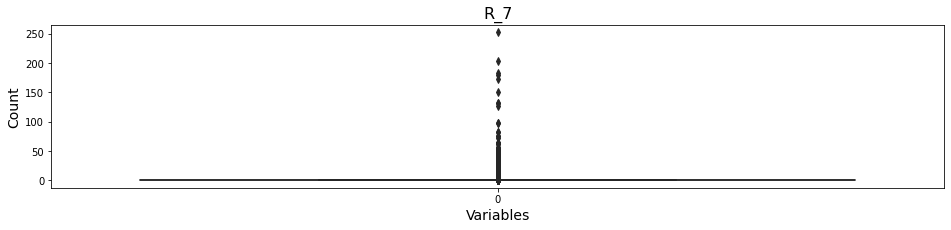

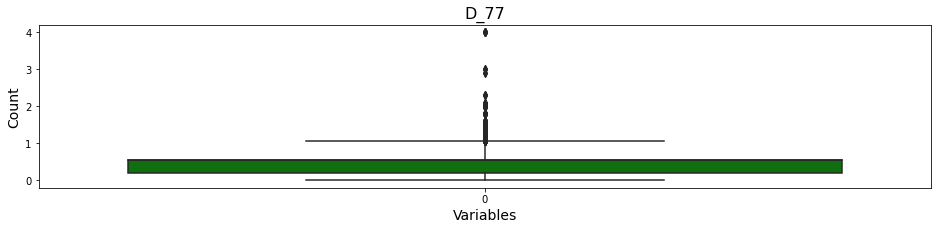

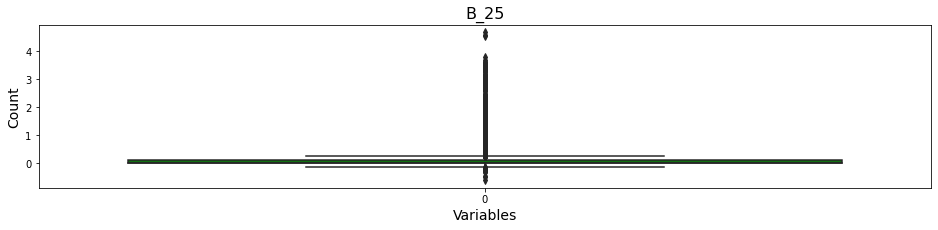

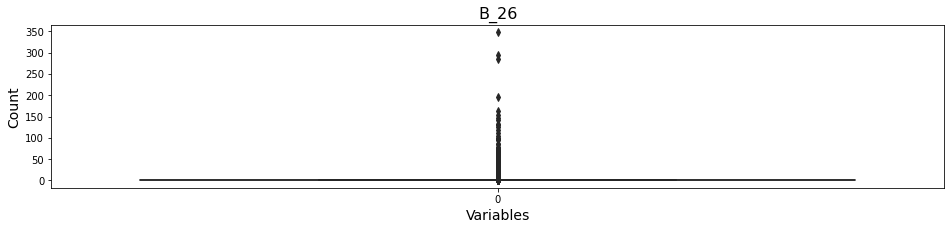

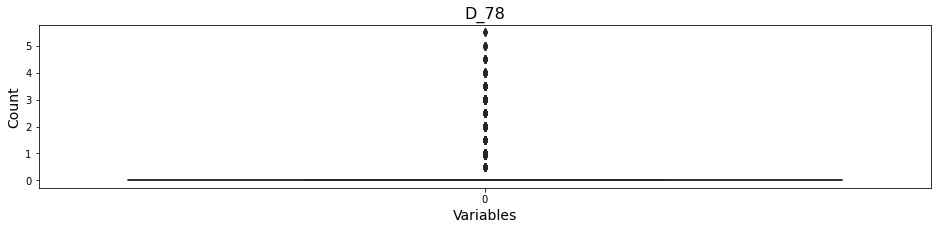

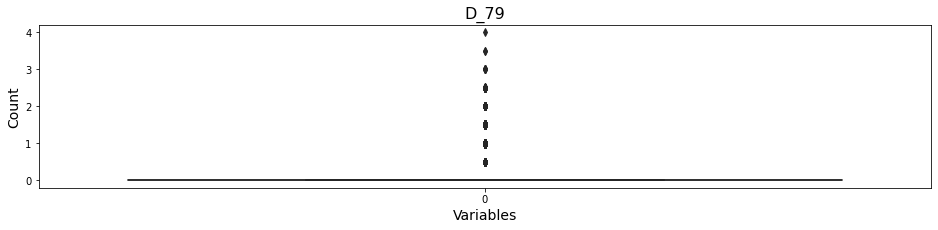

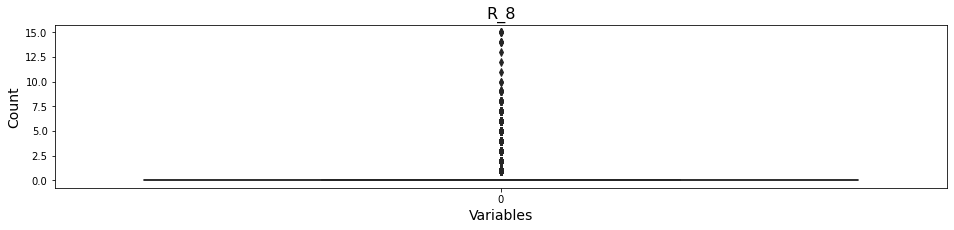

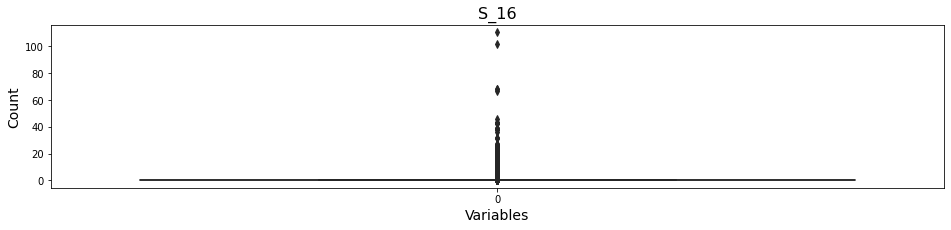

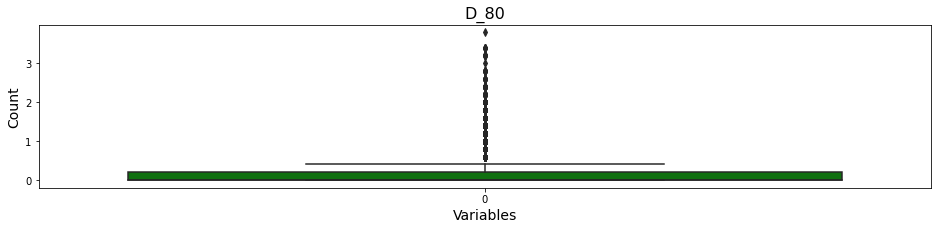

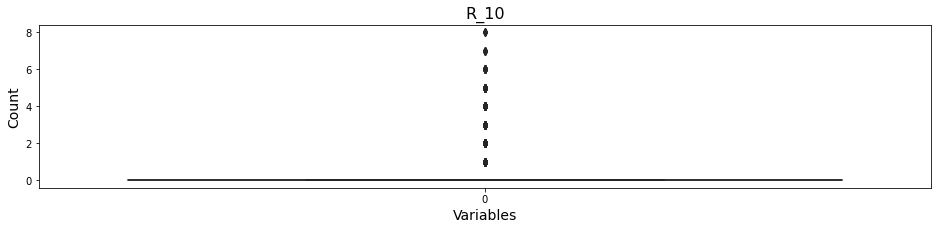

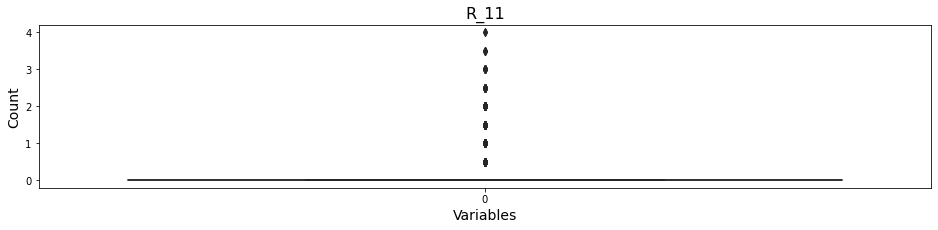

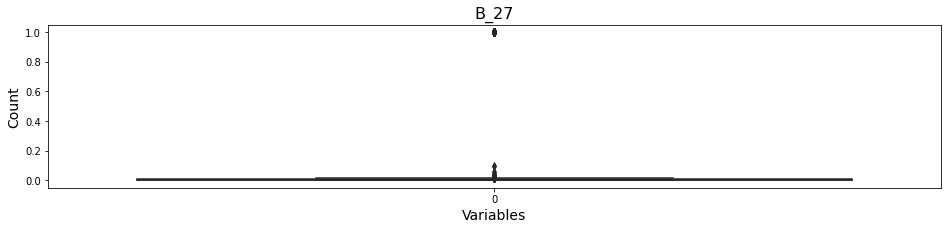

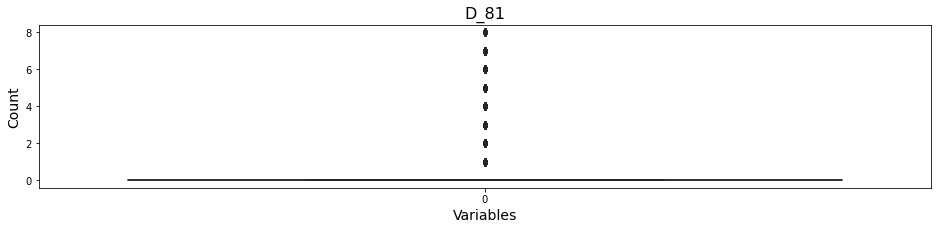

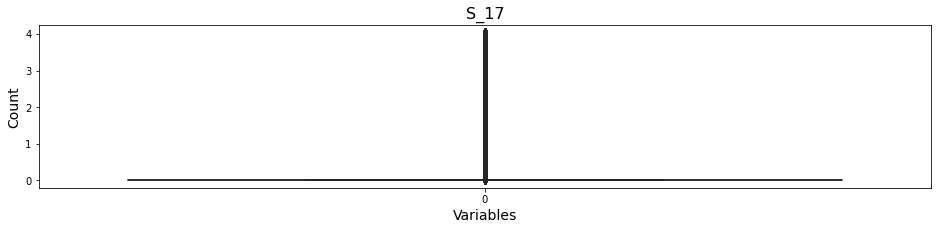

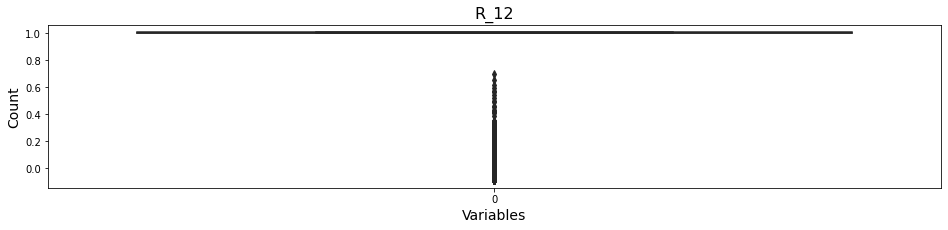

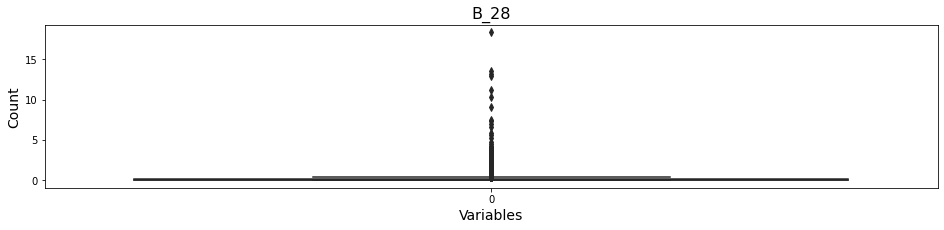

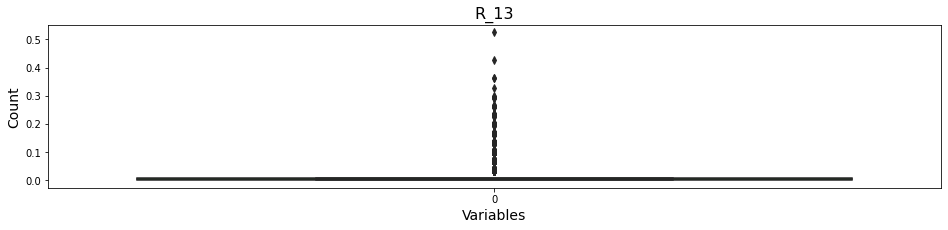

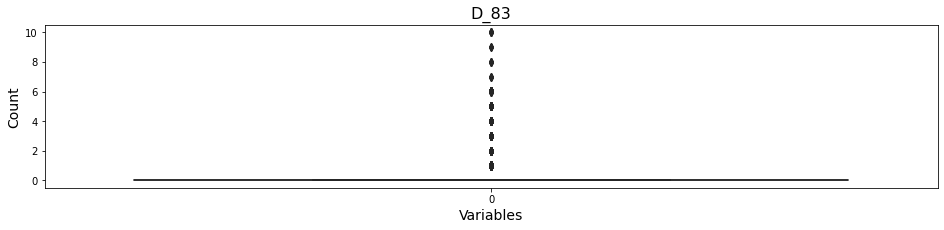

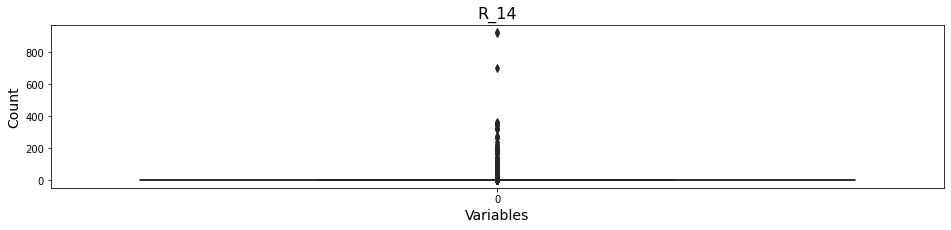

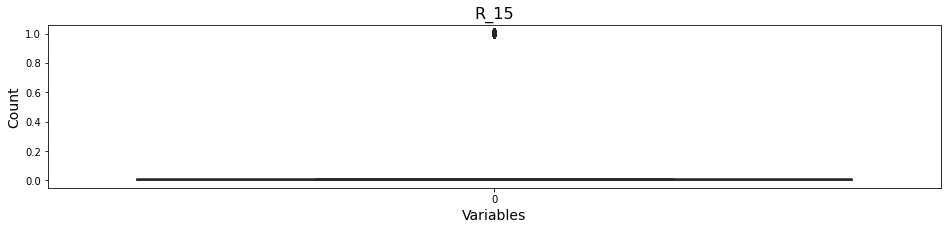

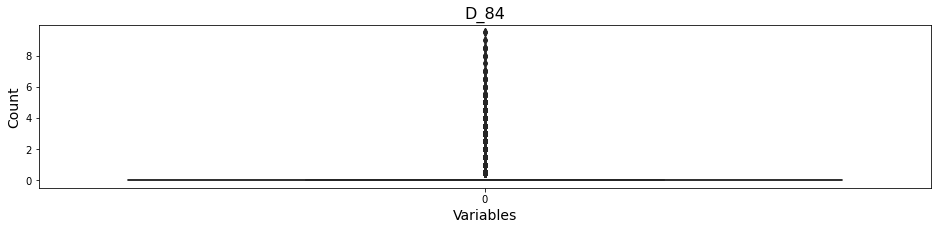

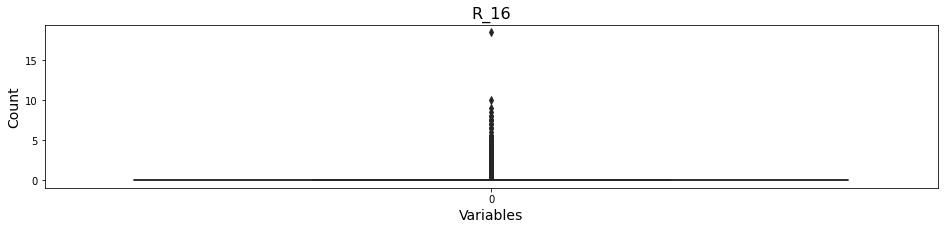

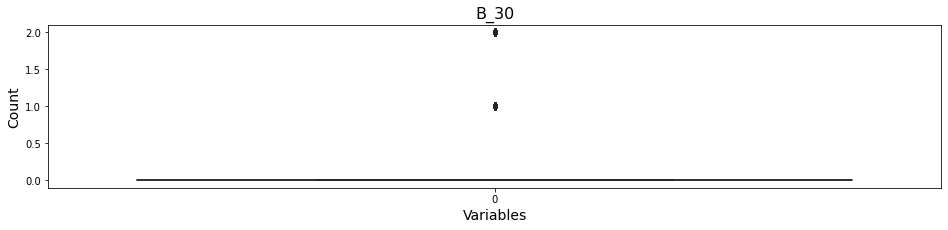

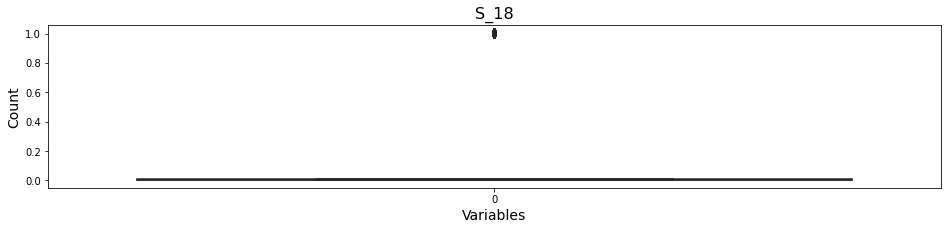

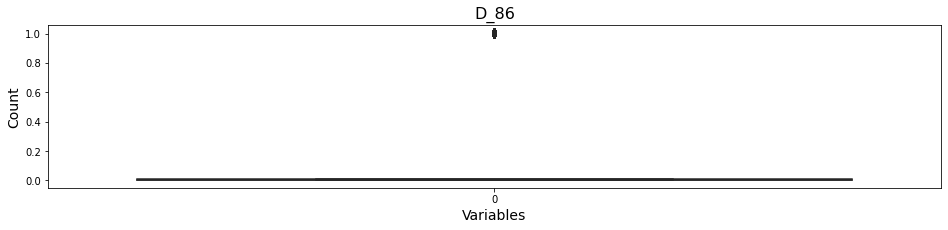

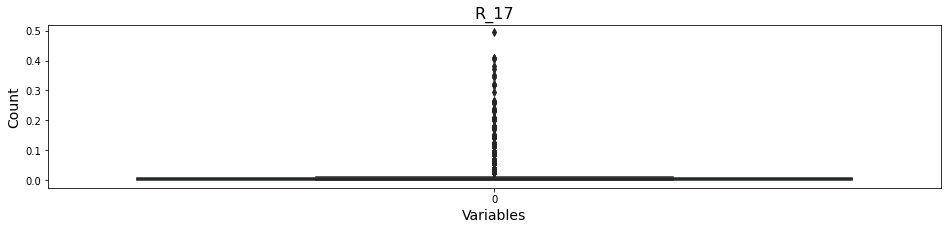

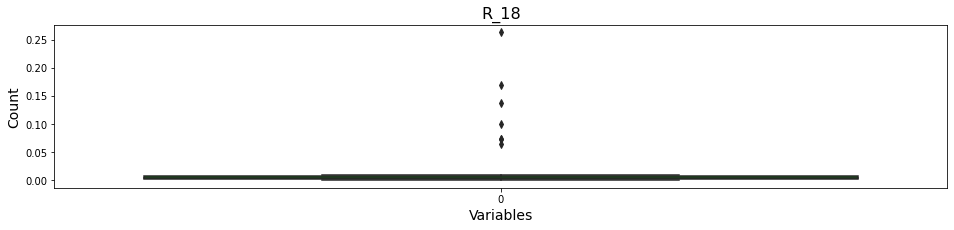

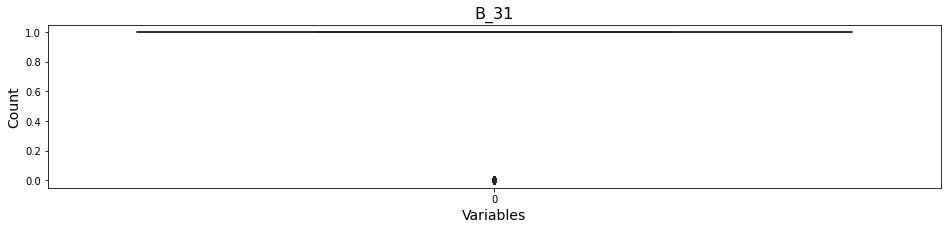

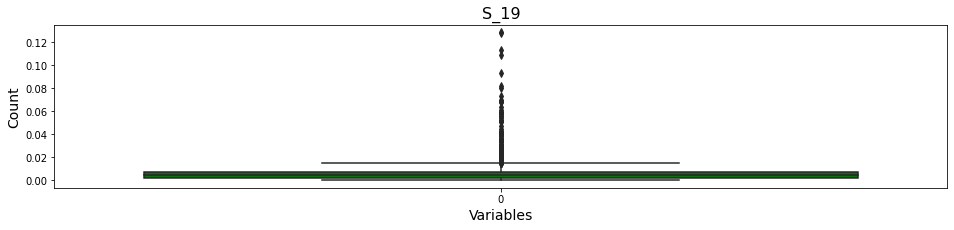

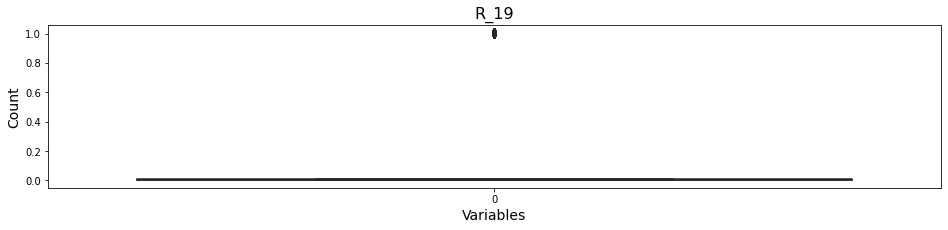

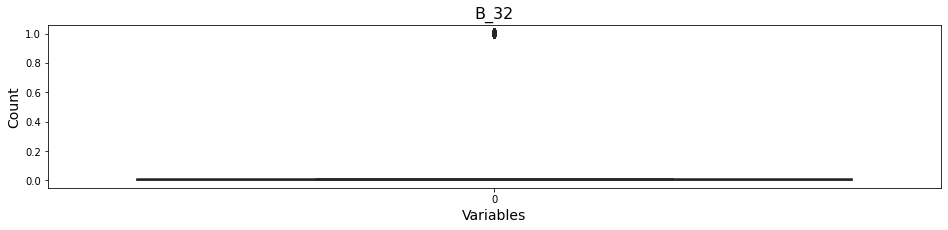

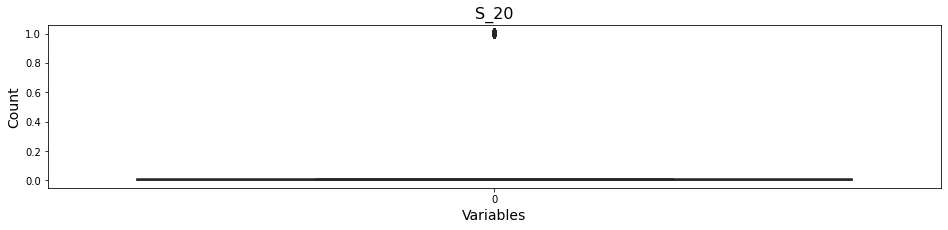

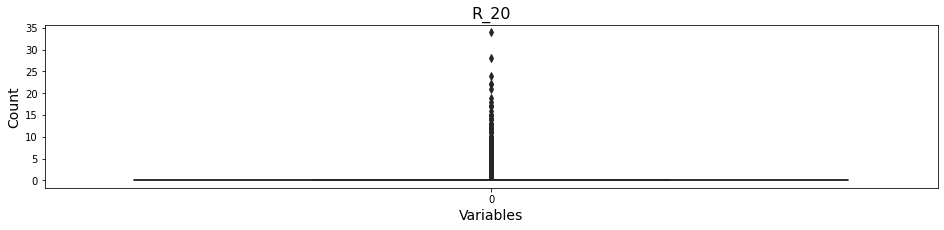

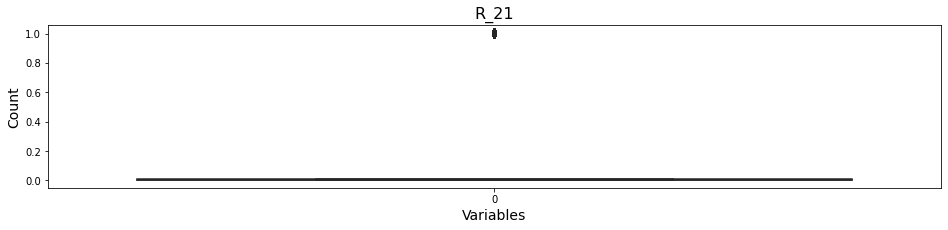

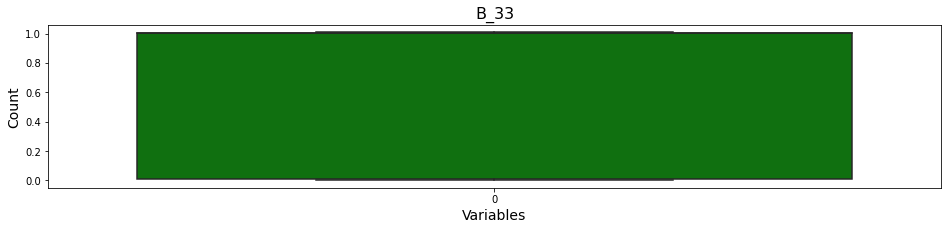

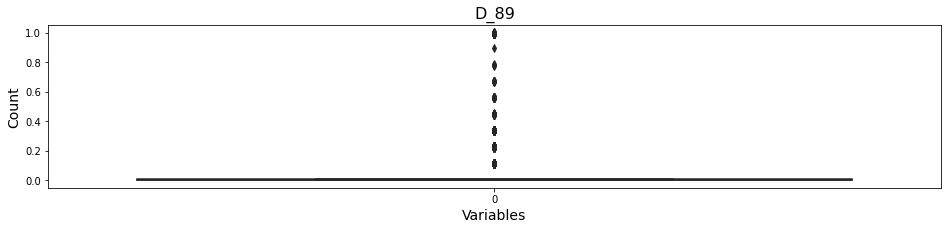

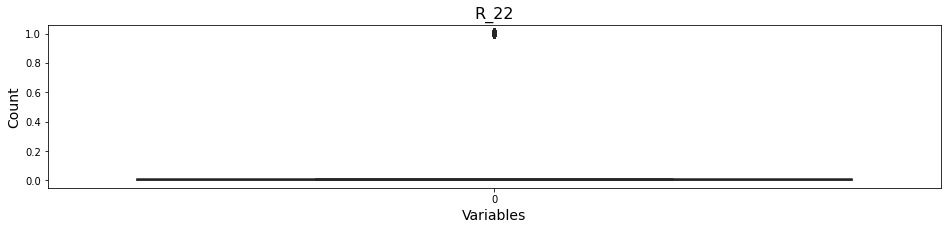

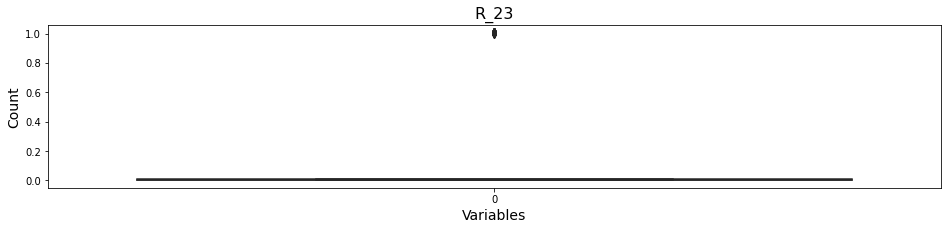

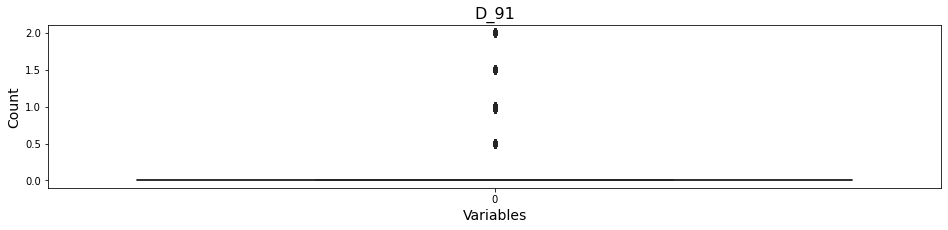

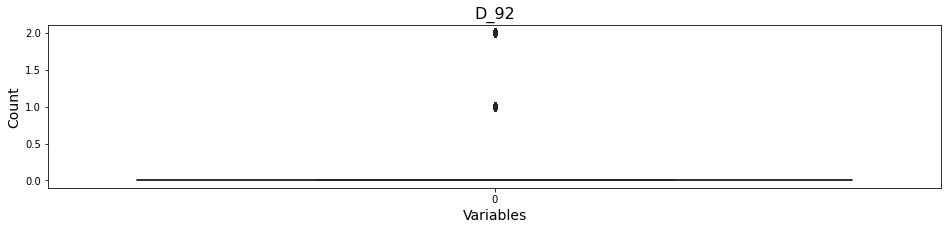

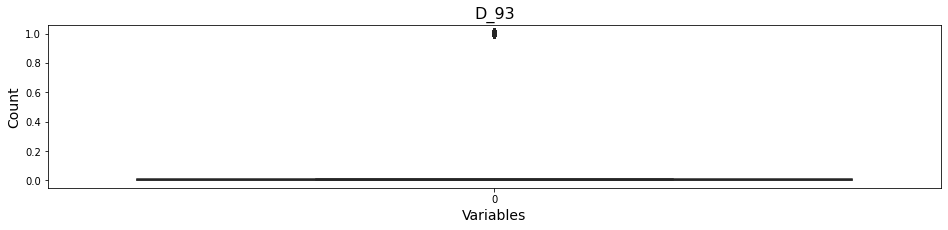

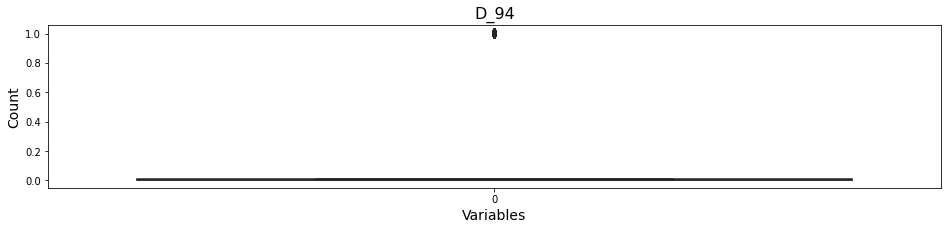

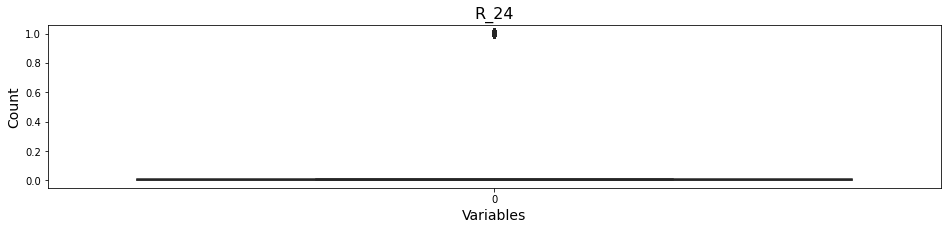

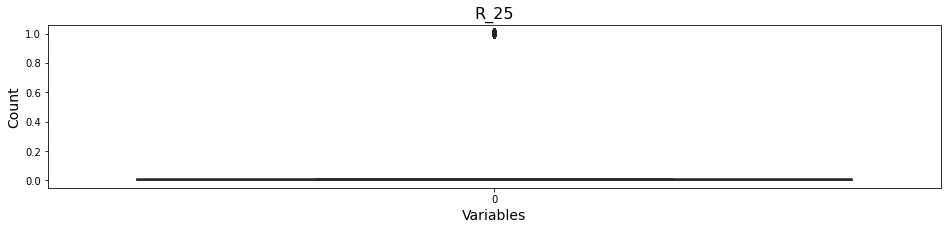

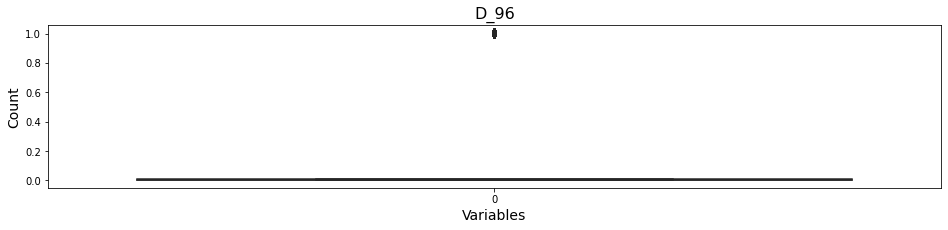

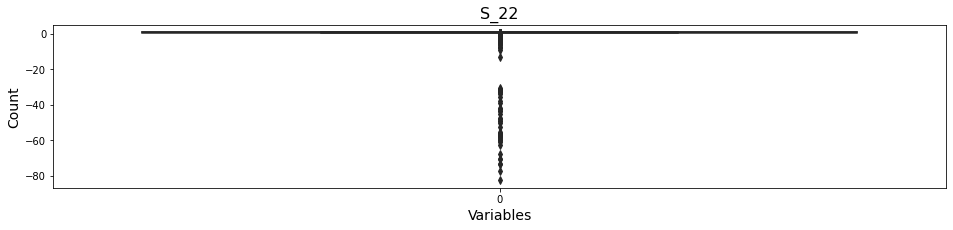

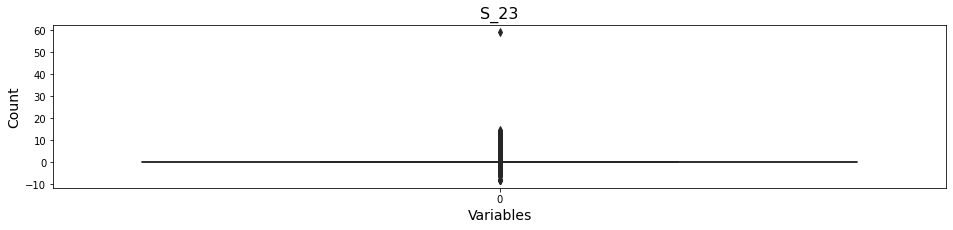

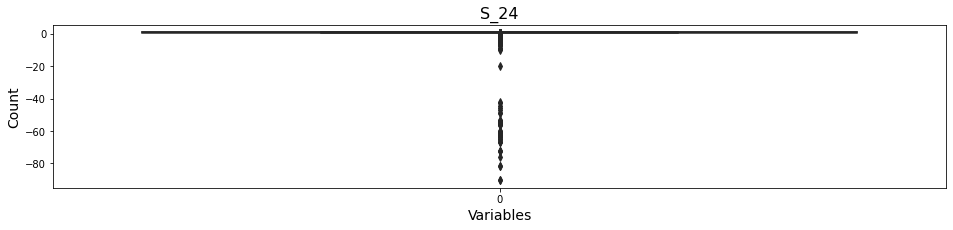

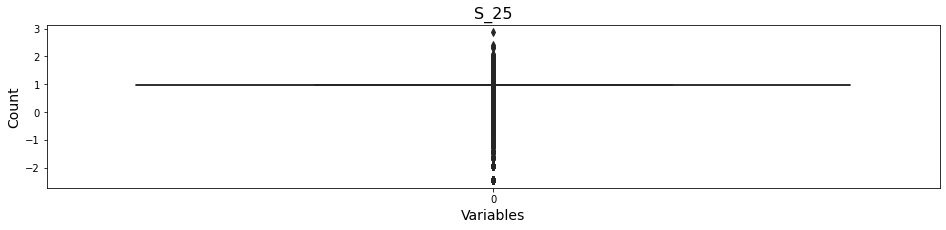

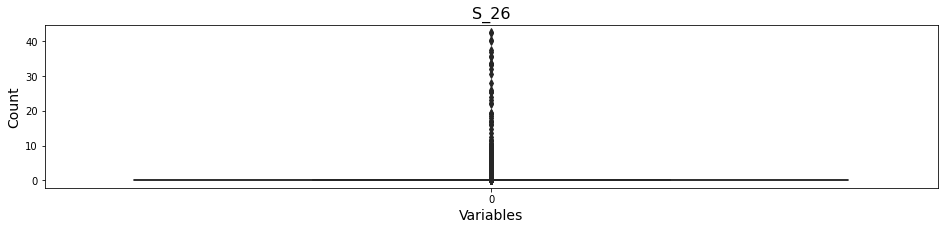

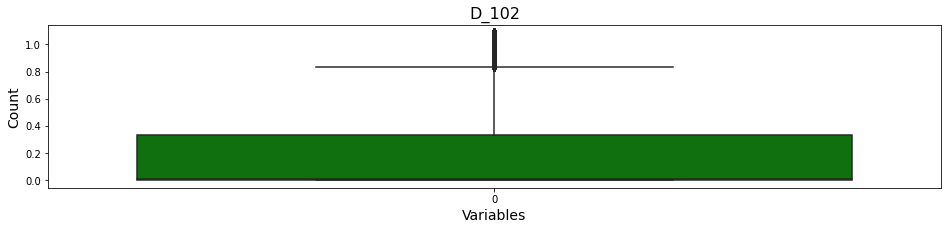

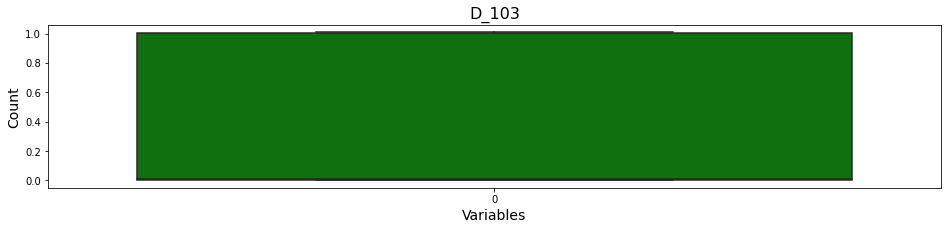

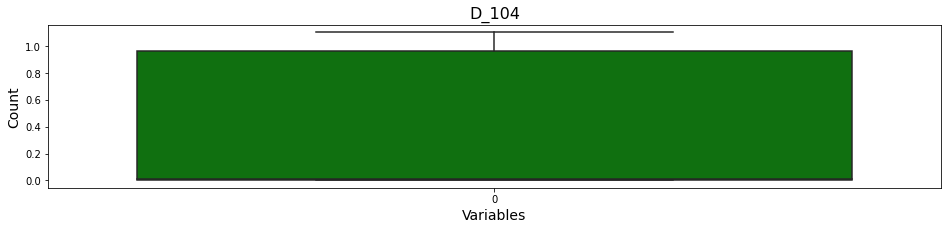

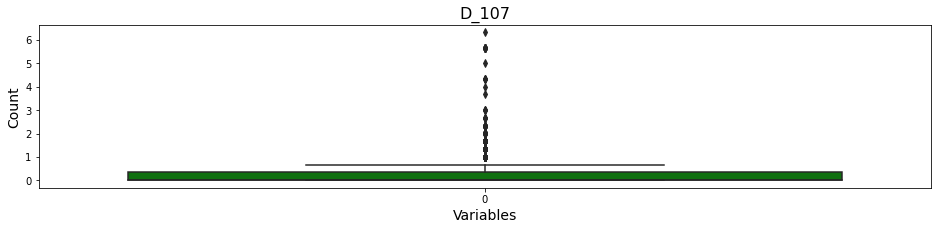

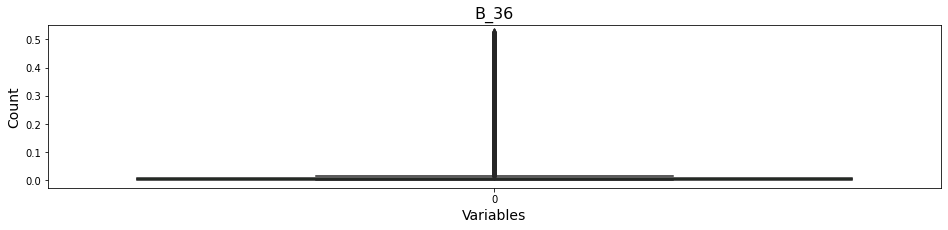

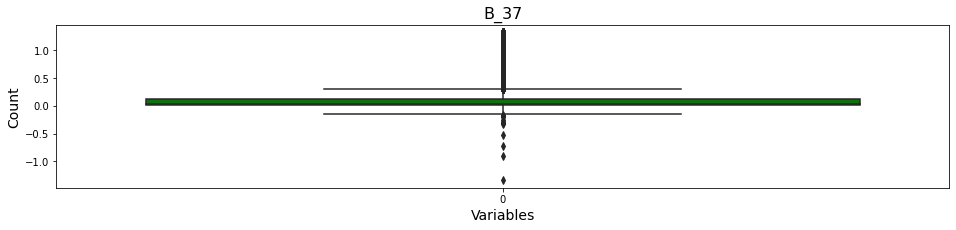

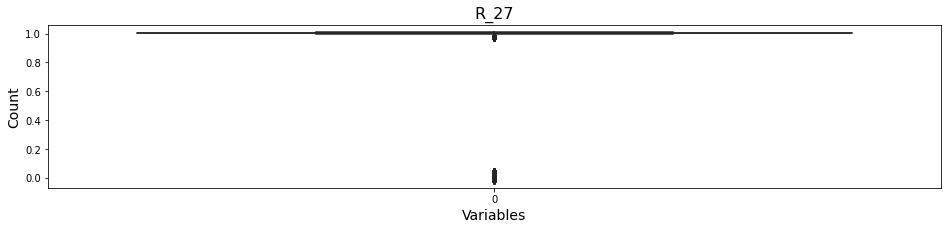

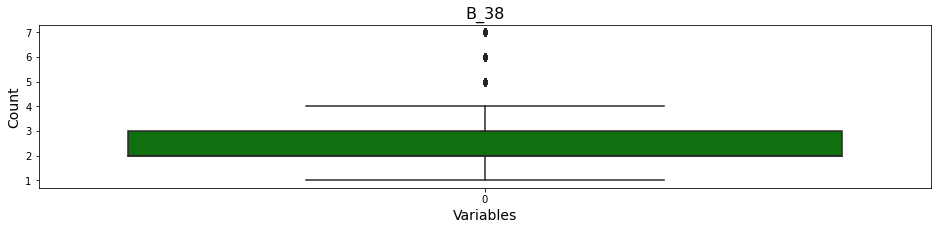

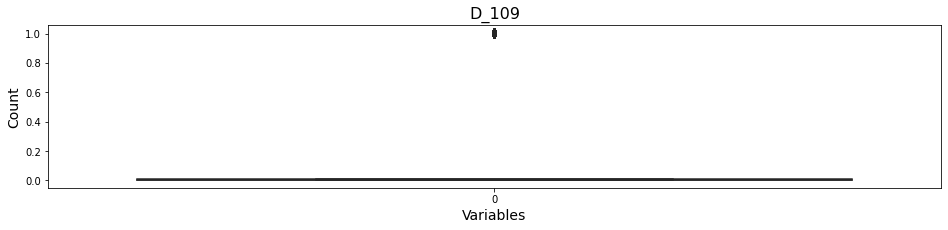

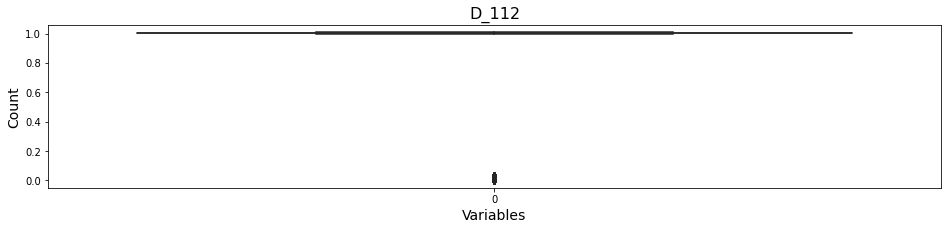

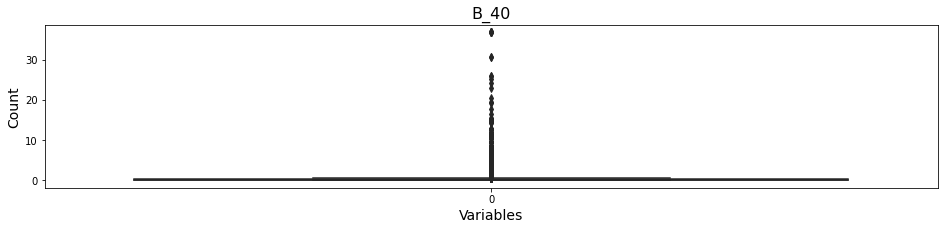

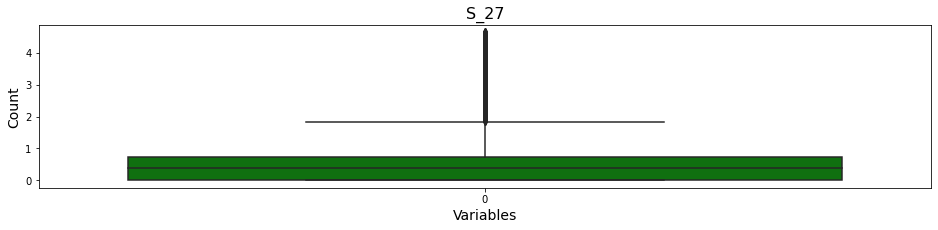

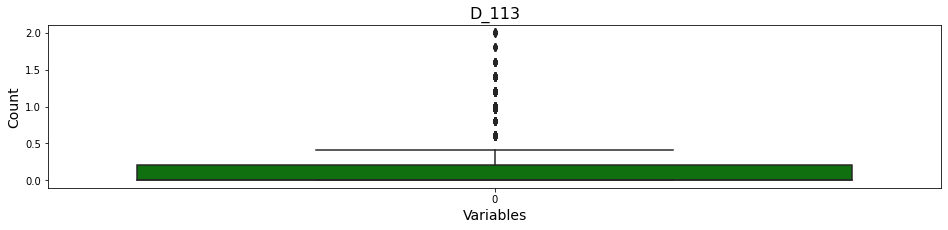

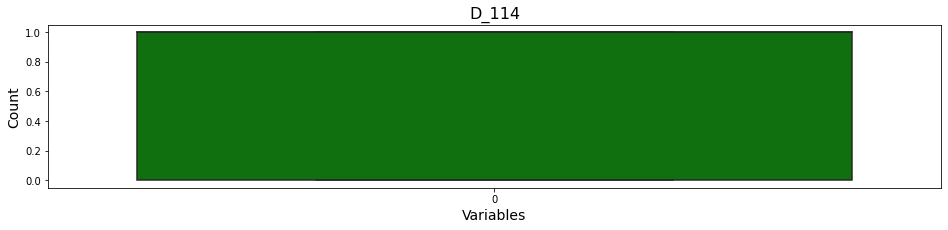

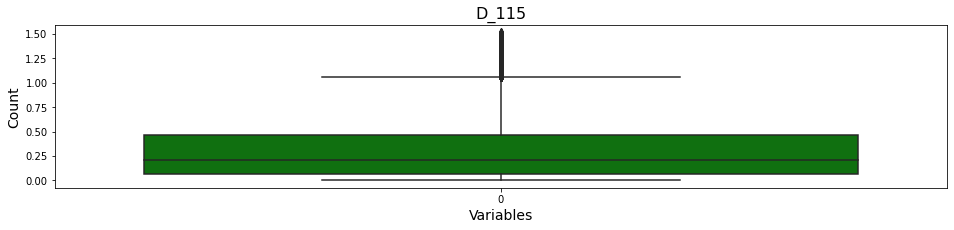

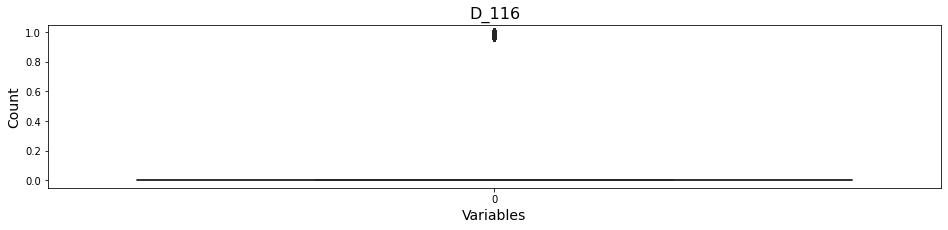

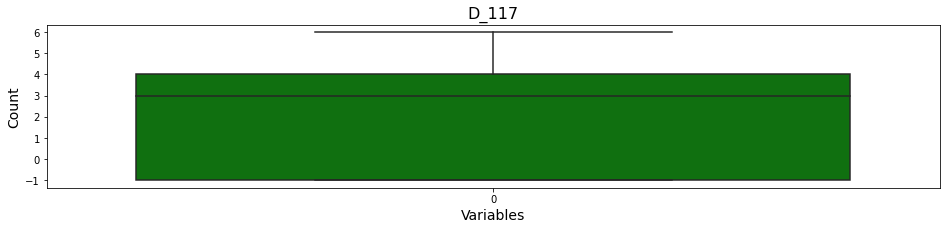

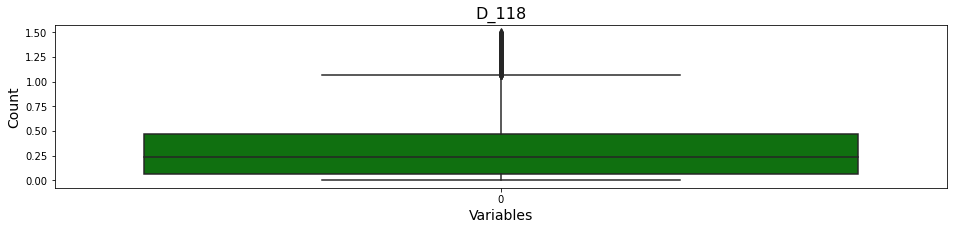

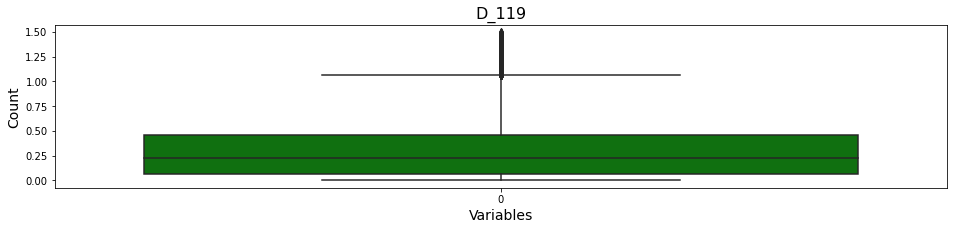

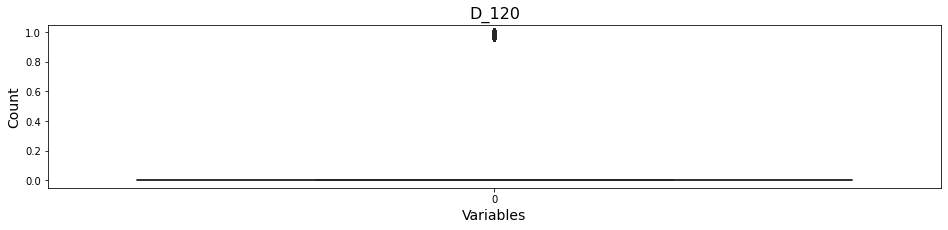

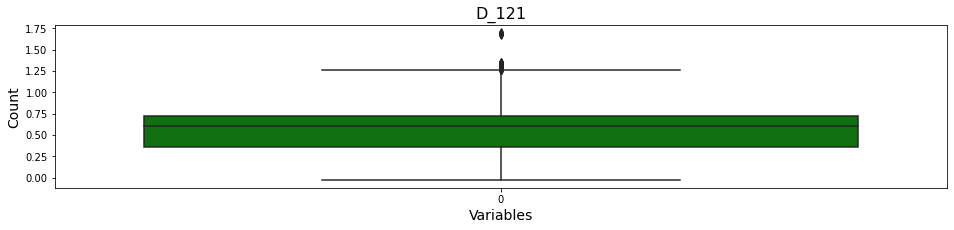

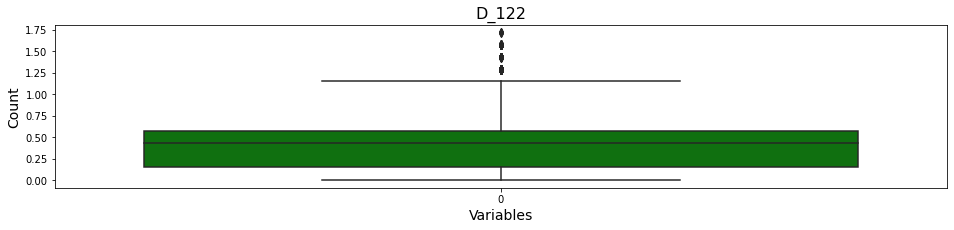

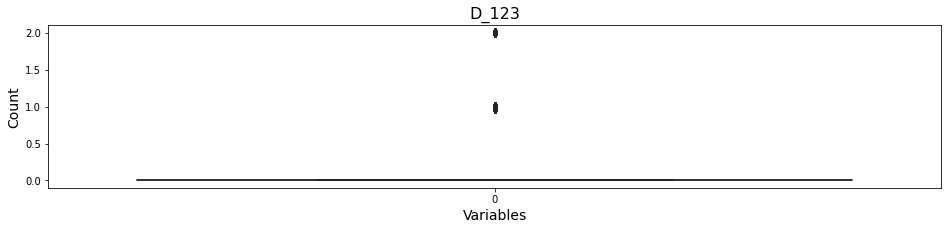

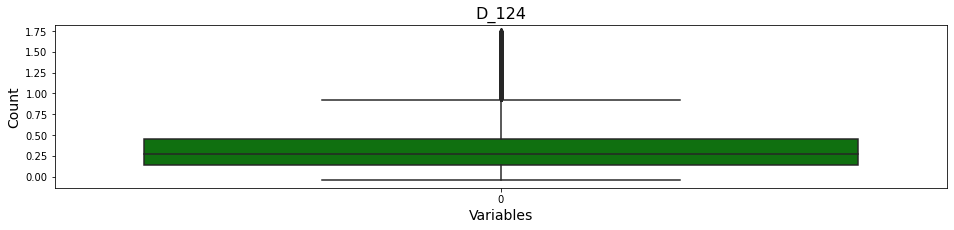

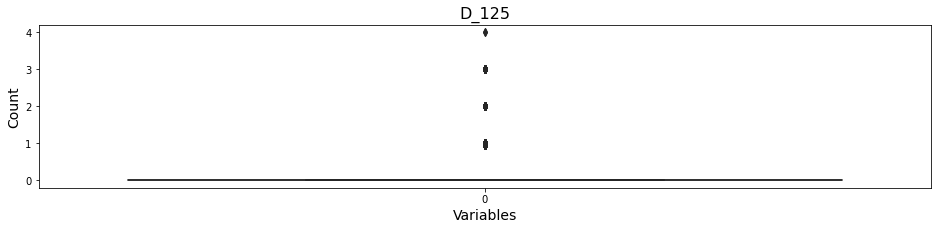

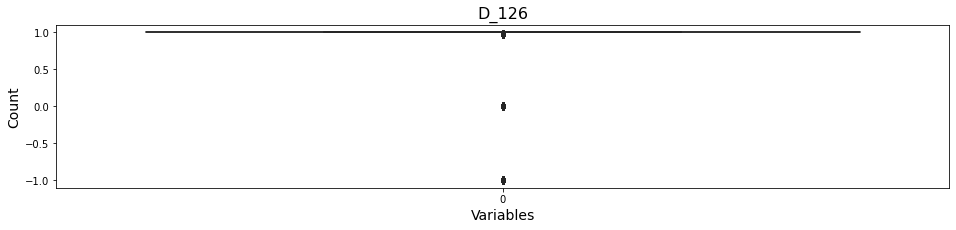

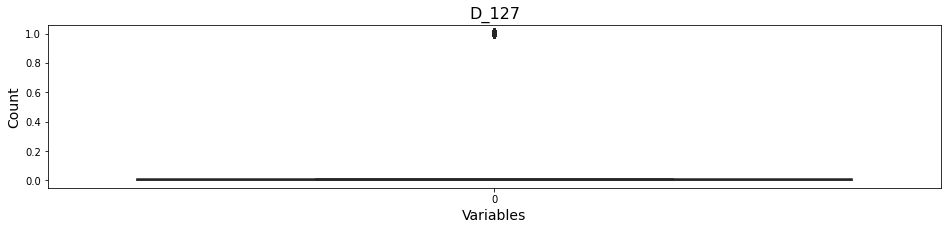

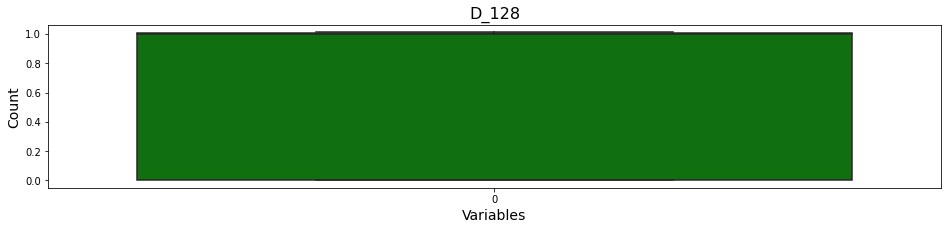

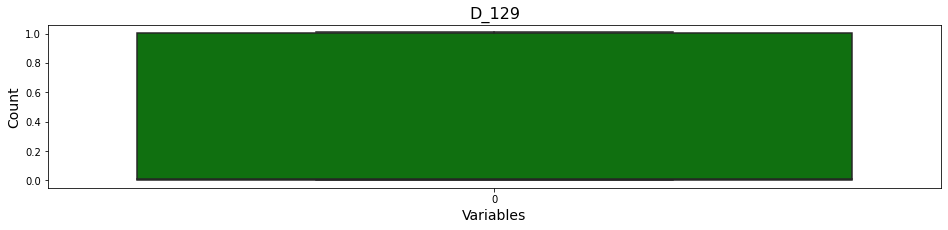

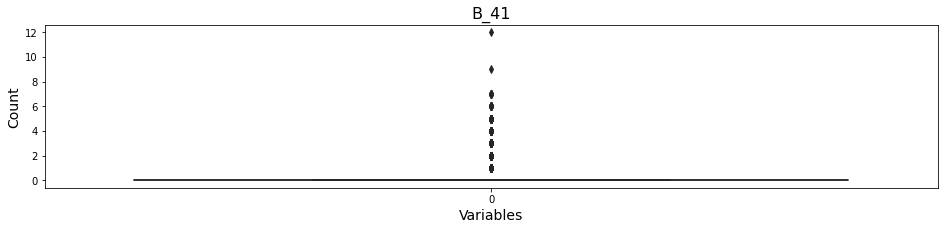

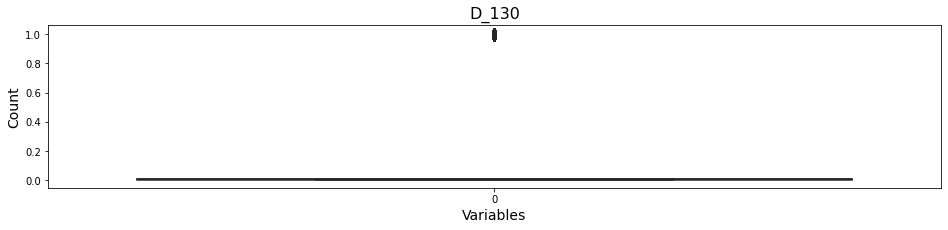

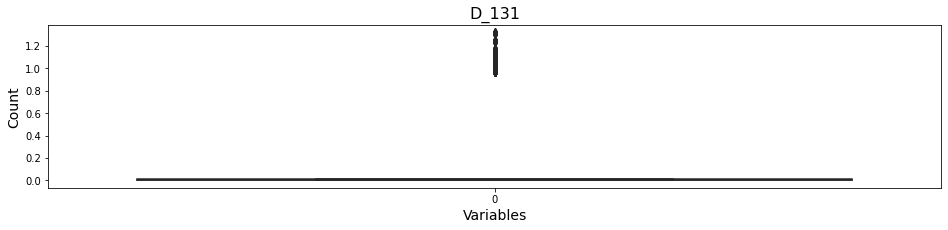

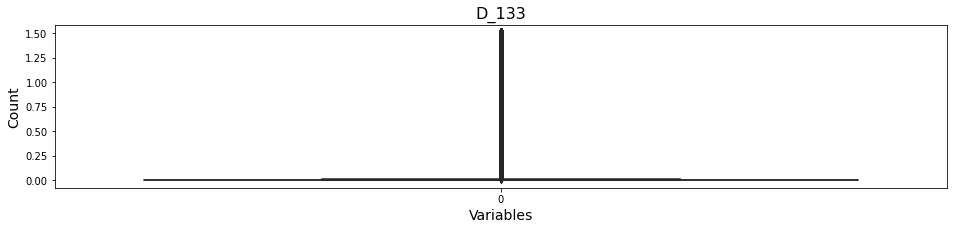

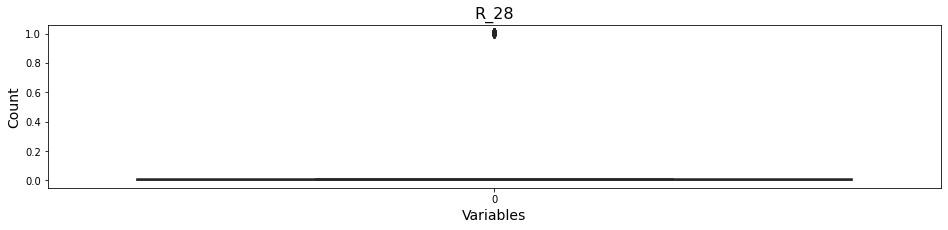

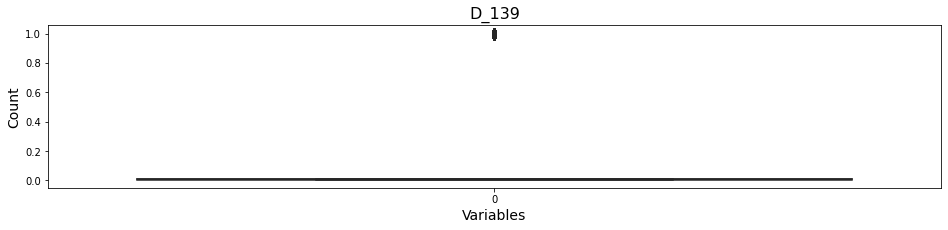

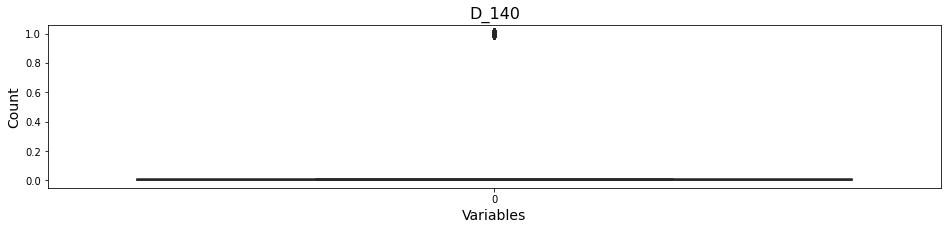

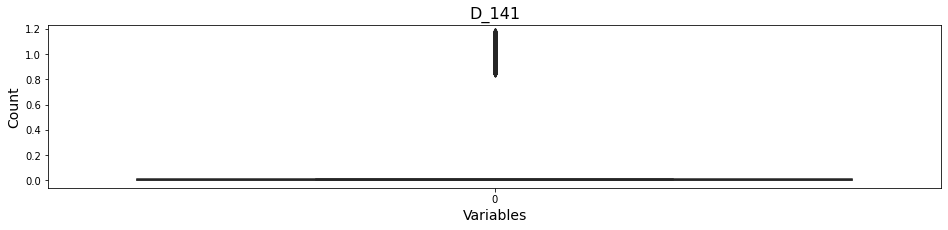

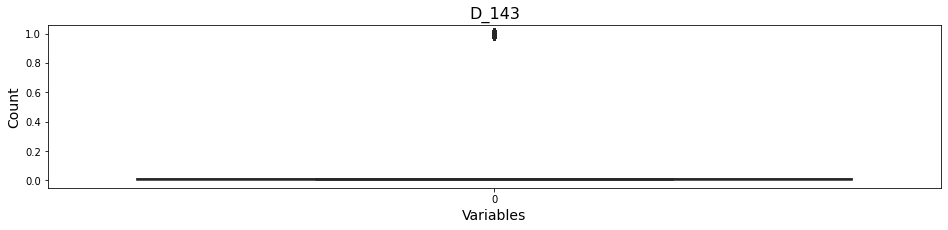

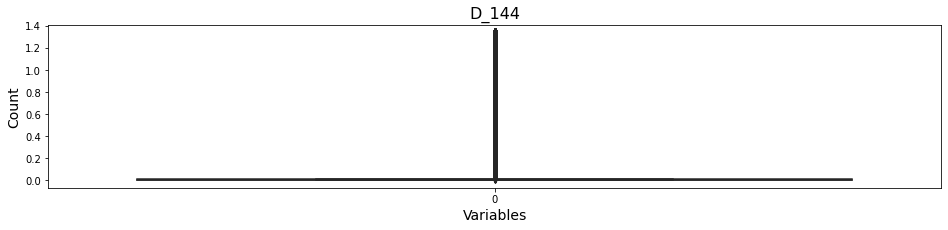

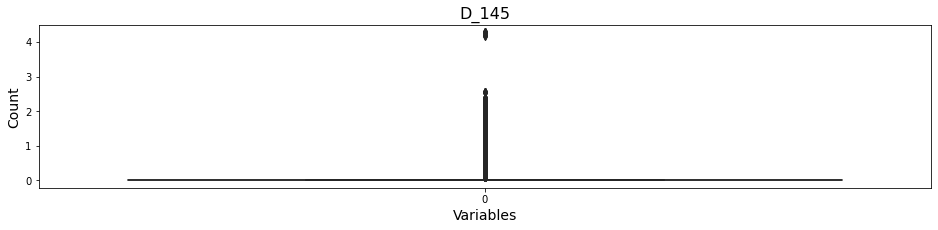

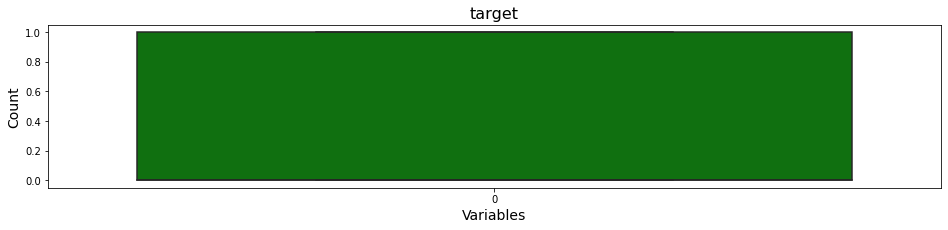

In [34]:
#Detecting Outier
for col in list(df.select_dtypes(['float64','int32','int64']).columns):
    #boxplot
    plt.figure(figsize=(16,3))
    sns.boxplot(data=df[col],color="Green")
    #labeling
    plt.title(col, fontsize=16) #plot TITLE
    plt.xlabel("Variables", fontsize=14) #x-axis label
    plt.ylabel("Count", fontsize=14) #y-axis label

Insight: Boxplot indicate that the data contain outliers. We will have to deal with these outliers. But are these data really outliers? Maybe they are, but they could as well be legitimate traces of rare events. We do not know...

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 161 entries, customer_ID to target
dtypes: datetime64[ns](1), float64(155), int64(4), object(1)
memory usage: 245.7+ MB


In [36]:
#Outlier treatment
def winsorize_series(s):
    q = s.quantile([0.05,0.95])
    if isinstance(q, pd.Series) and len(q) == 2:
        s[s < q.iloc[0]] = q.iloc[0]
        s[s > q.iloc[1]] = q.iloc[1]
    return s

def winsorize_df(df):
    return df.apply(winsorize_series, axis=0)

df_1 = winsorize_df(df.select_dtypes(['float64','int64']))

In [37]:
df.describe()

P_2          D_39            B_1            B_2  \
count  200000.000000  2.000000e+05  200000.000000  200000.000000   
mean        0.656139  1.534126e-01       0.125356       0.617109   
std         0.246969  2.723813e-01       0.213396       0.402268   
min        -0.383019  3.892609e-07      -0.899396       0.000003   
25%         0.477935  4.541390e-03       0.008858       0.100647   
50%         0.694621  9.066380e-03       0.031935       0.814169   
75%         0.866669  2.360171e-01       0.129569       1.002237   
max         1.009998  5.331360e+00       1.324053       1.010000   

                R_1            S_3          D_41           B_3          D_43  \
count  2.000000e+05  200000.000000  2.000000e+05  2.000000e+05  2.000000e+05   
mean   8.121541e-02       0.337423  6.255516e-02  1.347040e-01  3.192955e-01   
std    2.309947e-01       0.289340  2.088830e-01  2.353799e-01  3.082977e-01   
min    2.962930e-08      -0.254707  5.627163e-08  1.042180e-07  8.705647e-07   
25%    2.899612e-03       0.137822  2.899116e-03  5.293077e-03  5.891856e-02   
50%    5.792558e-03       0.177209  5.770649e-03  9.875022e-03  1.647853e-01   
75%    8.684554e-03       0.513112  8.655016e-03  1.640216e-01  6.997100e-01   
max    2.507711e+00       2.918675  6.798167e+00  1.625262e+00  9.089694e+00   

               D_44           B_4           D_45           B_5           R_2  \
count  2.000000e+05  2.000000e+05  200000.000000  2.000000e+05  2.000000e+05   
mean   1.623280e-01  1.741724e-01       0.251390  8.147989e-02  4.915188e-02   
std    2.819464e-01  2.233719e-01       0.242035  5.027913e-01  2.054645e-01   
min    1.031370e-08  4.744112e-07       0.000002  1.730131e-07  8.265748e-10   
25%    4.089886e-03  2.768294e-02       0.053919  7.255991e-03  2.610179e-03   
50%    8.155205e-03  8.332867e-02       0.182115  1.513976e-02  5.229932e-03   
75%    2.502097e-01  2.400149e-01       0.372821  5.280441e-02  7.841807e-03   
max    2.880841e+00  2.789190e+00       1.561621  8.099680e+01  1.009999e+00   

                D_46           D_47           D_48            B_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.541943       0.405916       0.450278       0.146305   
std         0.197819       0.234302       0.345877       0.537206   
min        -3.943876      -0.026620      -0.009609      -0.004479   
25%         0.437357       0.233453       0.102545       0.020036   
50%         0.484353       0.380551       0.401698       0.081925   
75%         0.754143       0.554812       0.851044       0.191346   
max         5.096873       1.299580       2.857023      79.091481   

                 B_7           B_8          D_51           B_9           R_3  \
count  200000.000000  2.000000e+05  2.000000e+05  2.000000e+05  2.000000e+05   
mean        0.188786  4.550852e-01  1.463244e-01  1.906887e-01  1.219912e-01   
std         0.232391  4.973858e-01  2.422416e-01  2.818005e-01  2.147243e-01   
min        -0.852893  6.047988e-08  2.990705e-07  6.195194e-08  2.238322e-09   
25%         0.028490  4.546879e-03  3.653655e-03  5.770511e-03  4.699022e-03   
50%         0.076779  9.094419e-03  7.299554e-03  2.629611e-02  9.366797e-03   
75%         0.277696  1.004192e+00  3.361746e-01  3.407022e-01  2.003582e-01   
max         1.252750  1.010775e+00  2.009926e+00  1.751525e+01  6.709854e+00   

                D_52            P_3           B_10           S_5  \
count  200000.000000  200000.000000  200000.000000  2.000000e+05   
mean        0.183930       0.619371       0.230777  8.825993e-02   
std         0.184690       0.184091       3.015213  6.477031e-01   
min        -0.007031      -1.055714      -0.002956  1.465230e-07   
25%         0.073985       0.546970       0.028273  5.646385e-03   
50%         0.143716       0.624939       0.108280  1.341704e-02   
75%         0.232690       0.700600       0.295540  6.981621e-02   
max         1.009999       2.027742     639.939489  1.433420e+02   

      

In [38]:
df_1.describe()

P_2           D_39            B_1            B_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.661825       0.137668       0.113345       0.617630   
std         0.230971       0.207966       0.169429       0.401387   
min         0.218007       0.000905       0.002134       0.019198   
25%         0.477935       0.004541       0.008858       0.100647   
50%         0.694621       0.009066       0.031935       0.814169   
75%         0.866669       0.236017       0.129569       1.002237   
max         0.981987       0.654666       0.610299       1.008441   

                 R_1            S_3           D_41            B_3  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.062711       0.334290       0.042707       0.125691   
std         0.154145       0.273867       0.104660       0.206003   
min         0.000579       0.068480       0.000586       0.001221   
25%         0.002900       0.137822       0.002899       0.005293   
50%         0.005793       0.177209       0.005771       0.009875   
75%         0.008685       0.513112       0.008655       0.164022   
max         0.507647       0.811675       0.402735       0.705486   

                D_43           D_44            B_4           D_45  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.312447       0.158987       0.162176       0.243836   
std         0.286031       0.269118       0.180821       0.219611   
min         0.012952       0.000825       0.003606       0.012644   
25%         0.058919       0.004090       0.027683       0.053919   
50%         0.164785       0.008155       0.083329       0.182115   
75%         0.699710       0.250210       0.240015       0.372821   
max         0.699710       0.950355       0.631093       0.760172   

                 B_5            R_2           D_46           D_47  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.054586       0.005227       0.545447       0.402297   
std         0.087263       0.002977       0.154695       0.220232   
min         0.001915       0.000517       0.314427       0.052274   
25%         0.007256       0.002610       0.437357       0.233453   
50%         0.015140       0.005230       0.484353       0.380551   
75%         0.052804       0.007842       0.754143       0.554812   
max         0.334800       0.009938       0.780525       0.842464   

                D_48            B_6            B_7            B_8  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.448194       0.111935       0.180316       0.455079   
std         0.340875       0.097843       0.205698       0.497334   
min         0.015893       0.006215       0.008839       0.000899   
25%         0.102545       0.020036       0.028490       0.004547   
50%         0.401698       0.081925       0.076779       0.009094   
75%         0.851044       0.191346       0.277696       1.004192   
max         0.935926       0.330446       0.692244       1.008675   

                D_51            B_9            R_3           D_52  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.137193       0.180140       0.106529       0.166987   
std         0.210327       0.240256       0.144336       0.120330   
min         0.000727       0.001151       0.000945       0.020396   
25%         0.003654       0.005771       0.004699       0.073985   
50%         0.007300       0.026296       0.009367       0.143716   
75%         0.336175       0.340702       0.200358       0.232690   
max         0.671647       0.651531       0.504391       0.492050   

                 P_3           B_10            S_5           B_11  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.626595       0.150703       0.060783       0.099230   
std         0.152543       0.122434       0.094816       0.160865   
min      

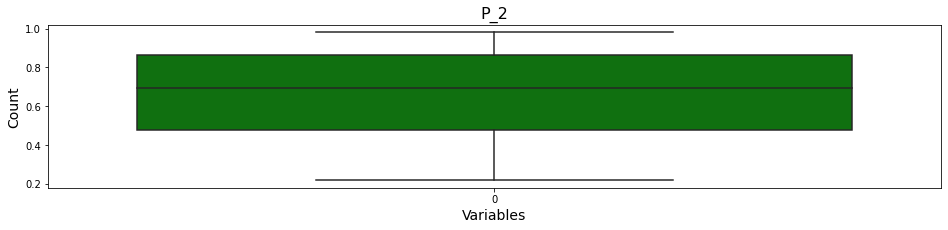

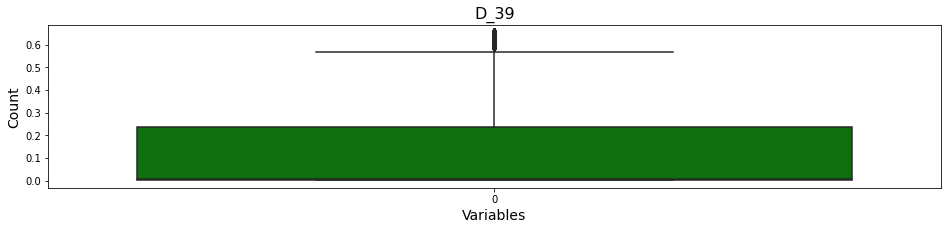

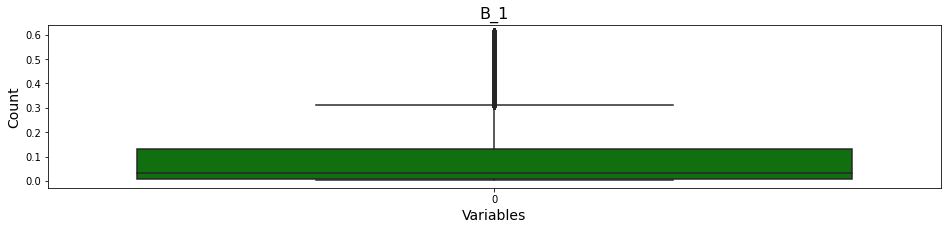

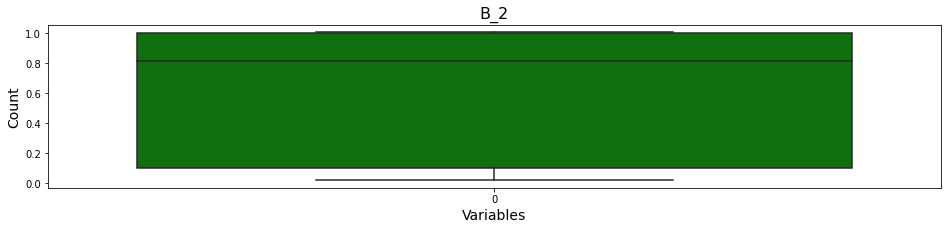

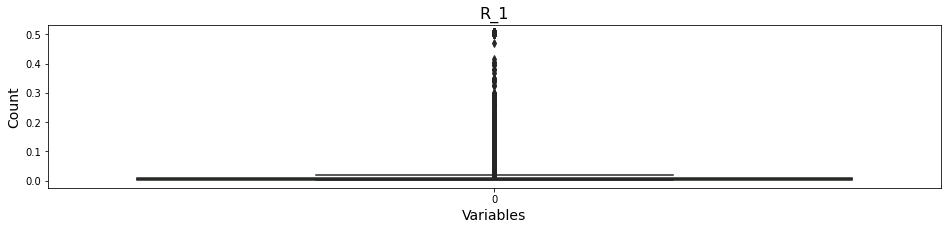

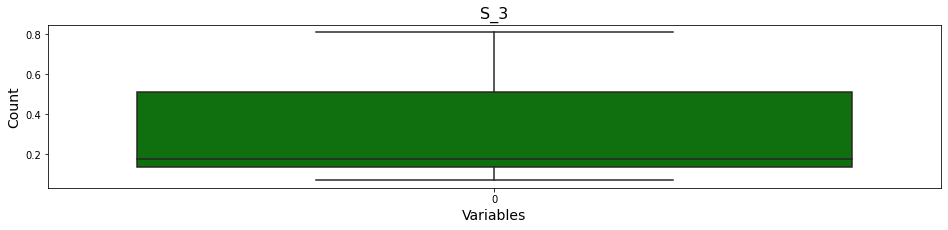

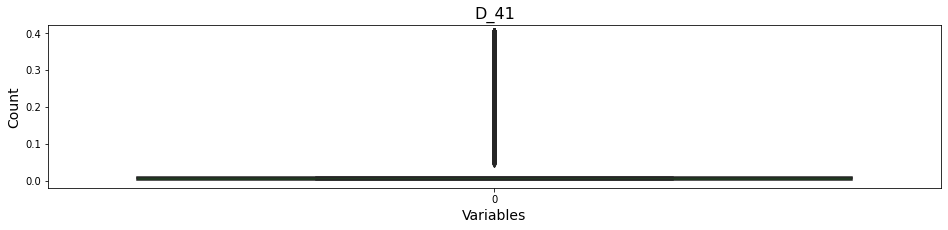

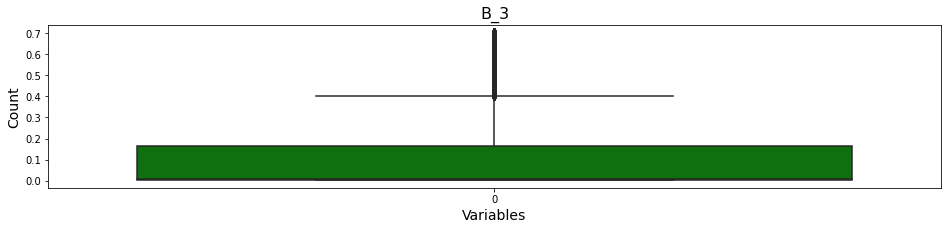

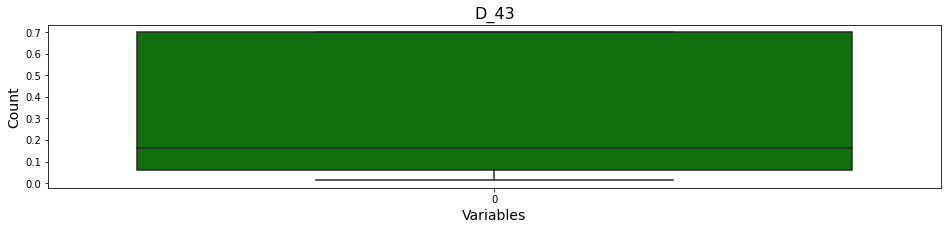

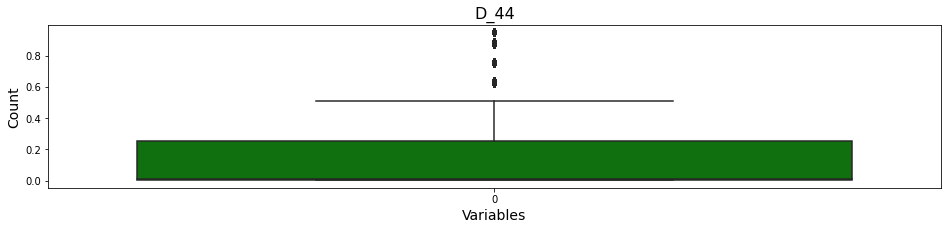

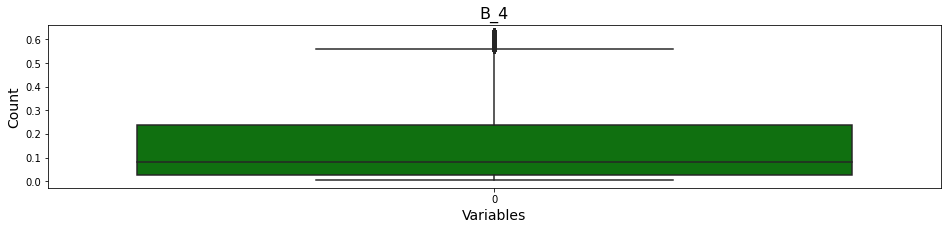

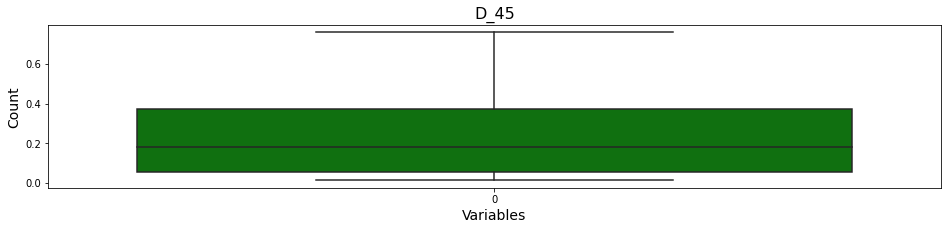

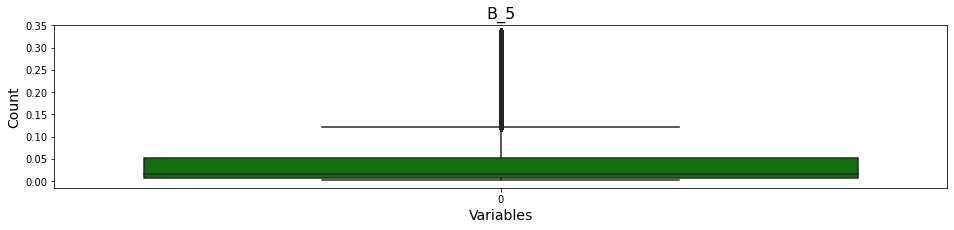

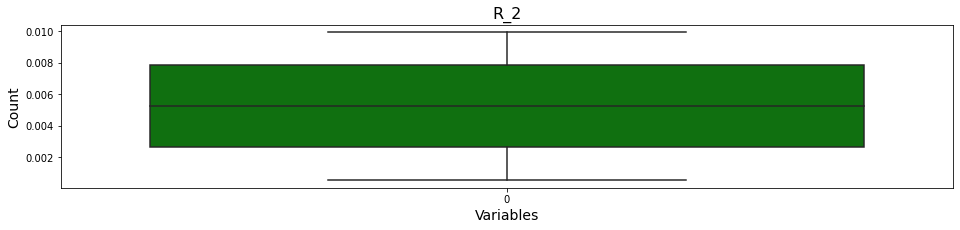

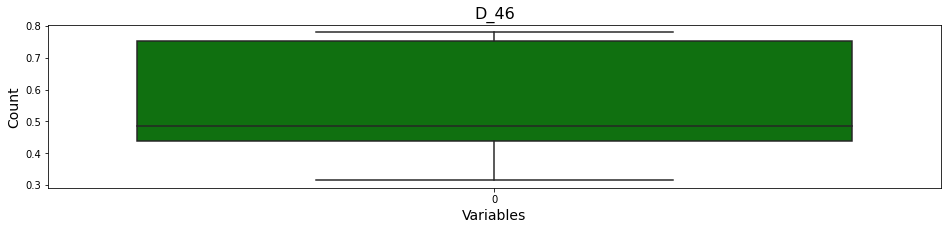

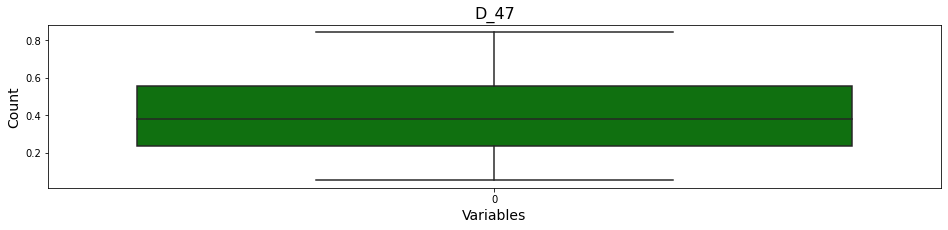

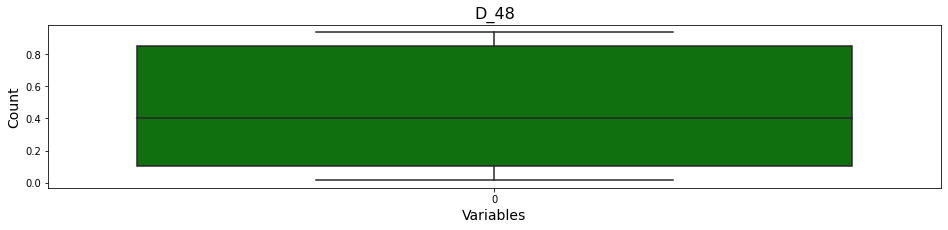

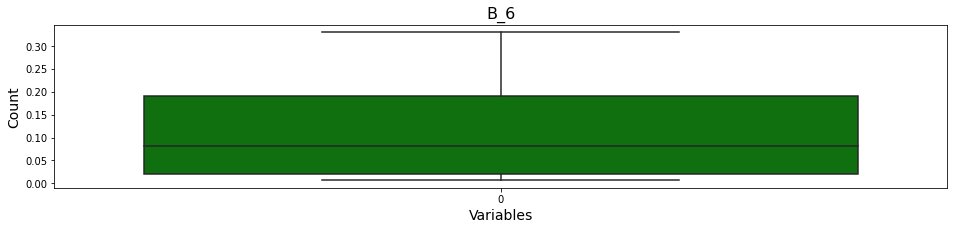

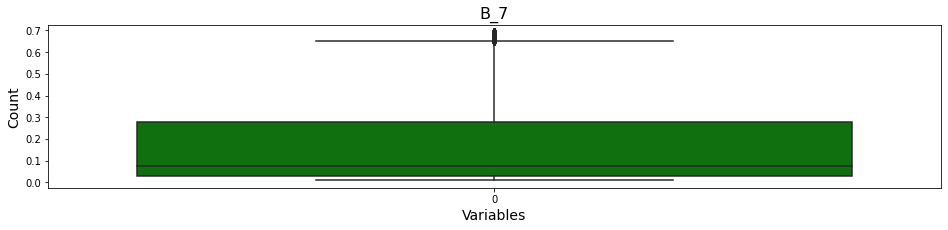

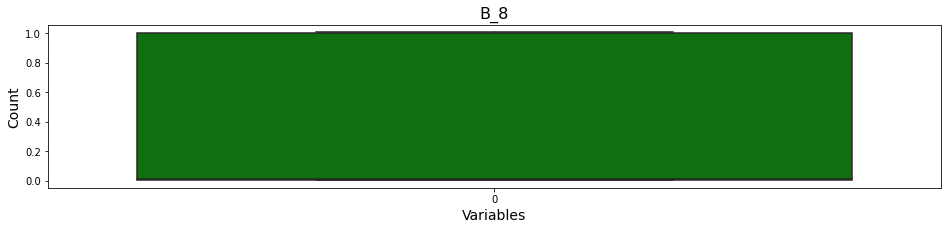

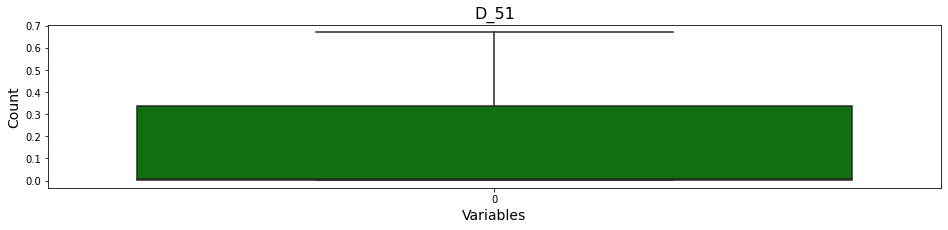

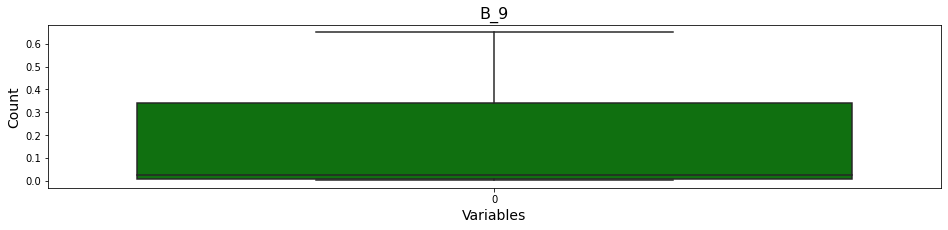

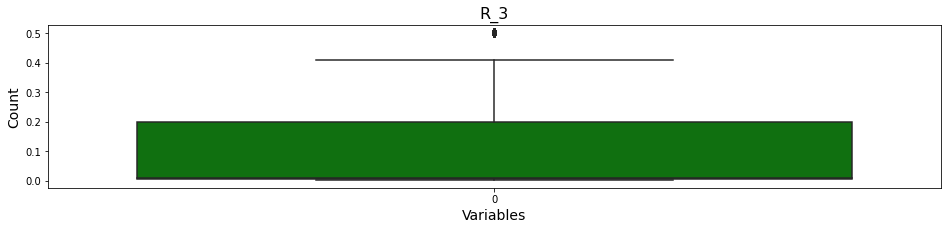

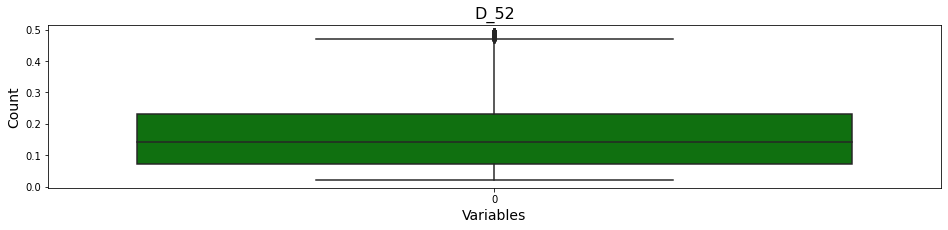

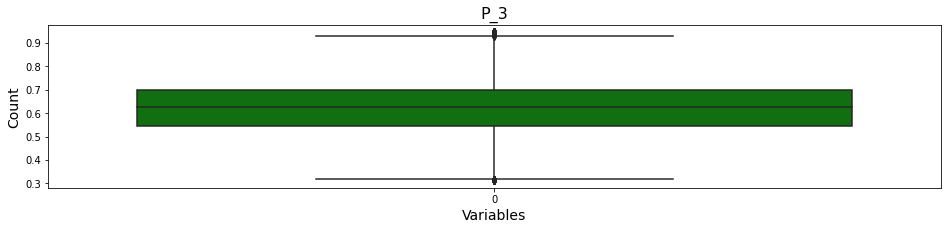

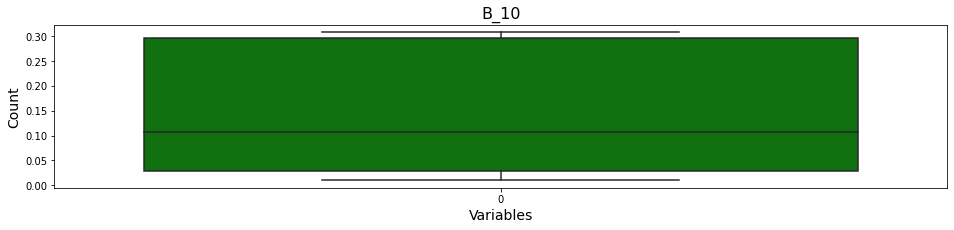

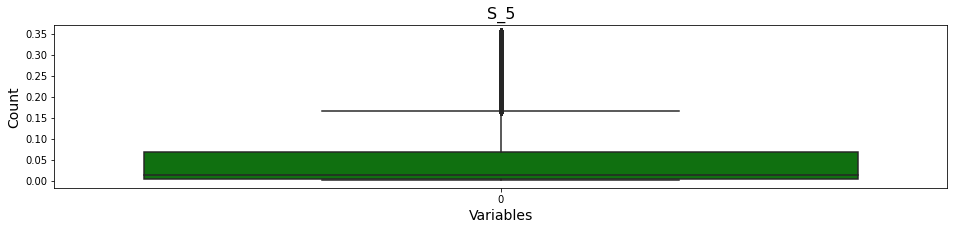

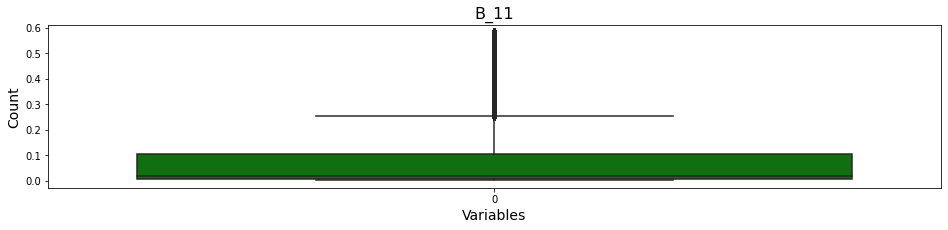

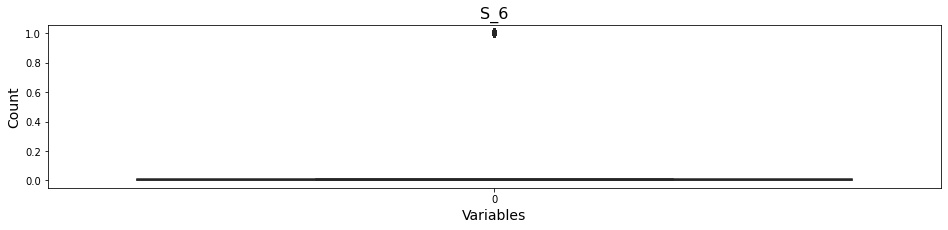

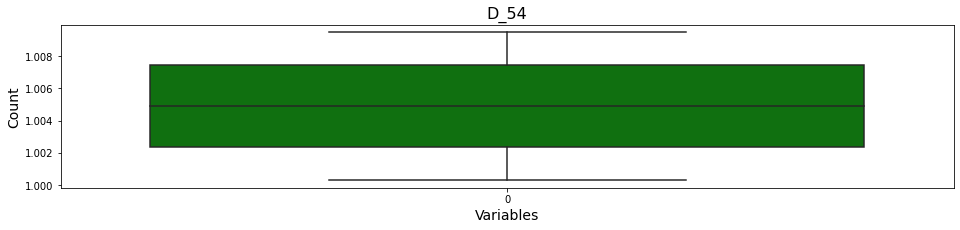

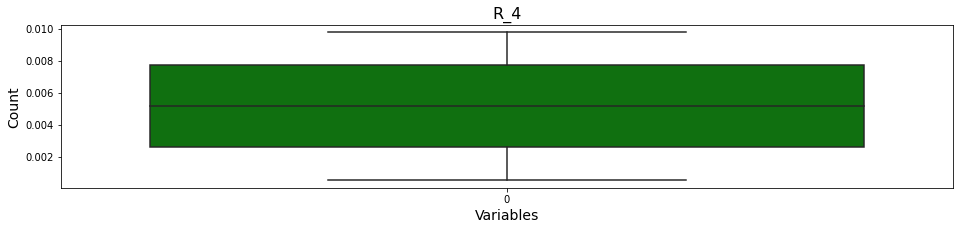

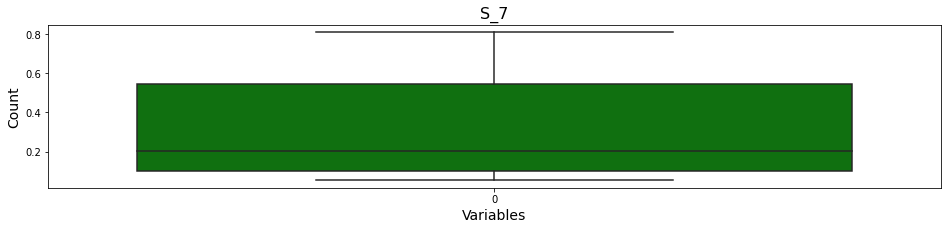

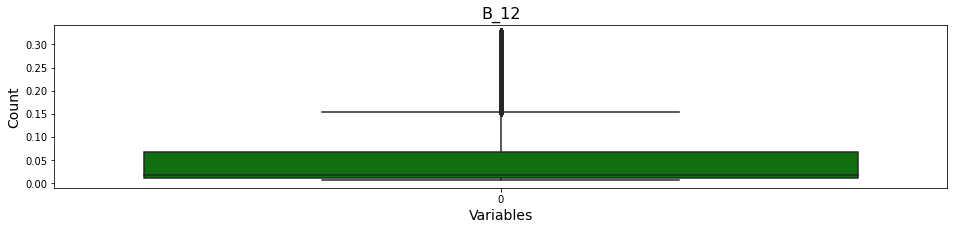

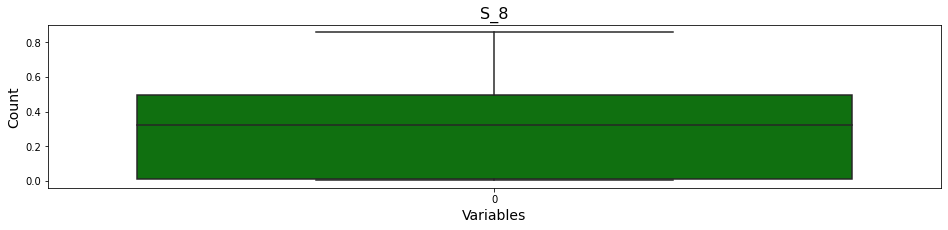

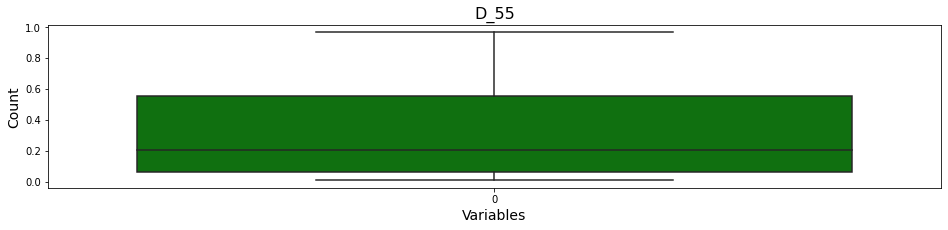

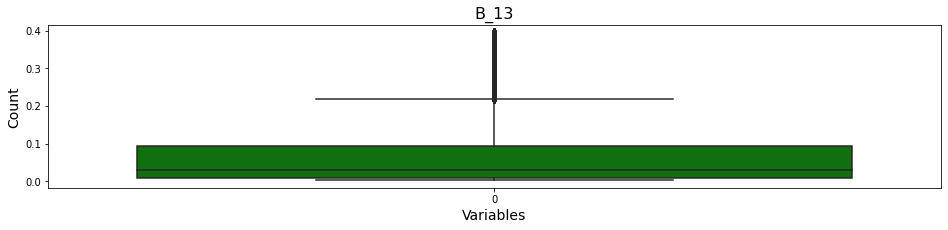

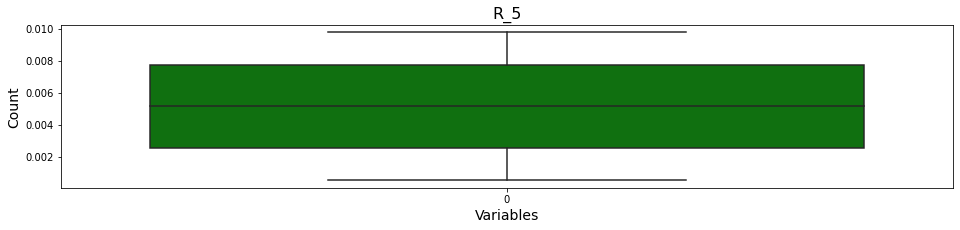

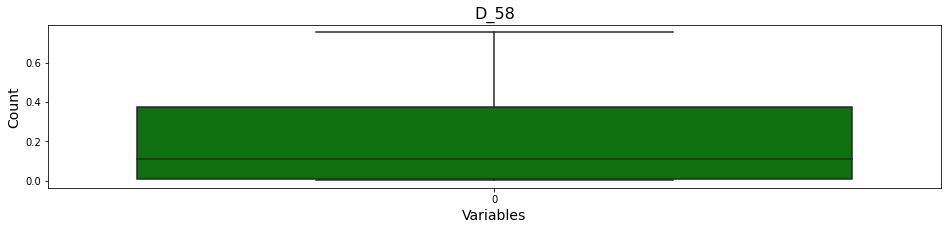

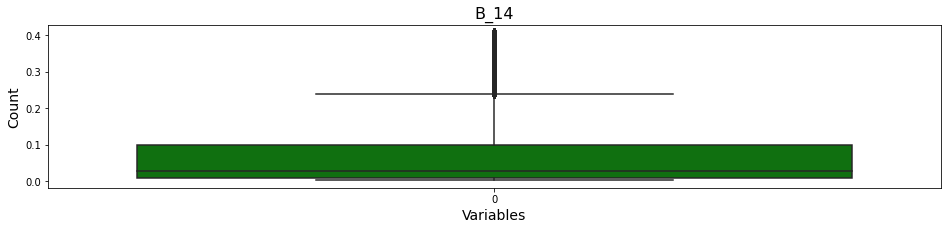

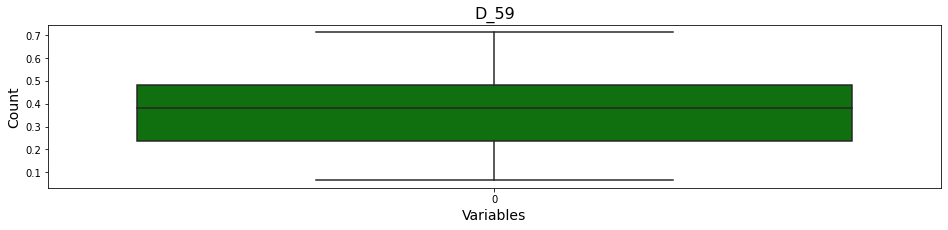

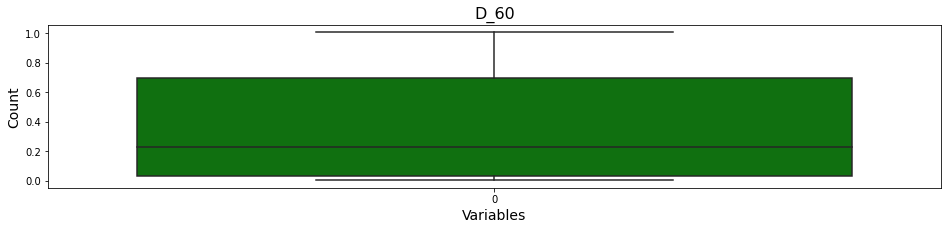

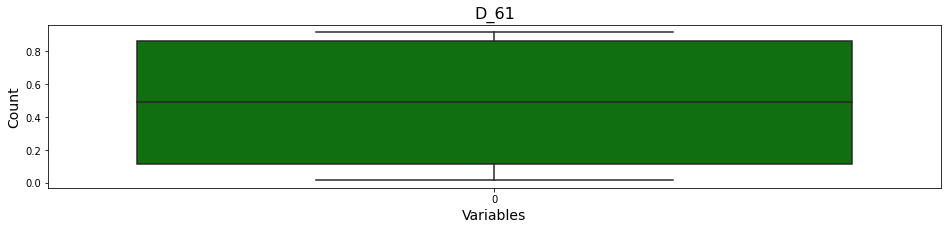

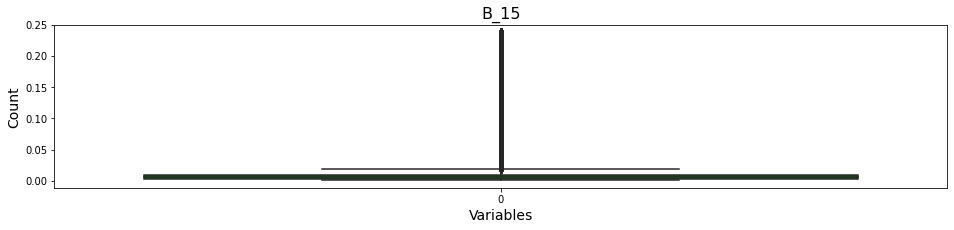

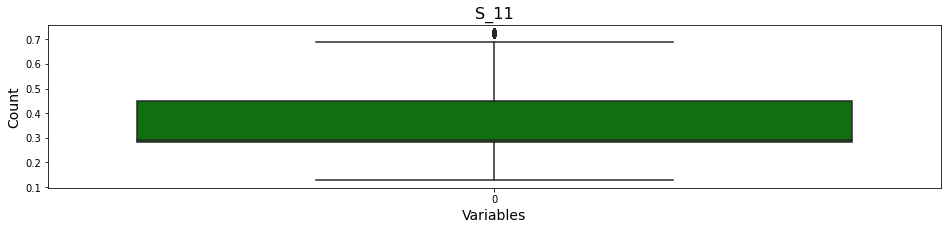

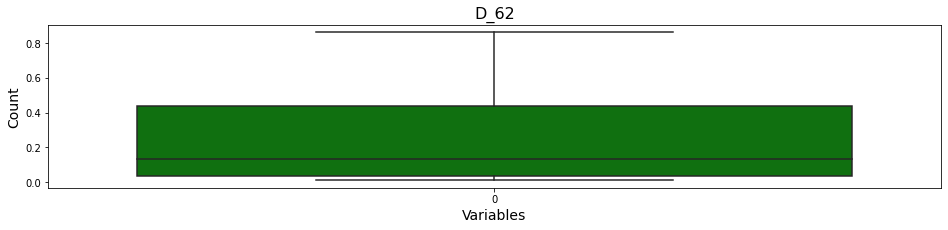

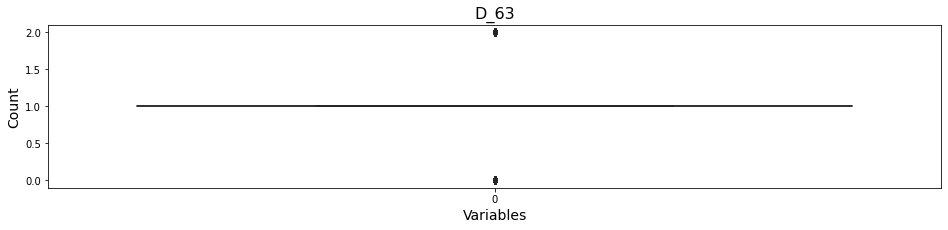

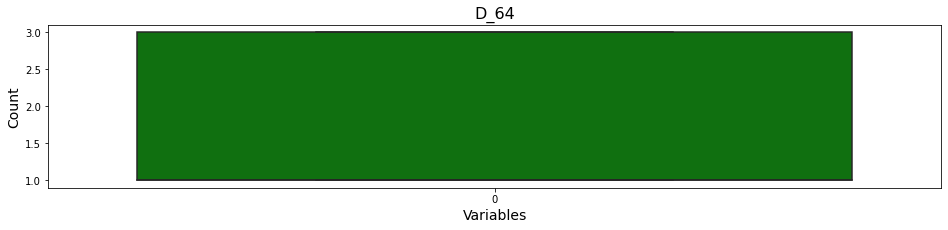

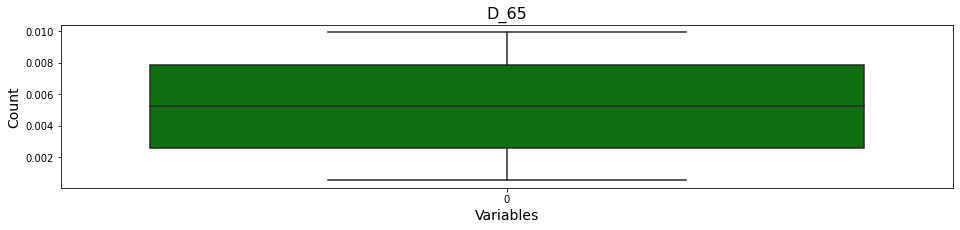

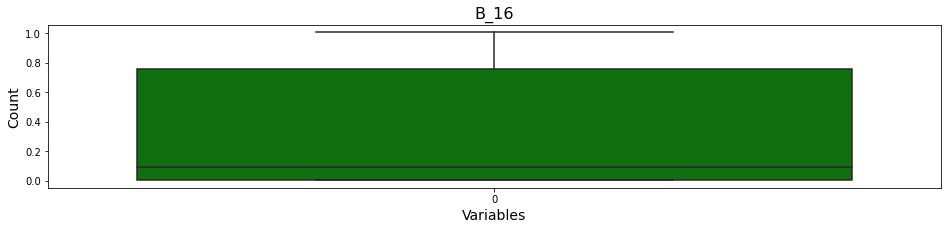

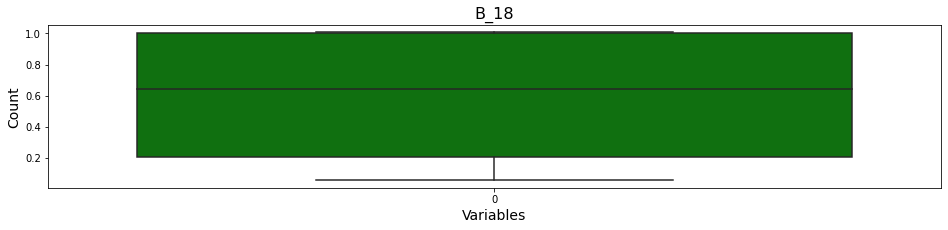

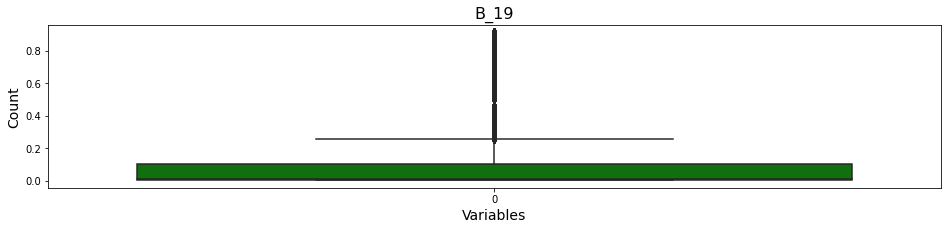

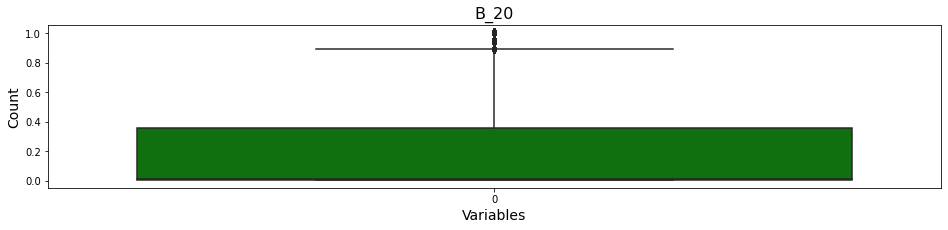

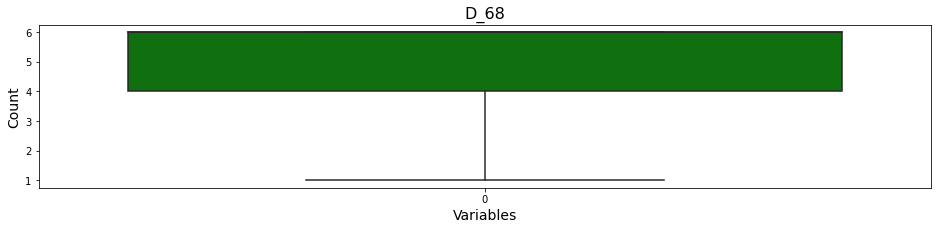

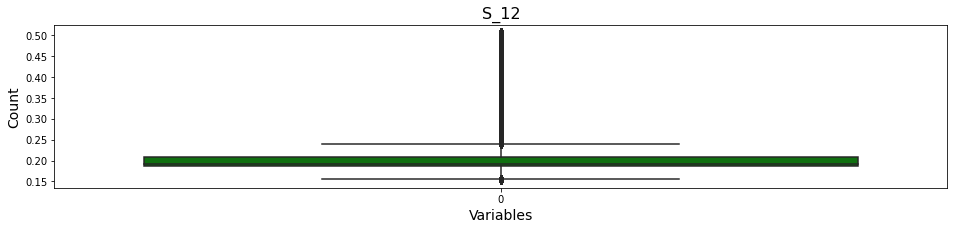

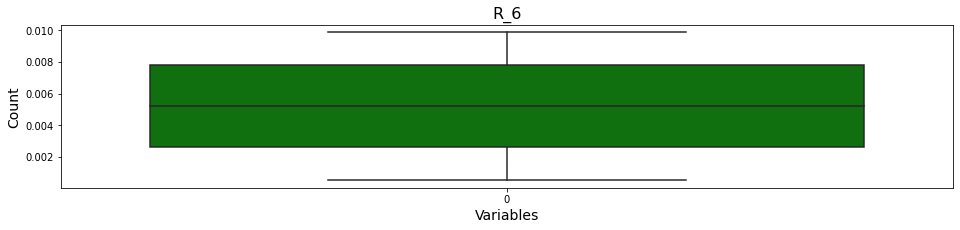

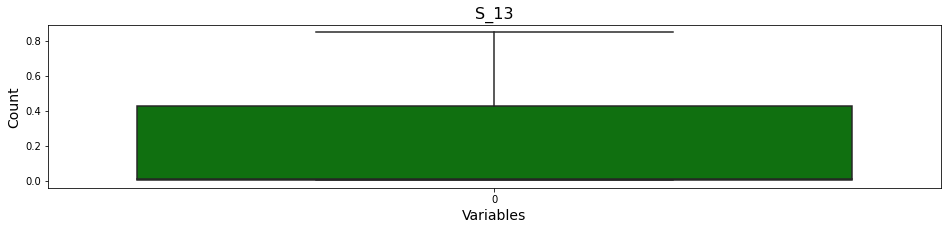

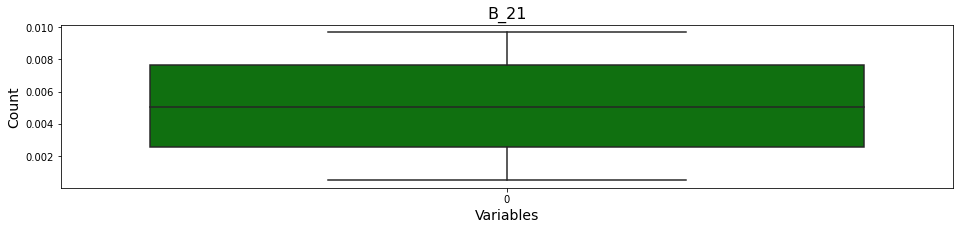

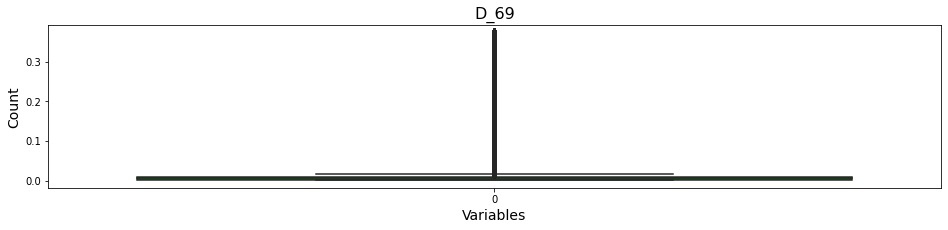

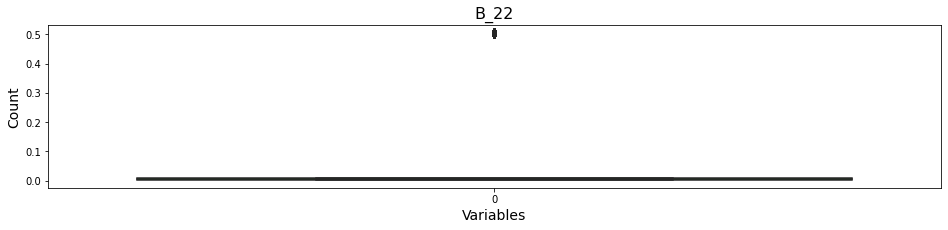

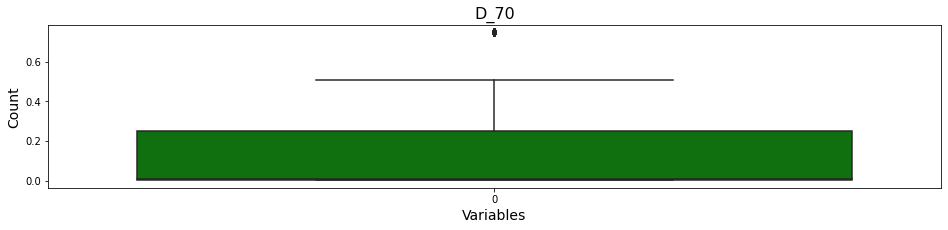

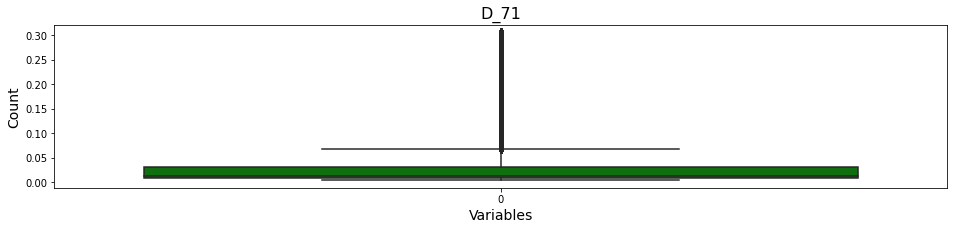

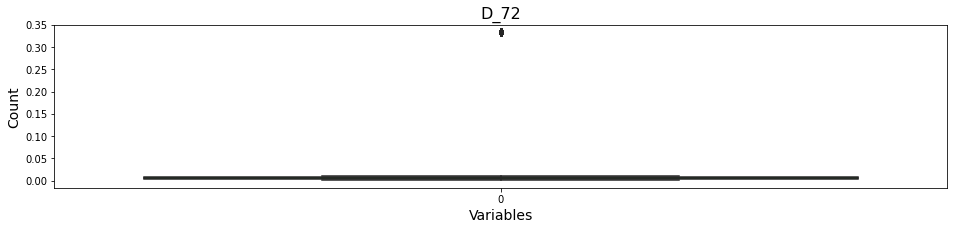

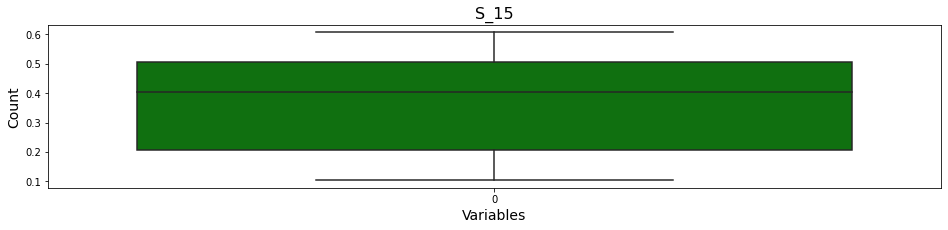

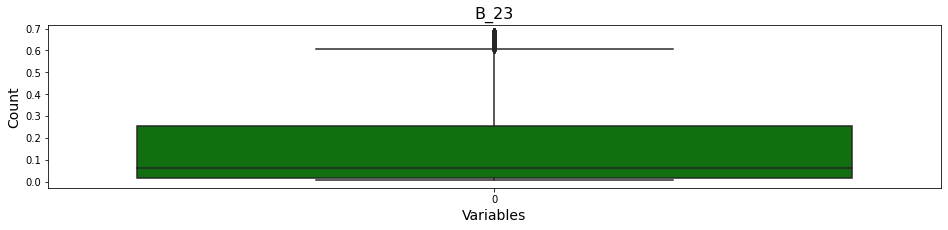

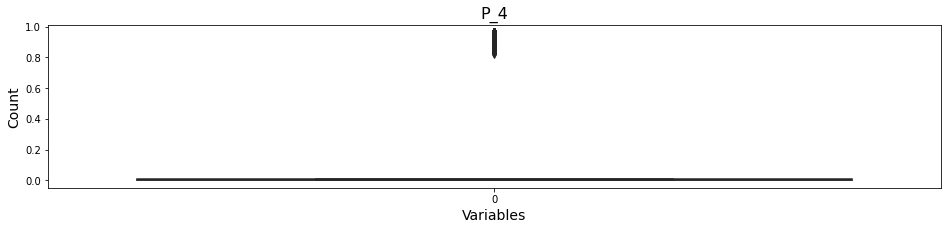

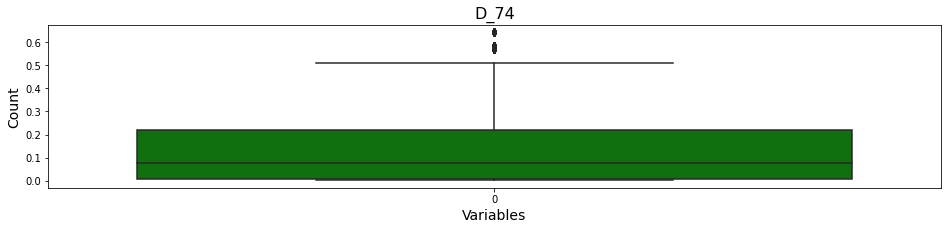

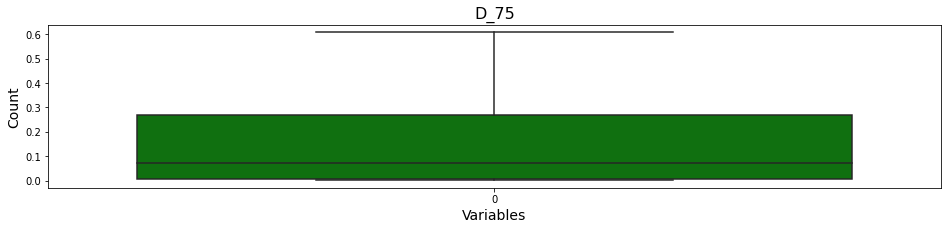

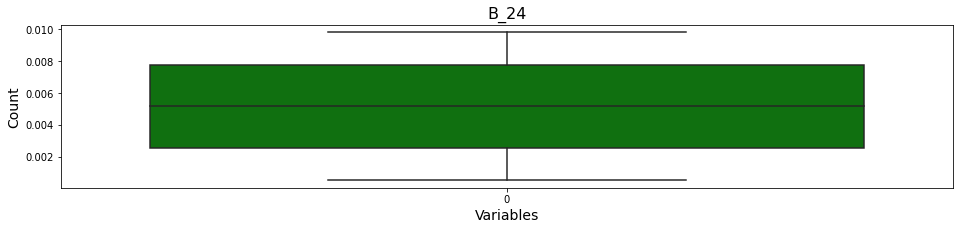

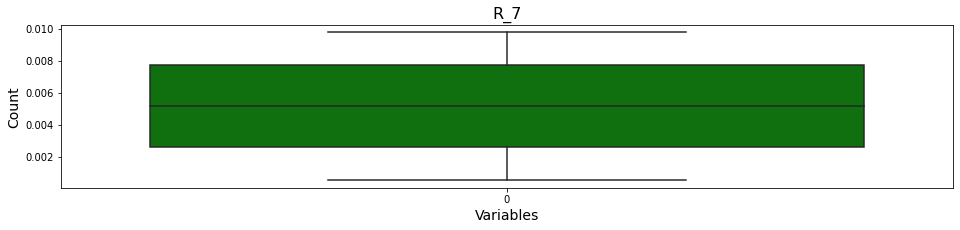

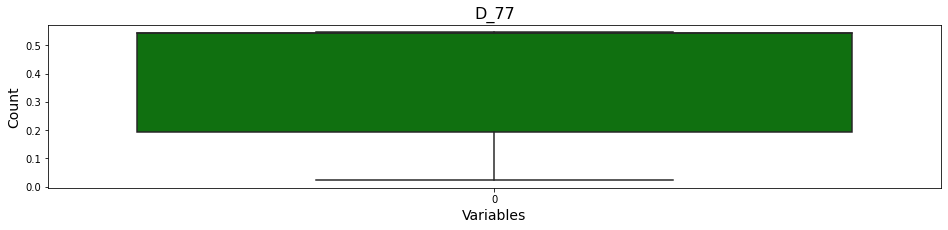

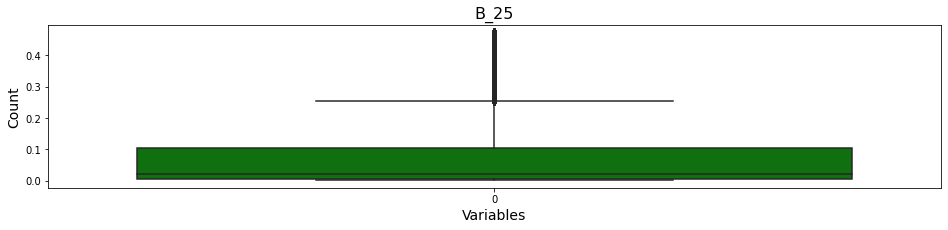

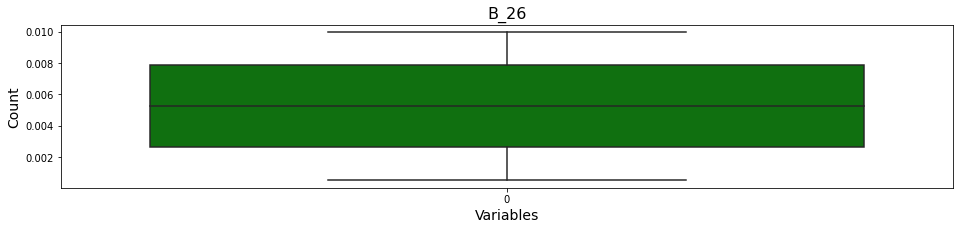

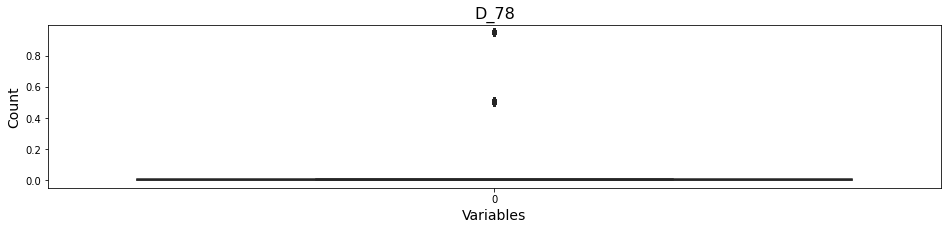

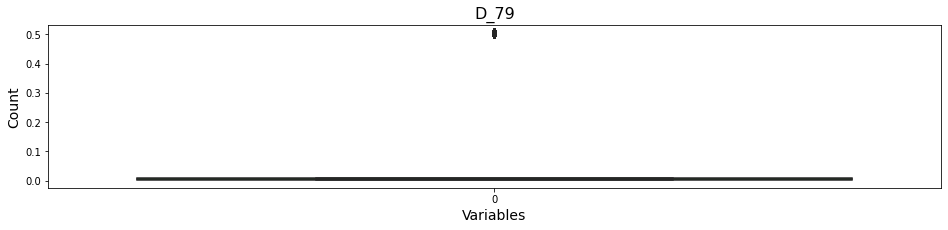

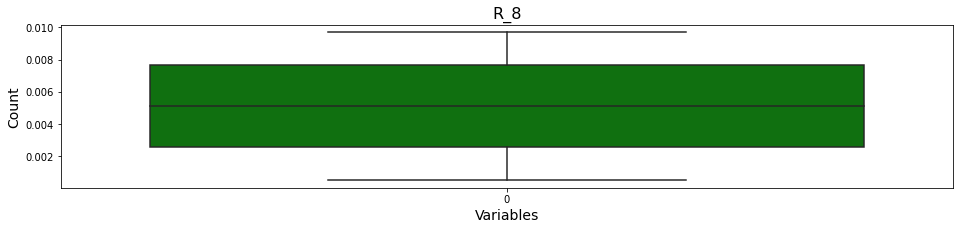

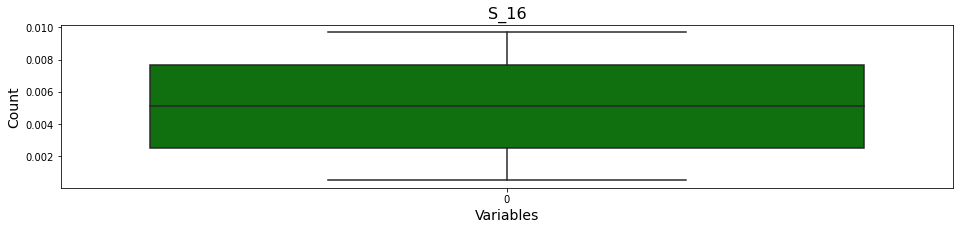

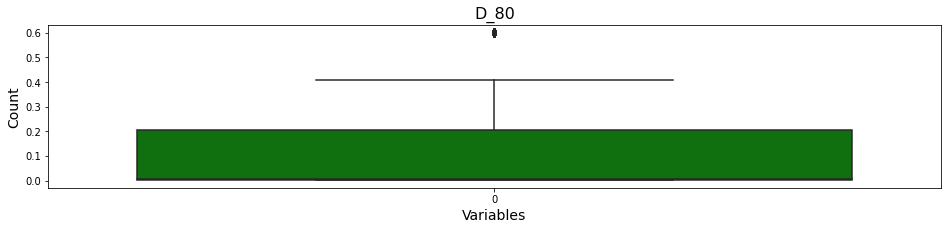

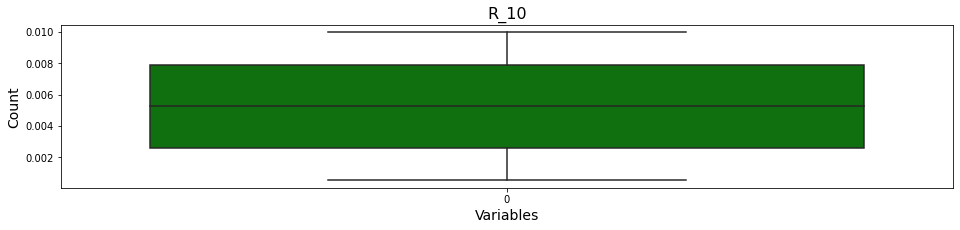

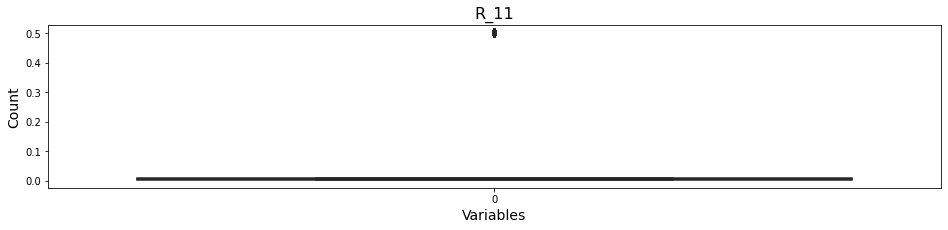

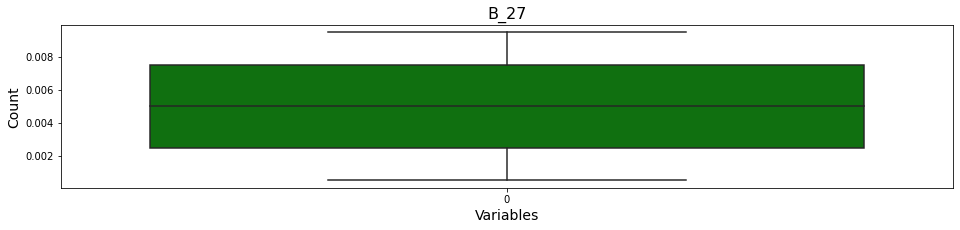

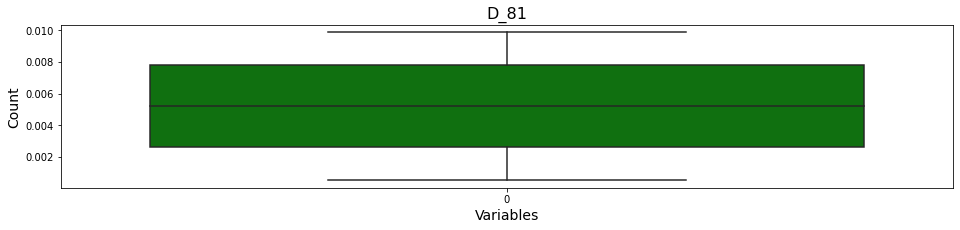

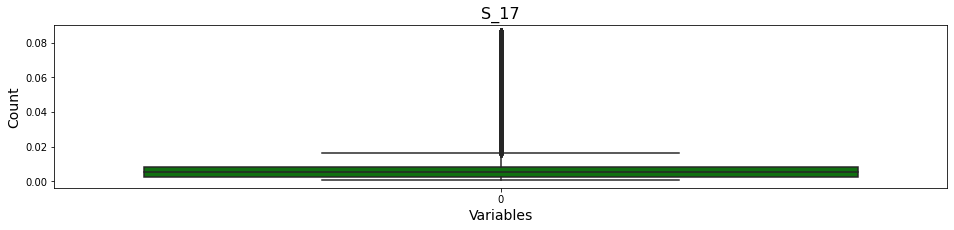

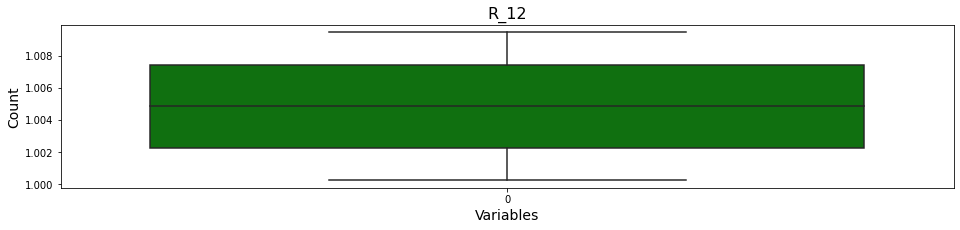

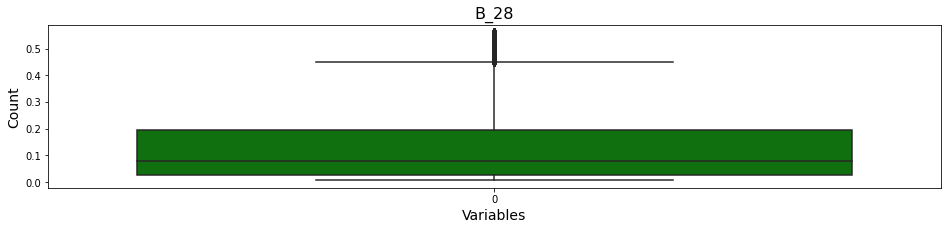

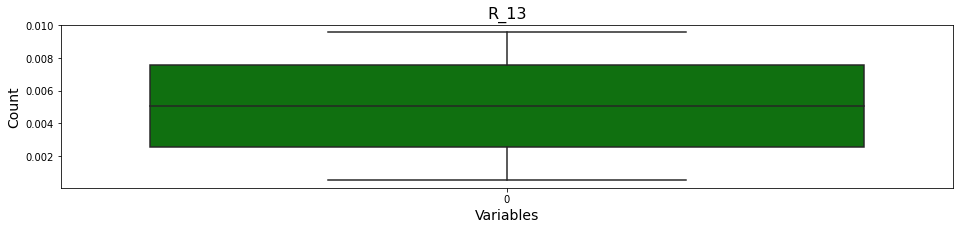

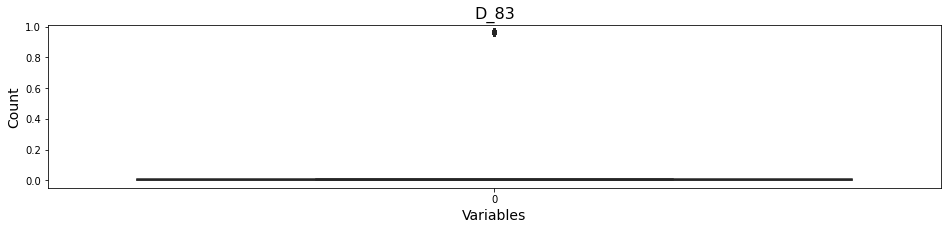

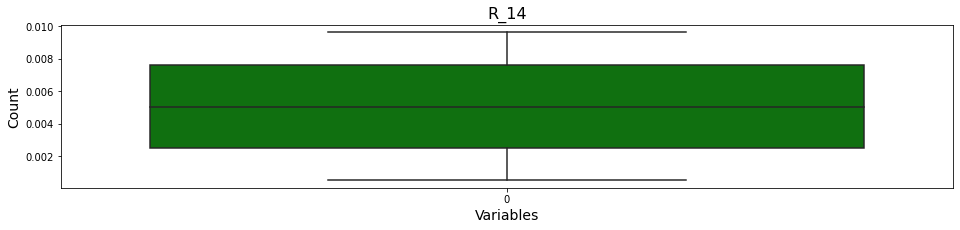

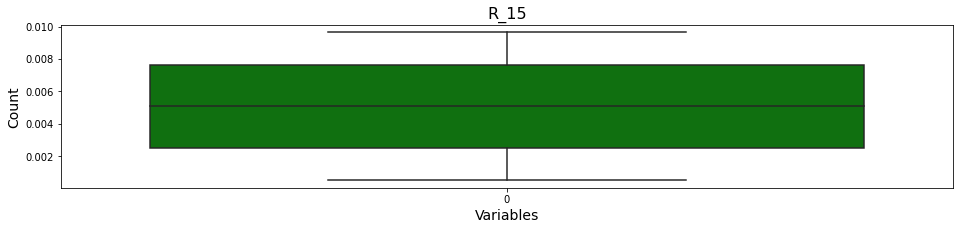

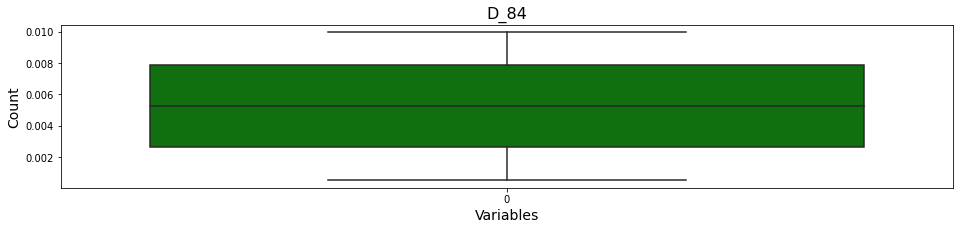

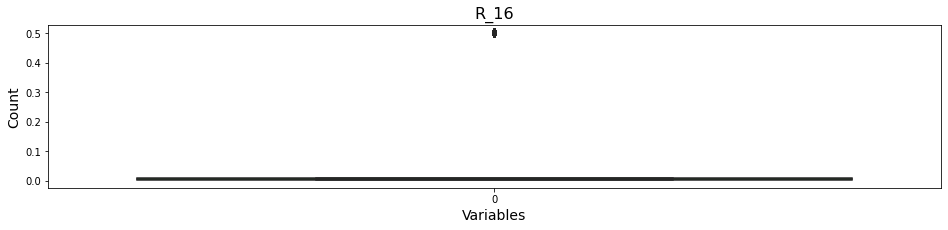

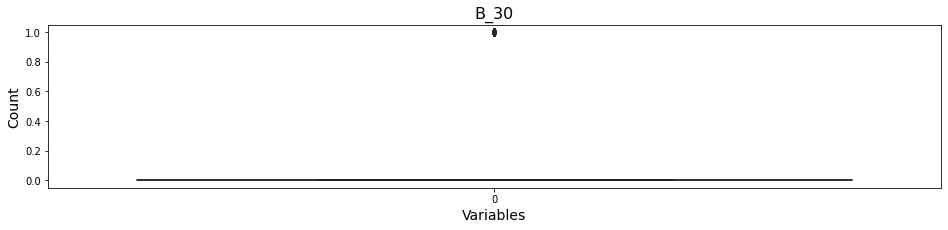

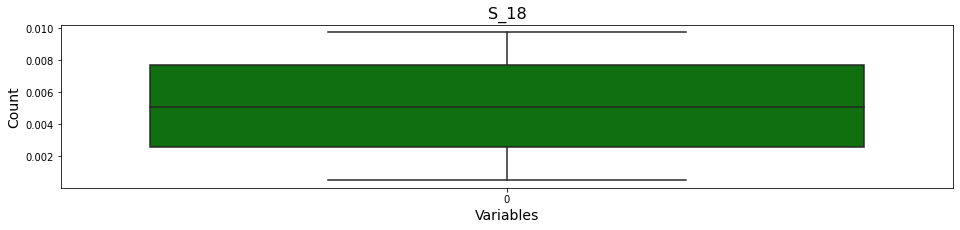

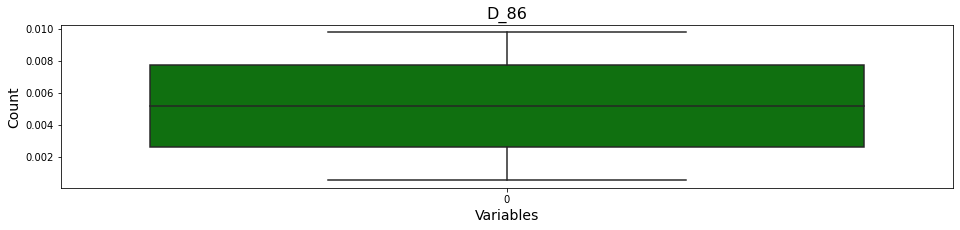

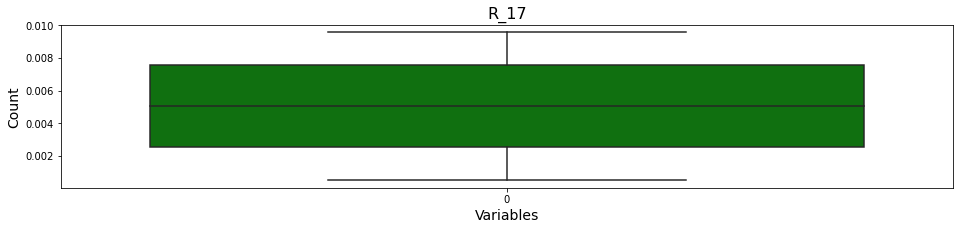

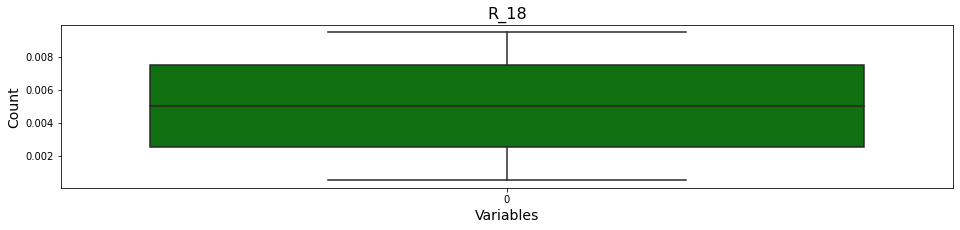

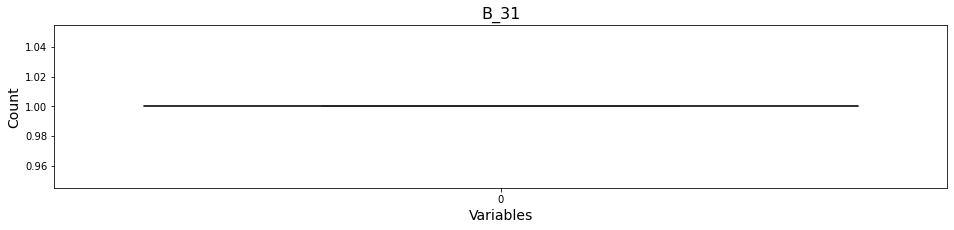

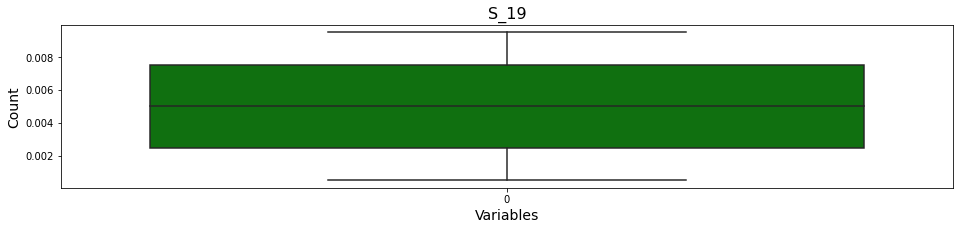

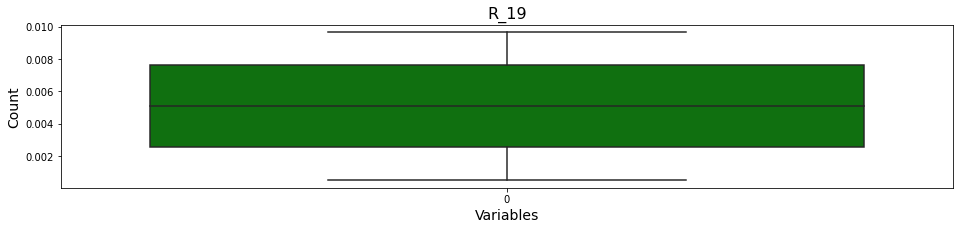

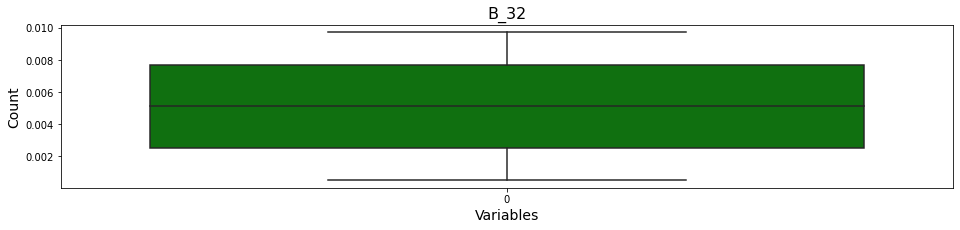

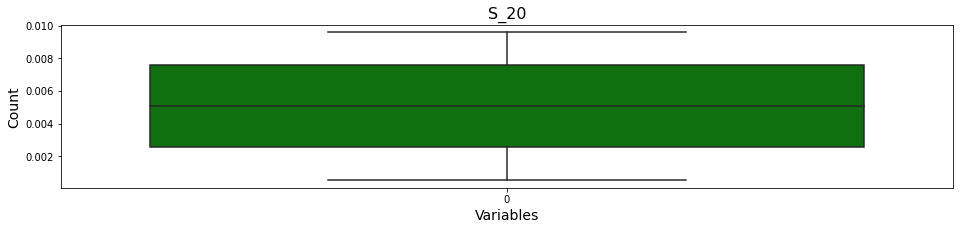

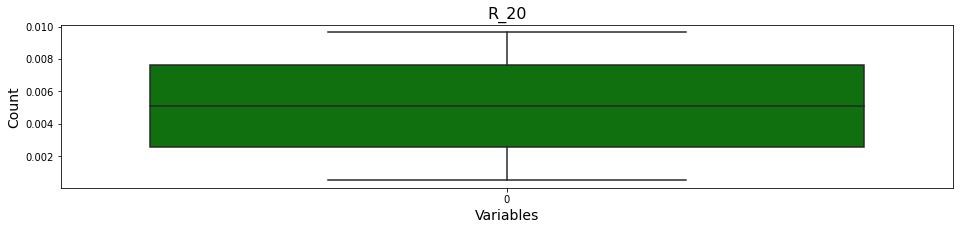

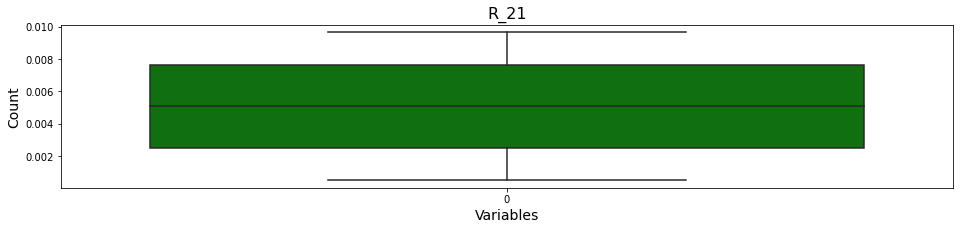

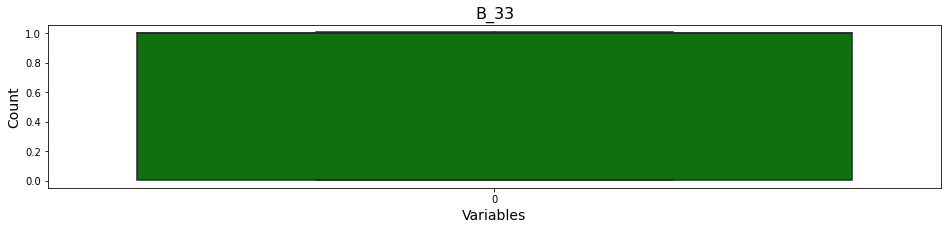

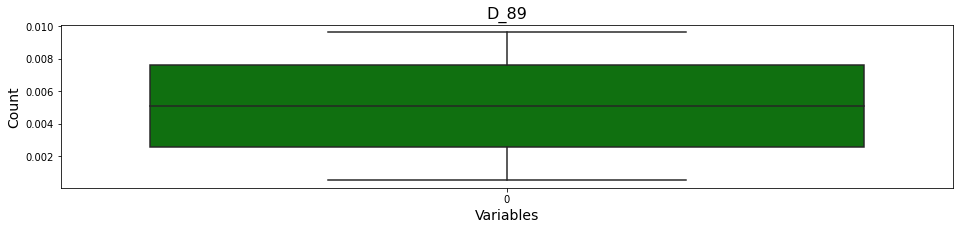

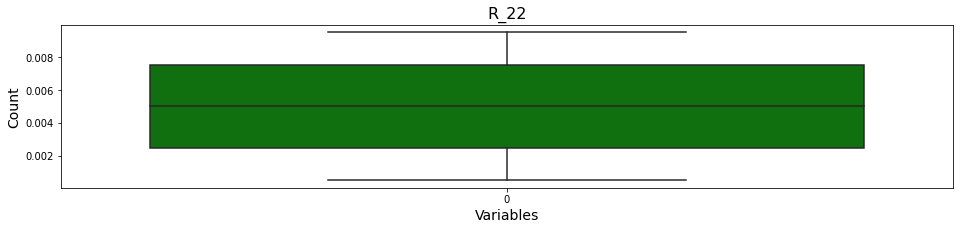

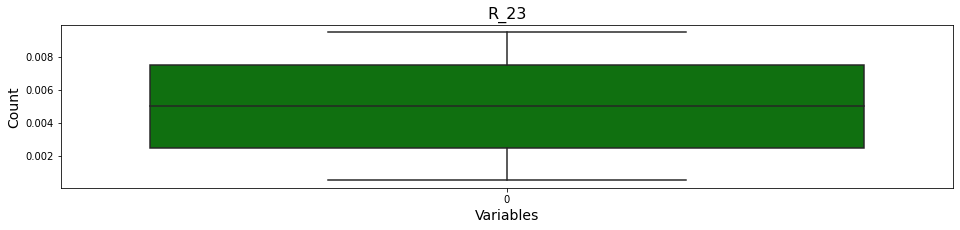

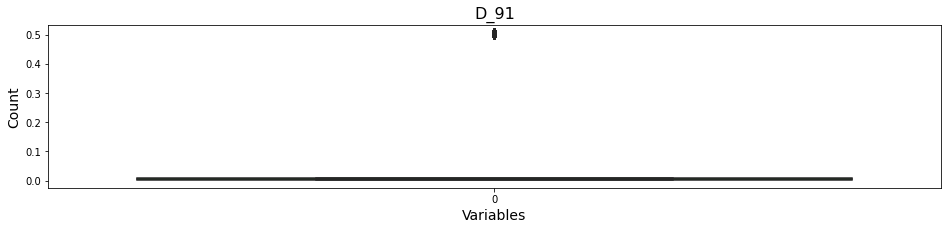

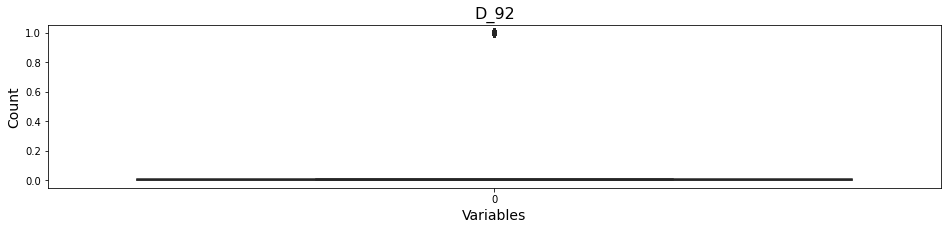

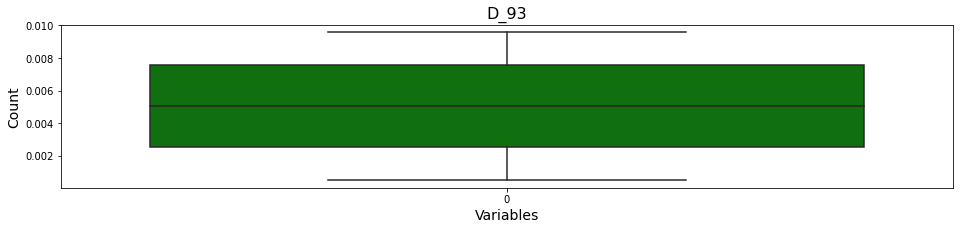

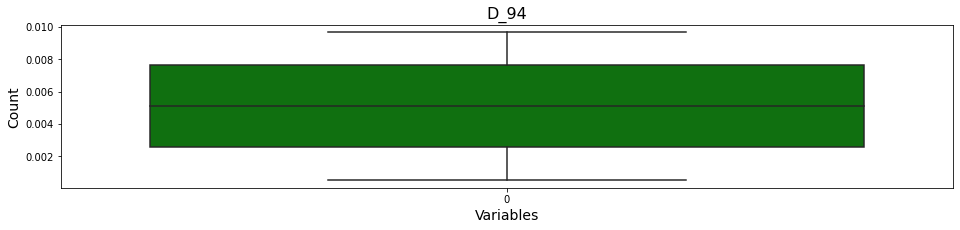

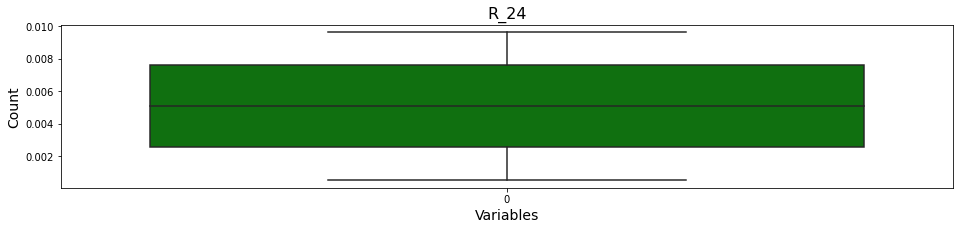

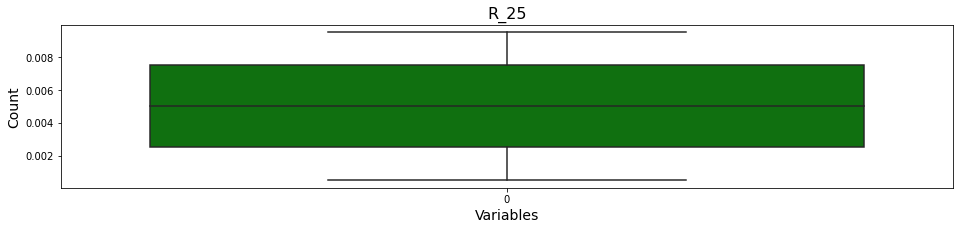

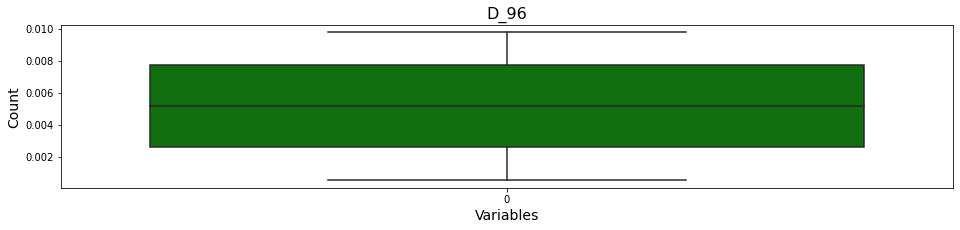

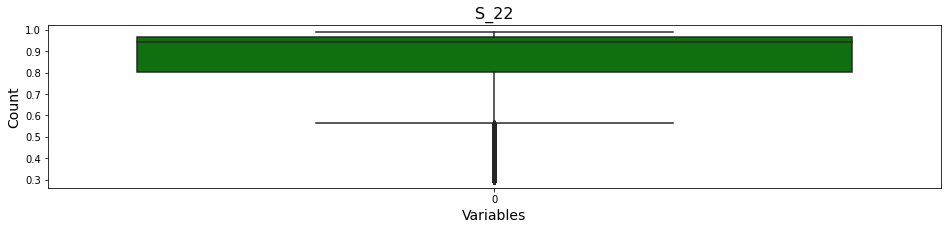

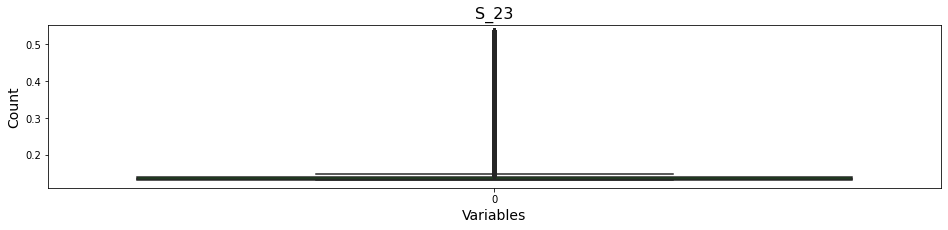

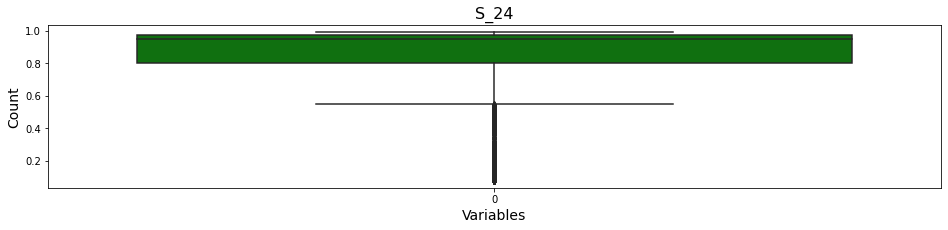

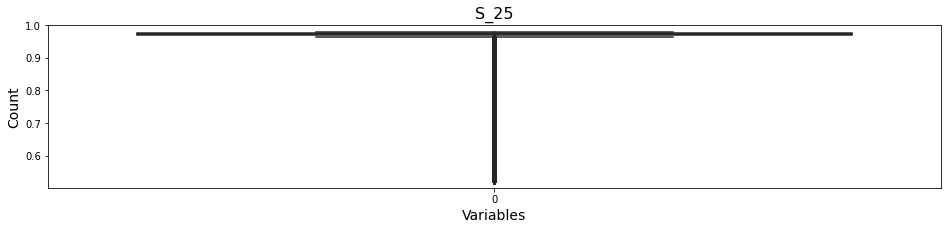

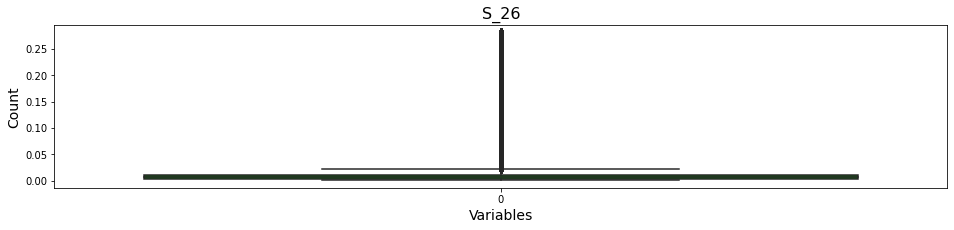

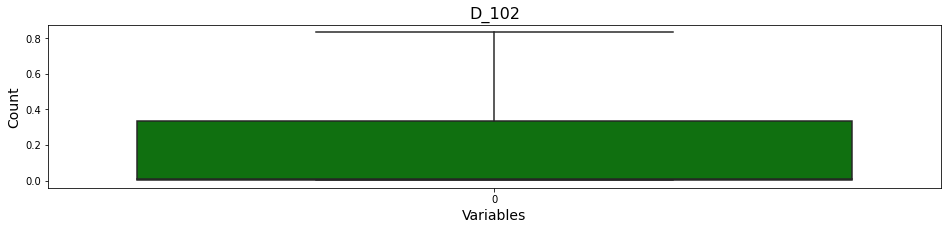

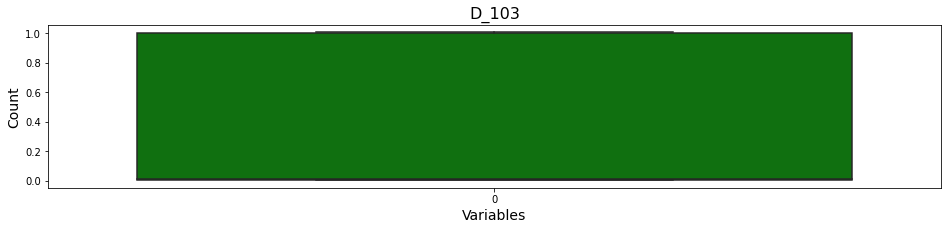

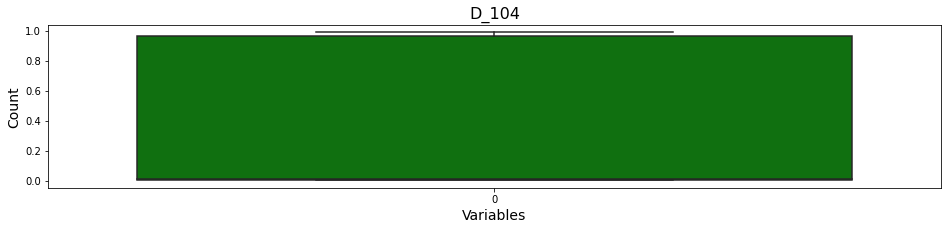

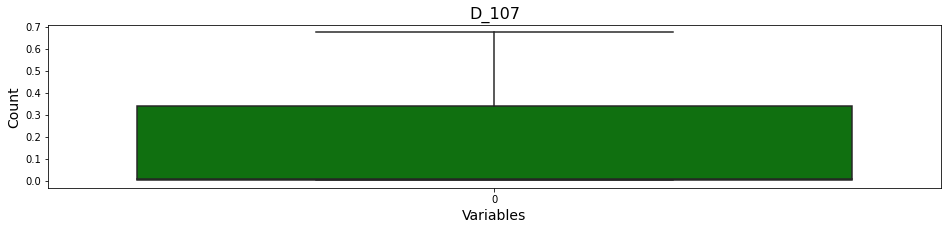

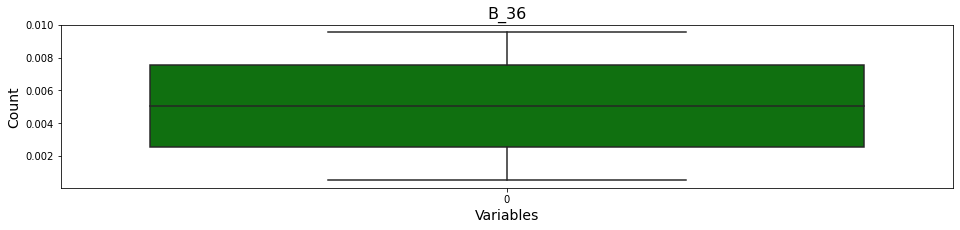

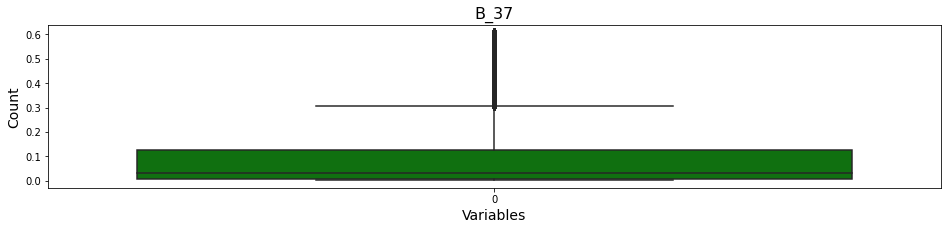

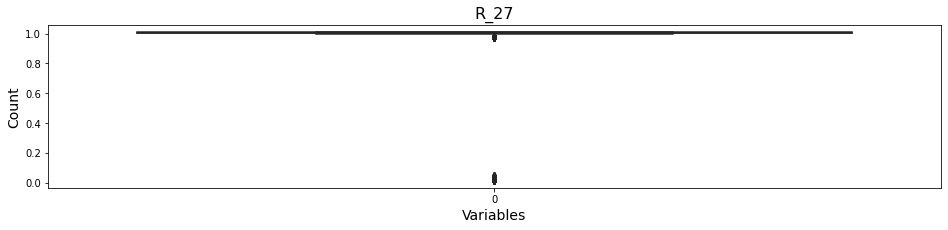

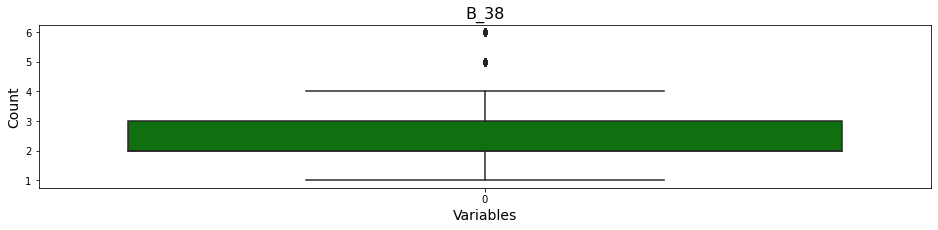

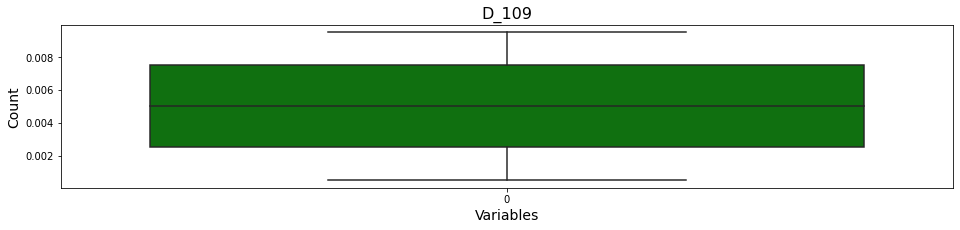

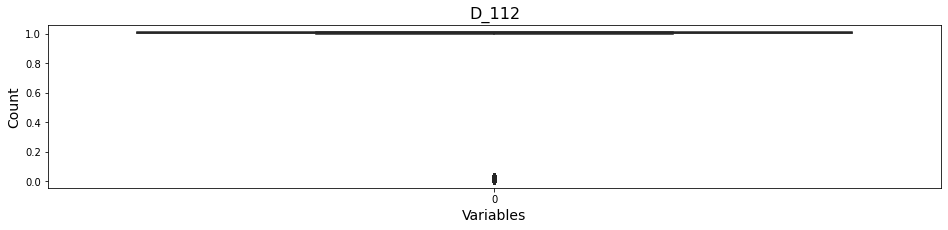

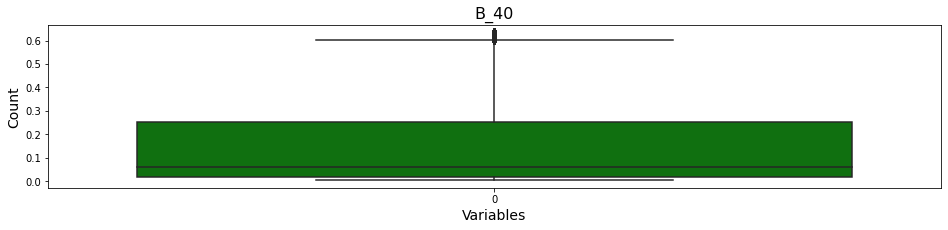

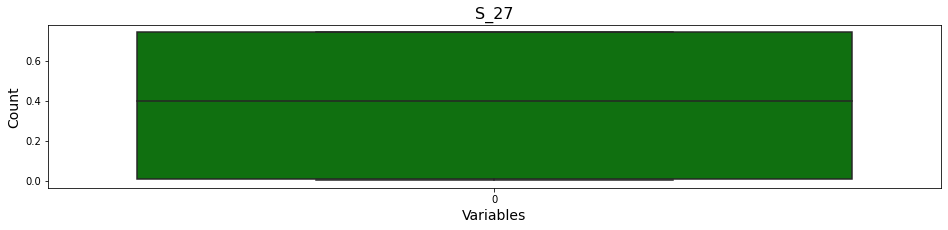

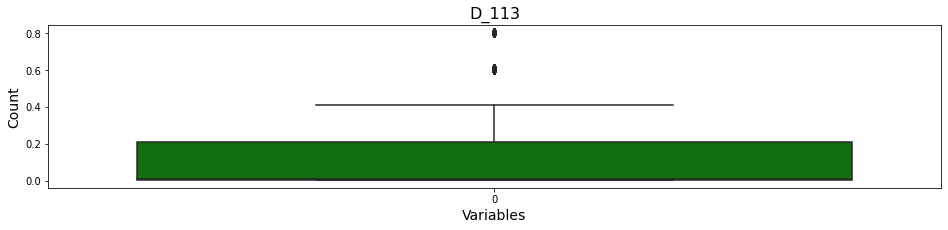

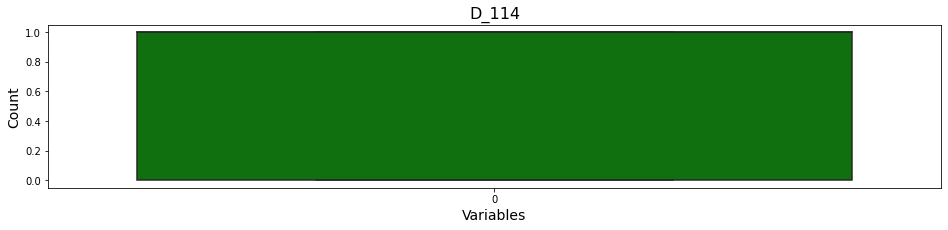

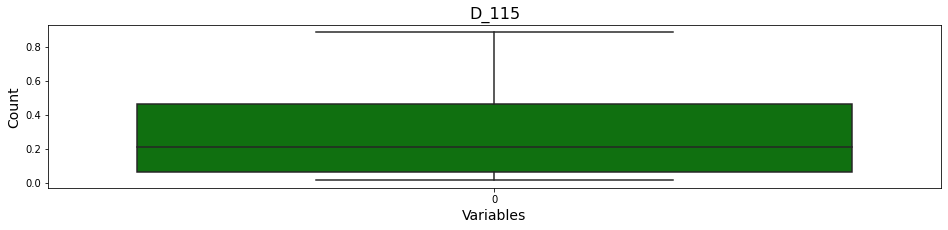

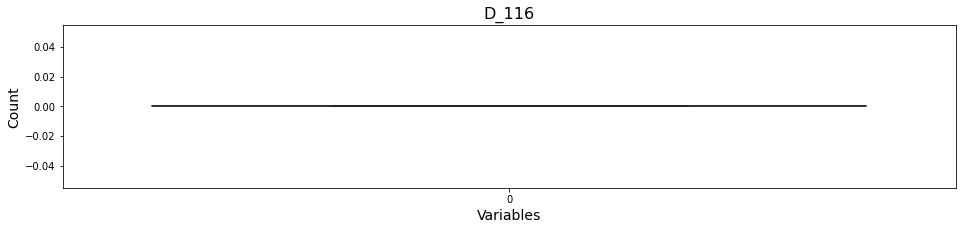

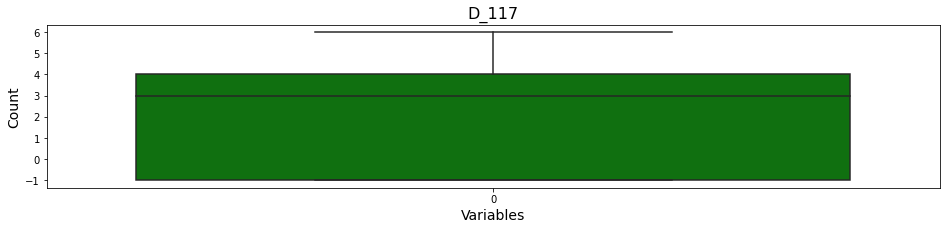

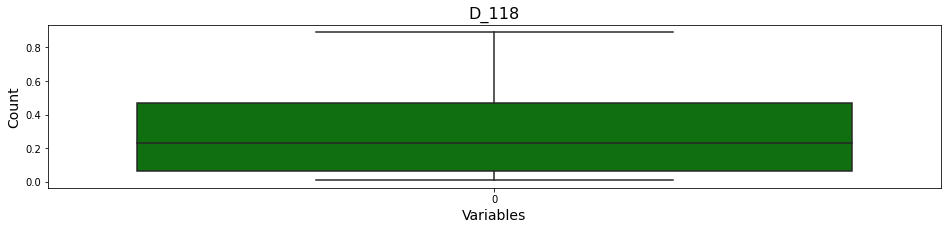

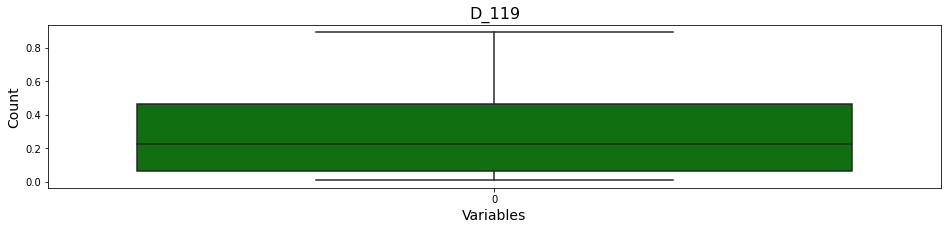

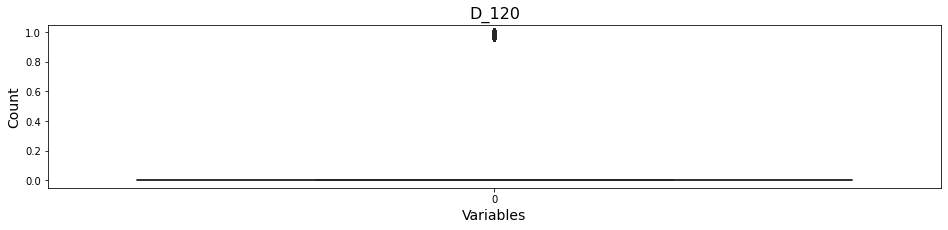

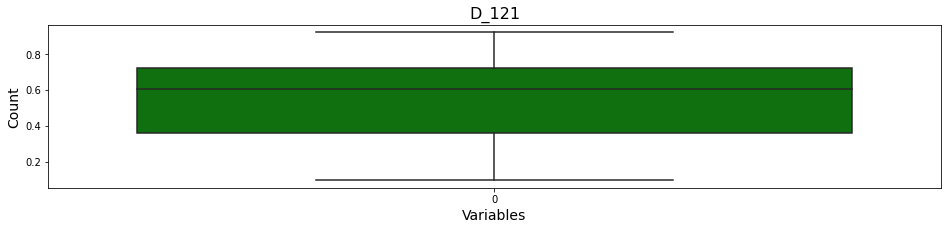

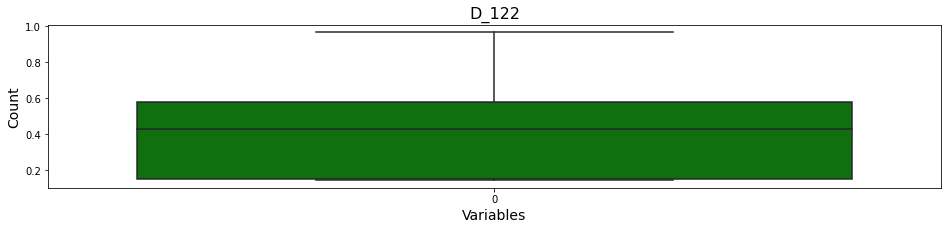

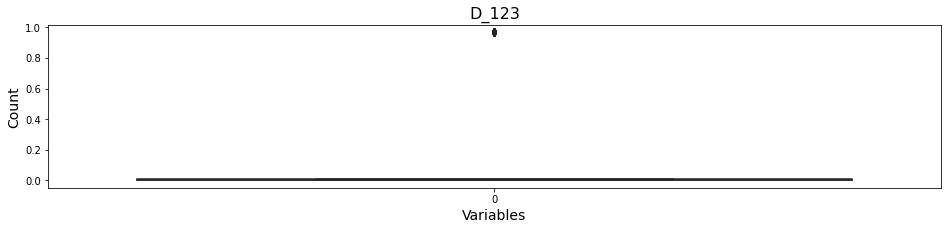

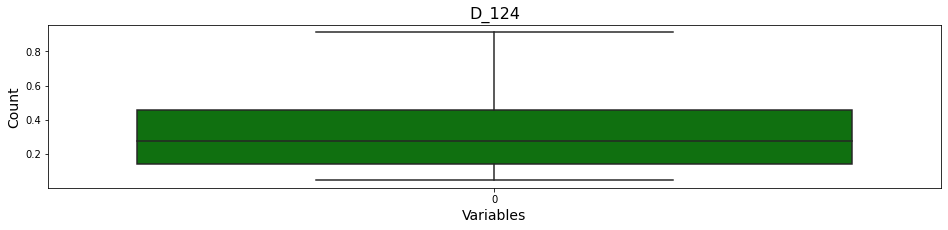

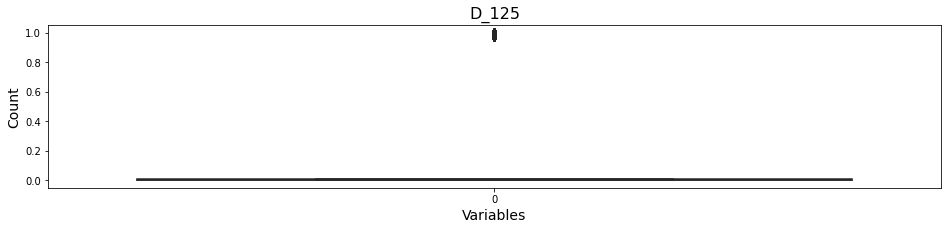

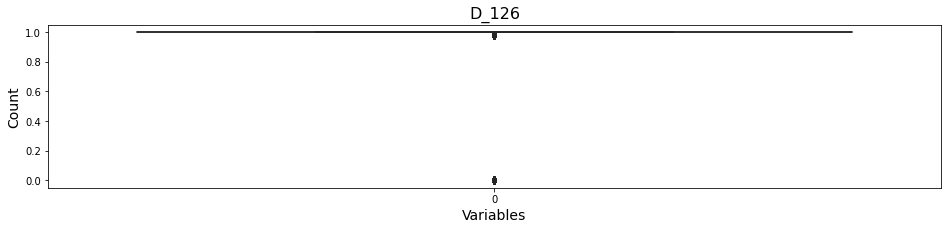

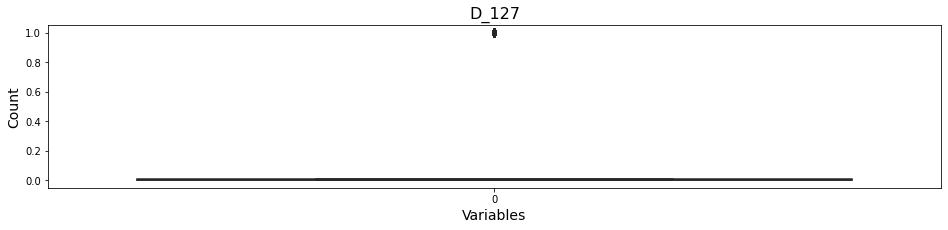

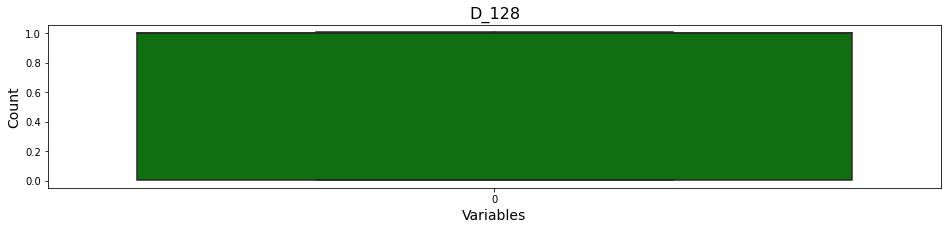

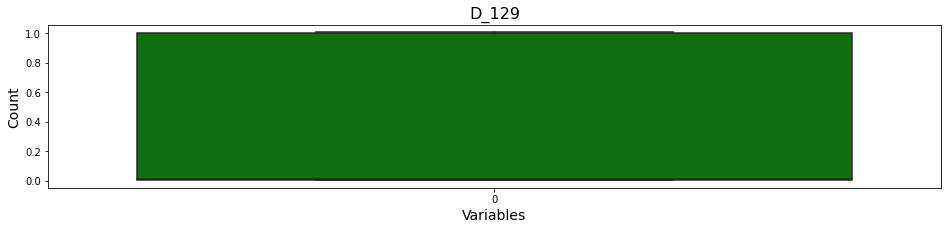

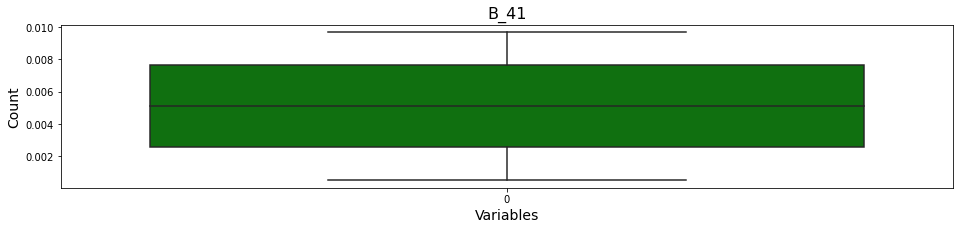

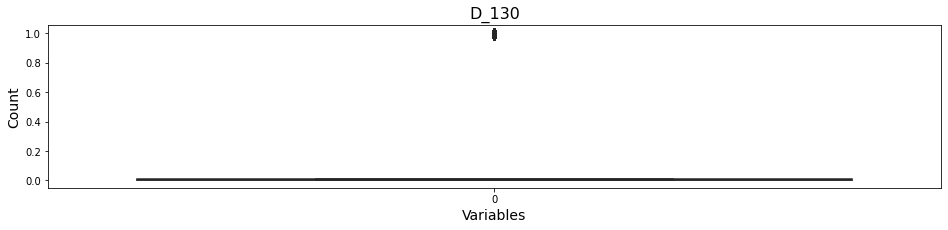

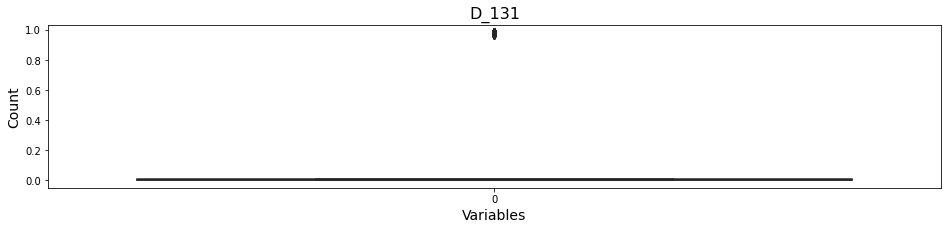

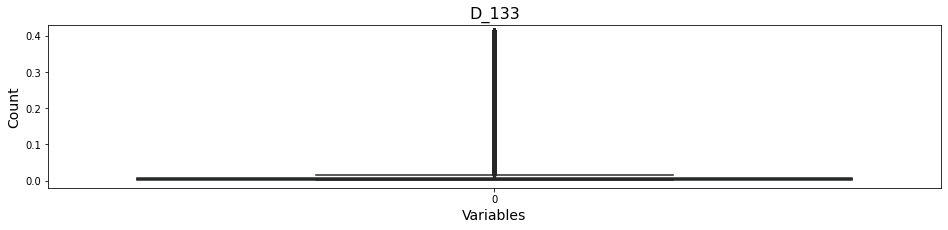

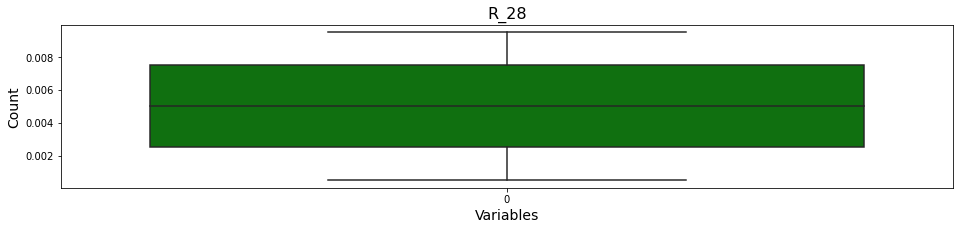

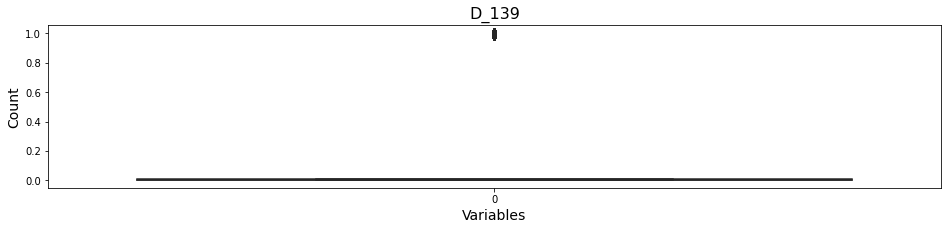

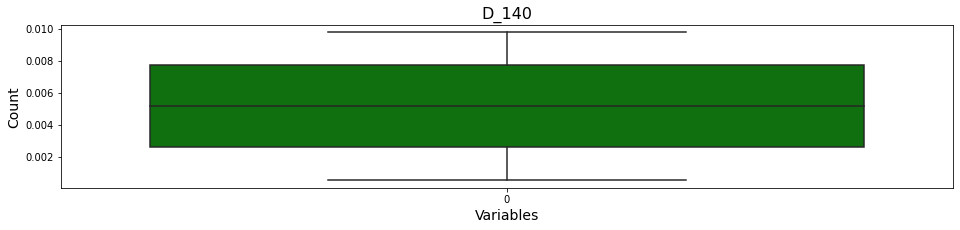

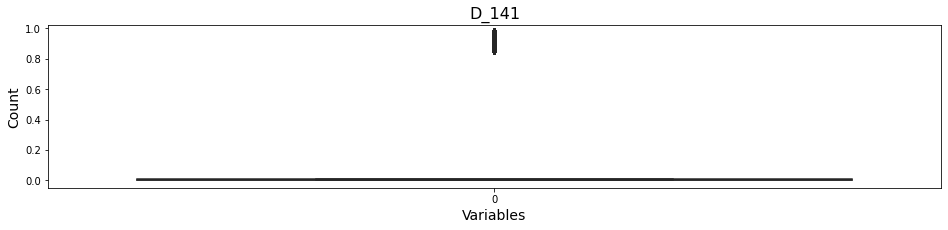

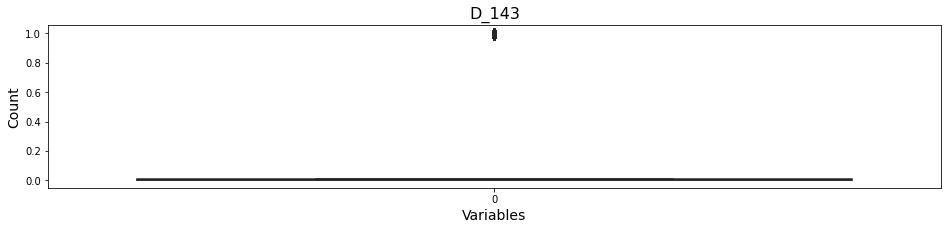

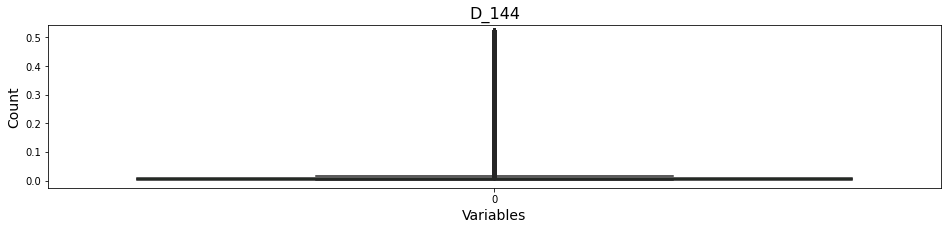

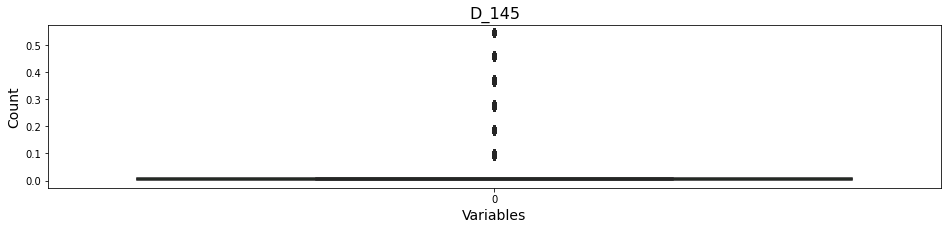

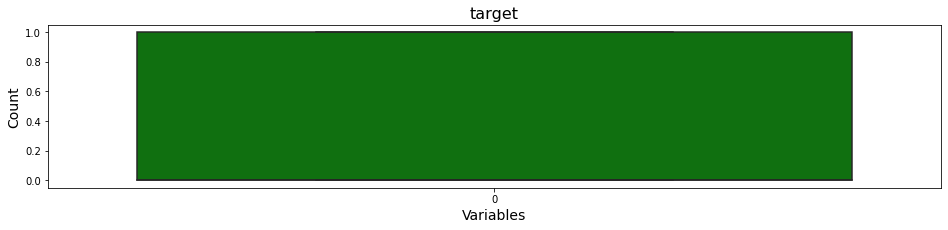

In [39]:
#Detecting Outier
for col in list(df_1.select_dtypes(['float64','int64']).columns):
    #boxplot
    plt.figure(figsize=(16,3))
    sns.boxplot(data=df_1[col],color="Green")
    #labeling
    plt.title(col, fontsize=16) #plot TITLE
    plt.xlabel("Variables", fontsize=14) #x-axis label
    plt.ylabel("Count", fontsize=14) #y-axis label

<AxesSubplot:>

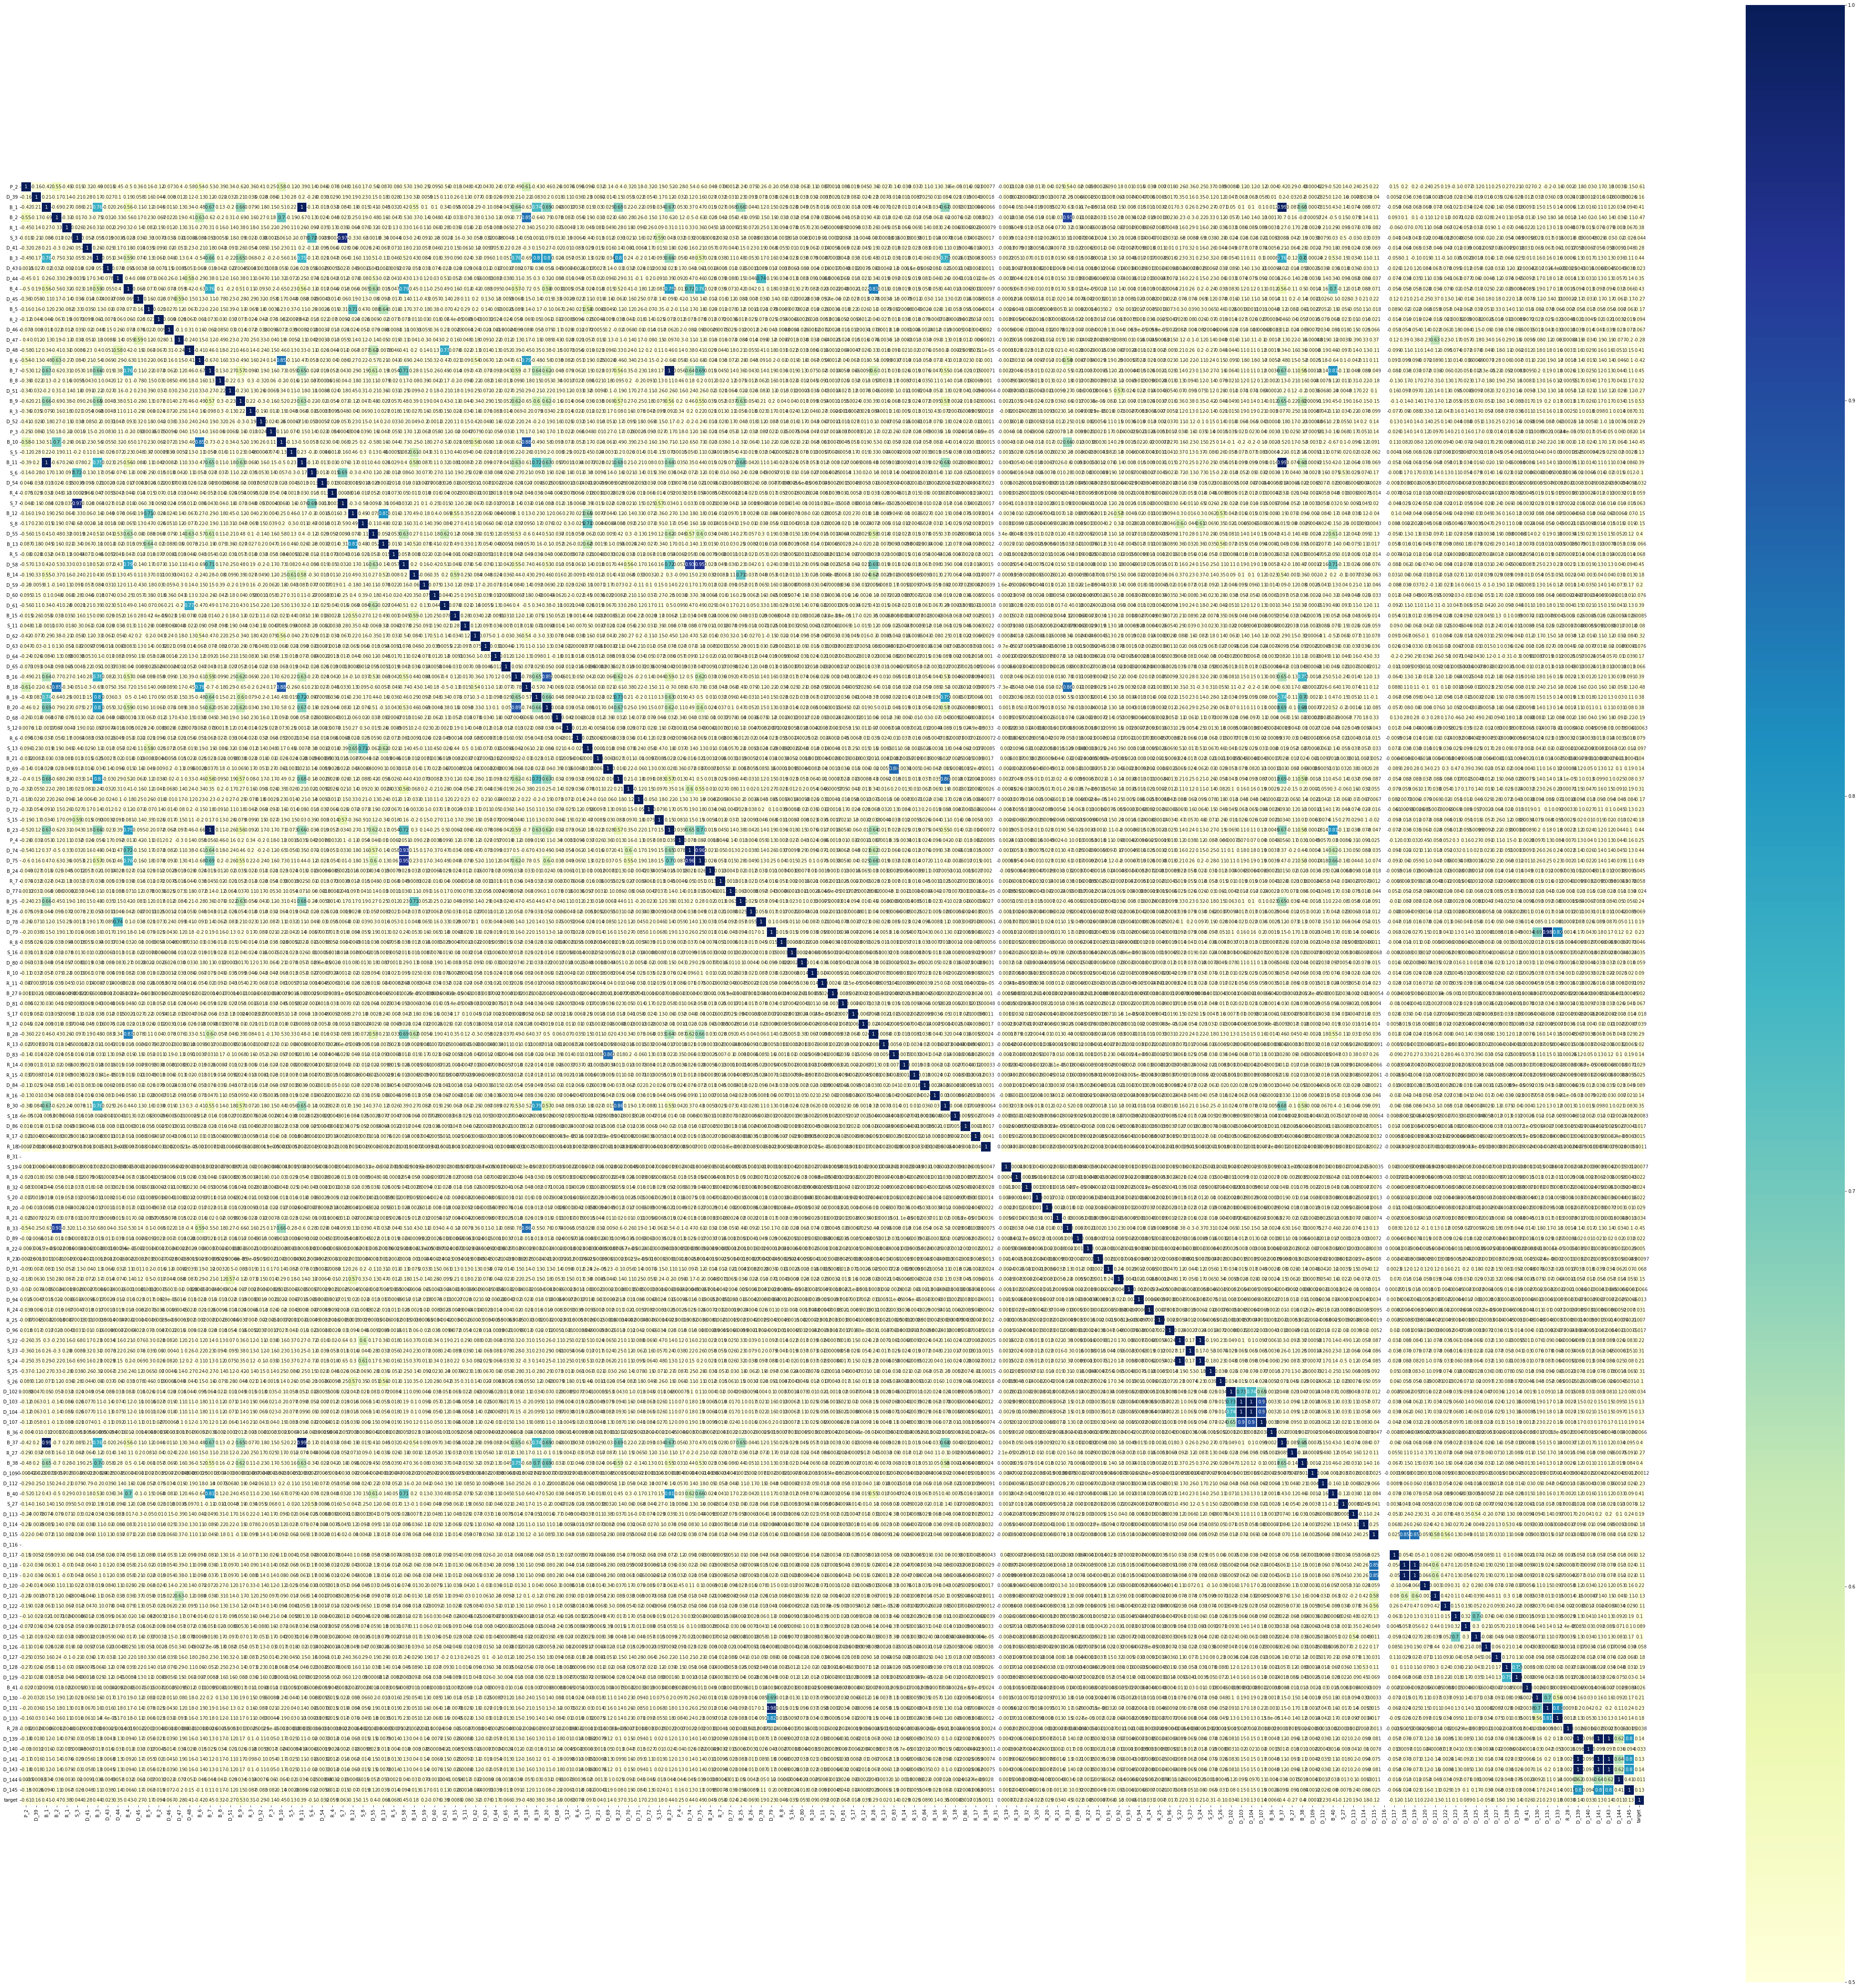

In [71]:
#Correlation Matrix
plt.figure(figsize=(80,80))
sns.heatmap(df_1.corr(),cmap="YlGnBu", vmin=0.5, linewidths=0.01,square=True,annot=True,linecolor="white")

In [41]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))
corr=df.corr()
corr=corr['target'].sort_values(ascending=False)[1:-1]
pal=sns.color_palette("Reds_r",135).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig = go.Figure()
fig.add_trace(go.Bar(x=corr[corr>=0], y=corr[corr>=0].index, 
                     marker_color=rgb, orientation='h', 
                     marker_line=dict(color=pal,width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
pal=sns.color_palette("Blues",100).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig.add_trace(go.Bar(x=corr[corr<0], y=corr[corr<0].index, 
                     marker_color=rgb[25:], orientation='h', 
                     marker_line=dict(color=pal[25:],width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
fig.update_layout(template=temp,title="Feature Correlations with Target",
                  xaxis_title="Correlation", margin=dict(l=150),
                  height=3000, width=700, hovermode='closest')
fig.show()


There are several strong correlations with the target variable. Balance 18 is the most negatively correlated with the probability of defaulting with a correlation of -0.484, while Balance 9 is the most positively correlated overall at 0.48. 

---
# Summary

---

* Variables (Columns) with missing value >= 50% was removed.
* Mode and mean imputation is done on remaining features.
* Data is affected by outliers.
* LabelEncoder was used for encoding Categorical Variables.
* There are features having negative and positive corerelation with target feature respectively.
